In [1]:
import os,matplotlib as mpl,pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt,math
from tqdm import tqdm_notebook
plt.style.use('default')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

# Read the funcotator output 

In [3]:
# Remove vcf header
!cat ./Example/238_Funcotator_interval_Hg38.PASS.table |awk '{if ($1!="##" && $1 !="#version") print $0}' \
> ./Example/238_Funcotator_interval_Hg38.PASS.table.clean

In [2]:
# Define the columns to read
columnlist=['Hugo_Symbol','Entrez_Gene_Id','NCBI_Build','Chromosome','Start_Position','End_Position','Strand',
  'Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1','Tumor_Seq_Allele2',
  'Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status',
  'tumor_f','t_alt_count','t_ref_count','n_alt_count','n_ref_count',
  'DP','ECNT','GERMQ','MBQ','MFRL','MMQ','MPOS','NALOD','NLOD', 'POPAF','ROQ','TLOD',
  'Genome_Change','Annotation_Transcript','Transcript_Strand','Transcript_Exon','Transcript_Position',
  'cDNA_Change','Codon_Change','Protein_Change','Other_Transcripts','Refseq_mRNA_Id',
 'Refseq_prot_Id','SwissProt_acc_Id','SwissProt_entry_Id','Description','GO_Biological_Process',
  'GO_Cellular_Component','GO_Molecular_Function','COSMIC_overlapping_mutations','COSMIC_fusion_genes',
 'COSMIC_tissue_types_affected','COSMIC_total_alterations_in_gene','DrugBank','ref_context','gc_content',
  'CGC_Mutation_Type','CGC_Translocation_Partner','CGC_Tumor_Types_Somatic',
 'CGC_Tumor_Types_Germline','CGC_Other_Diseases','DNARepairGenes_Activity_linked_to_OMIM',
  'FamilialCancerDatabase_Syndromes','OREGANNO_ID','OREGANNO_Values',
  'Gencode_34_secondaryVariantClassification','Achilles_Top_Genes','CGC_Name','CGC_GeneID','CGC_Chr','CGC_Chr_Band',
  'CGC_Cancer_Somatic_Mut','CGC_Cancer_Germline_Mut','CGC_Cancer_Syndrome','CGC_Tissue_Type',
  'CGC_Cancer_Molecular_Genetics','CGC_Other_Germline_Mut',
  'ClinVar_VCF_AF_ESP','ClinVar_VCF_AF_EXAC','ClinVar_VCF_AF_TGP','ClinVar_VCF_ALLELEID','ClinVar_VCF_CLNDISDB',
 'ClinVar_VCF_CLNDISDBINCL','ClinVar_VCF_CLNDN','ClinVar_VCF_CLNDNINCL','ClinVar_VCF_CLNHGVS',
  'ClinVar_VCF_CLNREVSTAT','ClinVar_VCF_CLNSIG','ClinVar_VCF_CLNSIGCONF','ClinVar_VCF_CLNSIGINCL',
 'ClinVar_VCF_CLNVC','ClinVar_VCF_CLNVCSO','ClinVar_VCF_CLNVI','ClinVar_VCF_DBVARID','ClinVar_VCF_GENEINFO',
 'ClinVar_VCF_MC','ClinVar_VCF_ORIGIN','ClinVar_VCF_RS','ClinVar_VCF_SSR','ClinVar_VCF_ID','ClinVar_VCF_FILTER',
  'DNARepairGenes_Chromosome_location_linked_to_NCBI_MapView',
 'DNARepairGenes_Accession_number_linked_to_NCBI_Entrez',
 'Familial_Cancer_Genes_Synonym','Familial_Cancer_Genes_Reference','Gencode_XHGNC_hgnc_id',
 'HGNC_HGNC_ID','HGNC_Status', 'HGNC_Locus_Type','HGNC_Locus_Group','HGNC_Previous_Symbols',
 'HGNC_Previous_Name','HGNC_Synonyms','HGNC_Name_Synonyms','HGNC_Chromosome','HGNC_Date_Modified',
 'HGNC_Date_Symbol_Changed','HGNC_Date_Name_Changed','HGNC_Accession_Numbers', 'HGNC_Enzyme_IDs',
  'HGNC_Ensembl_Gene_ID','HGNC_Pubmed_IDs','HGNC_RefSeq_IDs','HGNC_Gene_Family_ID','HGNC_Gene_Family_Name',
 'HGNC_CCDS_IDs','HGNC_Vega_ID','HGNC_OMIM_ID(supplied_by_OMIM)','HGNC_RefSeq(supplied_by_NCBI)',
 'HGNC_UniProt_ID(supplied_by_UniProt)','HGNC_Ensembl_ID(supplied_by_Ensembl)','HGNC_UCSC_ID(supplied_by_UCSC)',
  'Oreganno_Build','Simple_Uniprot_alt_uniprot_accessions','dbSNP_ASP','dbSNP_ASS','dbSNP_CAF','dbSNP_CDA',
 'dbSNP_CFL','dbSNP_COMMON','dbSNP_DSS','dbSNP_G5','dbSNP_G5A','dbSNP_GENEINFO','dbSNP_GNO','dbSNP_HD',
 'dbSNP_INT', 'dbSNP_KGPhase1','dbSNP_KGPhase3','dbSNP_LSD','dbSNP_MTP','dbSNP_MUT','dbSNP_NOC', 'dbSNP_NOV',
 'dbSNP_NSF','dbSNP_NSM','dbSNP_NSN','dbSNP_OM','dbSNP_OTH','dbSNP_PM','dbSNP_PMC','dbSNP_R3','dbSNP_R5',
 'dbSNP_REF', 'dbSNP_RV','dbSNP_S3D','dbSNP_SAO','dbSNP_SLO','dbSNP_SSR','dbSNP_SYN','dbSNP_TOPMED',
 'dbSNP_TPA','dbSNP_U3','dbSNP_U5','dbSNP_VC', 'dbSNP_VP','dbSNP_WGT','dbSNP_WTD', 'dbSNP_dbSNPBuildID','dbSNP_ID',
 'dbSNP_FILTER','gnomAD_exome_AF','gnomAD_exome_AF_afr','gnomAD_exome_AF_afr_female','gnomAD_exome_AF_afr_male',
 'gnomAD_exome_AF_amr','gnomAD_exome_AF_amr_female','gnomAD_exome_AF_amr_male','gnomAD_exome_AF_asj',
 'gnomAD_exome_AF_asj_female','gnomAD_exome_AF_asj_male','gnomAD_exome_AF_eas','gnomAD_exome_AF_eas_female',
 'gnomAD_exome_AF_eas_jpn','gnomAD_exome_AF_eas_kor','gnomAD_exome_AF_eas_male','gnomAD_exome_AF_eas_oea',
 'gnomAD_exome_AF_female','gnomAD_exome_AF_fin','gnomAD_exome_AF_fin_female','gnomAD_exome_AF_fin_male',
 'gnomAD_exome_AF_male','gnomAD_exome_AF_nfe','gnomAD_exome_AF_nfe_bgr','gnomAD_exome_AF_nfe_est',
 'gnomAD_exome_AF_nfe_female','gnomAD_exome_AF_nfe_male','gnomAD_exome_AF_nfe_nwe','gnomAD_exome_AF_nfe_onf',
 'gnomAD_exome_AF_nfe_seu','gnomAD_exome_AF_nfe_swe','gnomAD_exome_AF_oth','gnomAD_exome_AF_oth_female',
 'gnomAD_exome_AF_oth_male','gnomAD_exome_AF_popmax','gnomAD_exome_AF_raw','gnomAD_exome_AF_sas',
 'gnomAD_exome_AF_sas_female','gnomAD_exome_AF_sas_male','gnomAD_exome_ID','gnomAD_exome_FILTER',
  'gnomAD_genome_AF','gnomAD_genome_AF_afr','gnomAD_genome_AF_afr_female','gnomAD_genome_AF_afr_male',
 'gnomAD_genome_AF_amr','gnomAD_genome_AF_amr_female','gnomAD_genome_AF_amr_male','gnomAD_genome_AF_asj',
 'gnomAD_genome_AF_asj_female','gnomAD_genome_AF_asj_male','gnomAD_genome_AF_eas','gnomAD_genome_AF_eas_female',
 'gnomAD_genome_AF_eas_male','gnomAD_genome_AF_female','gnomAD_genome_AF_fin',
 'gnomAD_genome_AF_fin_female','gnomAD_genome_AF_fin_male','gnomAD_genome_AF_male','gnomAD_genome_AF_nfe',
 'gnomAD_genome_AF_nfe_est','gnomAD_genome_AF_nfe_female','gnomAD_genome_AF_nfe_male','gnomAD_genome_AF_nfe_nwe',
  'gnomAD_genome_AF_nfe_onf','gnomAD_genome_AF_nfe_seu','gnomAD_genome_AF_oth','gnomAD_genome_AF_oth_female',
 'gnomAD_genome_AF_oth_male','gnomAD_genome_AF_popmax','gnomAD_genome_AF_raw','gnomAD_genome_OriginalAlleles',
 'gnomAD_genome_OriginalContig','gnomAD_genome_OriginalStart','gnomAD_genome_ReverseComplementedAlleles',
 'gnomAD_genome_SwappedAlleles','gnomAD_genome_ID','gnomAD_genome_FILTER','HGNC_Entrez_Gene_ID(supplied_by_NCBI)',
 'dbSNP_RSPOS','dbSNP_VLD','AS_FilterStatus','AS_SB_TABLE', 
 ]

In [4]:
# Read the annotated vcf
Sampledic={}
for samplename in ['238','268','269','271','298']:
    Sampledic[samplename]=pd.read_csv('./Example/'+samplename+'_Funcotator_interval_Hg38.PASS.table.clean',
                          sep='\t',low_memory=False)[columnlist]

In [5]:
Sampledic['238'].head()

Hugo_Symbol  Entrez_Gene_Id NCBI_Build Chromosome  Start_Position  \
0  AL732372.3             NaN       hg38       chr1          494635   
1       NOC2L         26155.0       hg38       chr1          946545   
2      KLHL17        339451.0       hg38       chr1          961875   
3      KLHL17        339451.0       hg38       chr1          962342   
4      KLHL17        339451.0       hg38       chr1          963393   

   End_Position Strand Variant_Classification Variant_Type Reference_Allele  \
0        494635      +                5'Flank          SNP                G   
1        946545      +            Splice_Site          SNP                G   
2        961875      +        Frame_Shift_Del          DEL                C   
3        962342      +                 Intron          SNP                C   
4        963393      +      Missense_Mutation          SNP                C   

  Tumor_Seq_Allele1 Tumor_Seq_Allele2 Match_Norm_Seq_Allele1  \
0                 G                 A                      G   
1                 G                 A                      G   
2                 C                 -                      -   
3                 C                 T                      C   
4                 C                 T                      C   

  Match_Norm_Seq_Allele2     dbSNP_RS           dbSNP_Val_Status  tumor_f  \
0                      G          NaN                        NaN    0.156   
1                      G          NaN                        NaN    0.022   
2                      -          NaN                        NaN    0.012   
3                      C  549973352.0  byFrequency;by1000genomes    0.018   
4                      C  749336528.0                        NaN    0.031   

   t_alt_count  t_ref_count  n_alt_count  n_ref_count    DP  ECNT  GERMQ  \
0            8           36            0           31    80     2     93   
1            9          574            0          226   816     2     93   
2           12          916            0          512  1506     1     93   
3           16          982            0          579  1601     2     93   
4            9          396            0          258   689     1     93   

        MBQ        MFRL       MMQ  MPOS  NALOD    NLOD  POPAF  ROQ   TLOD  \
0  [20, 20]  [156, 122]  [60, 60]    41   1.04    6.01   6.00   21  13.69   
1  [20, 20]  [149, 144]  [60, 60]    63   2.12   39.12   6.00   15  10.33   
2  [20, 20]  [161, 123]  [60, 60]    61   2.54  101.37   6.00   93   8.01   
3  [20, 20]  [160, 136]  [60, 60]    35   2.55  105.99   6.00   13  18.42   
4  [20, 31]  [172, 126]  [60, 60]    23   2.18   45.65   4.31   22  14.43   

       Genome_Change Annotation_Transcript Transcript_Strand  Transcript_Exon  \
0   g.chr1:494635G>A     ENST00000514436.1                 -              NaN   
1   g.chr1:946545G>A     ENST00000327044.7                 -             15.0   
2  g.chr1:961875delC     ENST00000338591.8                 +              4.0   
3   g.chr1:962342C>T     ENST00000338591.8                 +              NaN   
4   g.chr1:963393C>T     ENST00000338591.8                 +              8.0   

  Transcript_Position cDNA_Change          Codon_Change Protein_Change  \
0                 NaN         NaN                   NaN            NaN   
1                1676   c.1660C>T  c.(1660-1662)Ctg>Ttg        p.L554L   
2                 648   c.539delC      c.(538-540)gctfs       p.A180fs   
3                 NaN  c.e5-13C>T                   NaN            NaN   
4                1354   c.1244C>T  c.(1243-1245)aCg>aTg        p.T415M   

                                   Other_Transcripts Refseq_mRNA_Id  \
0                                                NaN            NaN   
1                                                NaN    NM_015658.3   
2  KLHL17_ENST00000622660.1_Intron|NOC2L_ENST0000...    NM_198317.2   
3  KLHL17_ENST00000622660.1_5'UTR|NOC2L_ENST00000...    NM_198317.2   
4  KLHL17_ENST00000622660.1_Missense_Mutation

# Further filtering

In [6]:
# Filtering criteria: 
# 1. The mutation allele frequency of each SNV was required to be greater than 0.05.
# 2. At least 20-fold total coverage was required in tissue biopsy samples with at least 3-fold mutation coverage.
# 3. At least 20-fold coverage was required in the normal control samples.
# 4. Variants listed in the dbSNP database were removed.
for samplename in ['238','268','269','271','298']:
    Sampledic[samplename]=Sampledic[samplename][(Sampledic[samplename]['t_alt_count']/(Sampledic[samplename]['t_ref_count']+Sampledic[samplename]['t_alt_count'])>0.05)\
              &(Sampledic[samplename].t_alt_count+Sampledic[samplename].t_ref_count>=20)&(Sampledic[samplename].t_alt_count>=3)\
              &(Sampledic[samplename].n_ref_count>=20)&(Sampledic[samplename].dbSNP_RS!=Sampledic[samplename].dbSNP_RS)\
             ]

# Summarize brief features of WES data

In [13]:
def BriefSum(samplelist,path,columnlist=columnlist):
    TotalSomaticMutation,SNPNum,TMB,averageAF,geneNum,Top10Gene=[],[],[],[],[],[]#averageTumor_f
    for sample in samplelist:
        file=path+'/'+sample+'_Funcotator_interval_Hg38.PASS.table.clean'
        SNPdf=pd.read_csv(file,sep='\t',low_memory=False)[columnlist]
        SNPdf=SNPdf[(SNPdf['t_alt_count']/(SNPdf['t_ref_count']+SNPdf['t_alt_count'])>0.05)\
          &(SNPdf.t_alt_count+SNPdf.t_ref_count>=20)&(SNPdf.t_alt_count>=3)\
          &(SNPdf.n_ref_count>=20)&(SNPdf.dbSNP_RS!=SNPdf.dbSNP_RS)]
        TotalSomaticMutation.append(len(SNPdf))
        SNPNum.append(len(SNPdf[SNPdf.Variant_Type=='SNP']))
        TMB.append(len(SNPdf)/60.507855)
#         averageTumor_f.append(SNPdf.tumor_f.mean())
        averageAF.append(np.mean(SNPdf['t_alt_count']/(SNPdf['t_ref_count']+SNPdf['t_alt_count'])))
        geneNum.append(len(SNPdf.Hugo_Symbol.unique()))
        try:
            Top10Gene.append([i for i in SNPdf.groupby('Hugo_Symbol').count()['Chromosome'].sort_values(
                ascending=False).head(11).drop('Unknown',axis=0).index])
        except:
            Top10Gene.append([i for i in SNPdf.groupby('Hugo_Symbol').count()['Chromosome'].sort_values(
                ascending=False).head(10).index])
    return pd.DataFrame({
        'TotalSomaticMutation':TotalSomaticMutation,
        'SNPNumber':SNPNum,
        'TMB':TMB,
#         'averageTumorFraction':averageTumor_f,
        'averageAlleleFrequency':averageAF,
        'geneNumber':geneNum,
        'Top10Gene':Top10Gene
    },index=samplelist)

In [14]:
BriefSum(['238','268','269','271','298'],'./Example/')

TotalSomaticMutation  SNPNumber         TMB  averageAlleleFrequency  \
238                  1798       1151   29.715150                0.087041   
268                  6896       5749  113.968674                0.097083   
269                   257        255    4.247382                0.075811   
271                  1913       1674   31.615730                0.093252   
298                  1754       1005   28.987972                0.081544   

     geneNumber                                          Top10Gene  
238        1576  [USP9Y, TTN, SYNE2, HORMAD1, A2ML1, KIF20B, CA...  
268        5166  [TTN, FRAS1, OBSCN, UNC80, SYNE1, SYNE2, ZFHX3...  
269         252  [TCF12, POU5F1, DICER1, AFMID, RNFT2, ABCA10, ...  
271        1738  [TTN, ABCA13, STXBP3, DCC, OTOF, ITIH5, SSPO, ...  
298        1601  [TTN, ADGRG4, COL7A1, SPAG17, PRKCB, RBM10, CE...

<ipython-input-23-e96deaf3edb2>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


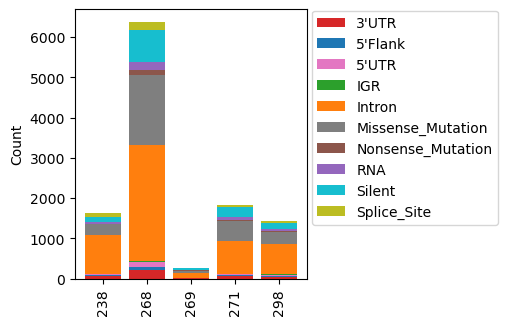

In [23]:
# Plot the distribution of SNP classes
classtype=pd.DataFrame()
for samplename in ['238','268','269','271','298']:
    classtype=pd.concat([classtype,Sampledic[samplename].groupby('Variant_Classification').count()['Hugo_Symbol']],
                       axis=1).fillna(0)
classtype.columns=['238','268','269','271','298']
classtypePlot=classtype.T[["3'UTR","5'Flank","5'UTR","IGR","Intron","Missense_Mutation","Nonsense_Mutation",
                           "RNA","Silent","Splice_Site"]]
x = classtypePlot.index
ydic={}
for i in classtypePlot.columns:
    ydic[i]=classtypePlot[[i]].values[:,0]

# plot bars in stack manner
colorlist=['tab:red','tab:blue','tab:pink','tab:green','tab:orange','tab:grey','tab:brown','tab:purple',
          'tab:cyan','tab:olive']
plt.style.use('default')
fig,ax=plt.subplots(figsize=(3,3.5))
for turn,key in enumerate(ydic.keys()):
    if turn==0:
        ybottom=ydic[key]
        ax.bar(x,ydic[key],color=colorlist[0],label=key)
    else:
        ax.bar(x,ydic[key],bottom=ybottom,color=colorlist[turn],label=key)
        ybottom+=ydic[key]

ax.set_ylabel('Count')
ax.set_xticklabels(x,rotation=90)
ax.legend(loc='upper right', bbox_to_anchor=(1.85, 1.02),fontsize='medium')
plt.show()

# Pathway analysis using gseapy

In [27]:
import gseapy

In [28]:
# Get the genes in Sampledic['238'] which possess more than 2 SNPs
genelist=Sampledic['238'].groupby('Hugo_Symbol').count()['Chromosome'].sort_values(
                ascending=False).drop('Unknown')[Sampledic['238'].groupby('Hugo_Symbol'
                                                                        ).count()['Chromosome'].sort_values(
                ascending=False).drop('Unknown')>=2].index
genelist

Index(['USP9Y', 'TTN', 'SYNE2', 'HORMAD1', 'A2ML1', 'KIF20B', 'CACNA2D3',
       'CCT8', 'DNAAF2', 'DNAH6',
       ...
       'AQR', 'ZNF654', 'AFF4', 'VPS50', 'ZNF529', 'AF241726.2', 'AMBRA1',
       'VTCN1', 'AC120498.7', 'ZNF99'],
      dtype='object', name='Hugo_Symbol', length=181)

In [29]:
# Perform GO enrichment of the high-frequency mutated genes
enr_res = gseapy.enrichr(gene_list=list(genelist),
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                        cutoff=0.05
                        )

In [30]:
df_GO=enr_res.res2d
df_GO.head()

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   

                                                Term Overlap   P-value  \
0     actomyosin structure organization (GO:0031032)    6/76  0.000065   
1                sarcomere organization (GO:0045214)    4/28  0.000112   
2                     visual perception (GO:0007601)    6/93  0.000201   
3  sensory perception of light stimulus (GO:0050953)    6/95  0.000226   
4                    myofibril assembly (GO:0030239)    4/43  0.000608   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.065632            0                     0    9.672980   
1          0.065632            0                     0   18.639360   
2          0.066054            0                     0    7.776158   
3          0.066054            0                     0    7.600642   
4          0.142361            0                     0   11.461683   

   Combined Score                                       Genes  
0       93.199914          KRT19;OBSCN;ROCK1;SORBS1;LMOD2;TTN  
1      169.546531                       KRT19;OBSCN;LMOD2;TTN  
2       66.197706    DNAJC19;COL11A1;CACNA1F;GUCY2F;MYO9A;EYS  
3       63.819573  DNAJC19;COL11A1;CDH23;CACNA1F;GUCY2F;MYO9A  
4       84.880198                       KRT19;OBSCN;LMOD2;TTN

Text(0.5, 1.0, 'GO_Biological_Process_238')

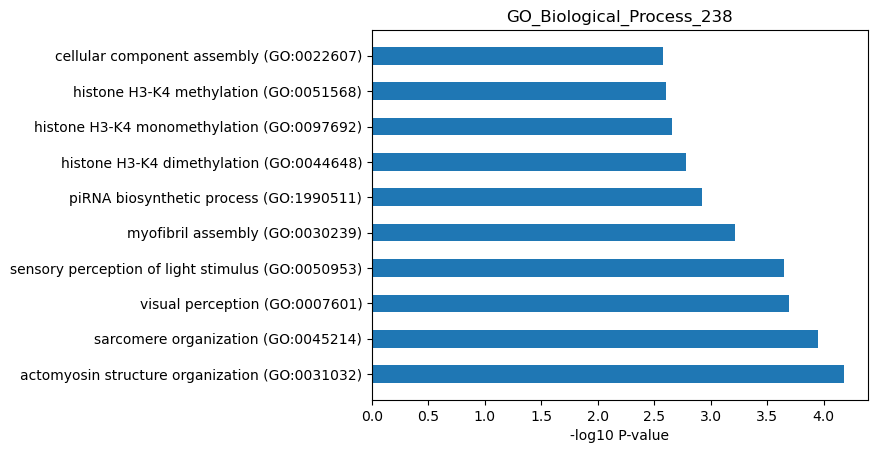

In [31]:
# Plot the top 10 enriched GO biological process
plt.barh(df_GO[:10]['Term'], [-math.log10(i) for i in df_GO[:10]['P-value']], height=0.5,
                )
plt.xlabel('-log10 P-value')
plt.title("GO_Biological_Process_238")

In [32]:
# Perform KEGG enrichment of the high-frequency mutated genes
enr_res = gseapy.enrichr(gene_list=list(genelist),
                     organism='Human',
                     gene_sets='KEGG_2021_Human',
                        cutoff=0.05
                        )

In [33]:
df_KEGG=enr_res.res2d
df_KEGG.head()

Gene_set                                             Term Overlap  \
0  KEGG_2021_Human                      Hypertrophic cardiomyopathy    4/90   
1  KEGG_2021_Human                           Dilated cardiomyopathy    4/96   
2  KEGG_2021_Human  Arrhythmogenic right ventricular cardiomyopathy    3/77   
3  KEGG_2021_Human      Alanine, aspartate and glutamate metabolism    2/37   
4  KEGG_2021_Human           D-Glutamine and D-glutamate metabolism     1/5   

    P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0  0.009063          0.736488            0                     0    5.185390   
1  0.011303          0.736488            0                     0    4.845738   
2  0.032740          0.736488            0                     0    4.497039   
3  0.044109          0.736488            0                     0    6.315722   
4  0.044442          0.736488            0                     0   27.520833   

   Combined Score                     Genes  
0       24.389618  CACNA2D3;DMD;CACNA1F;TTN  
1       21.721900  CACNA2D3;DMD;CACNA1F;TTN  
2       15.376076      CACNA2D3;DMD;CACNA1F  
3       19.711882                 GLS2;GAD2  
4       85.687744                      GLS2

Text(0.5, 1.0, 'KEGG_238')

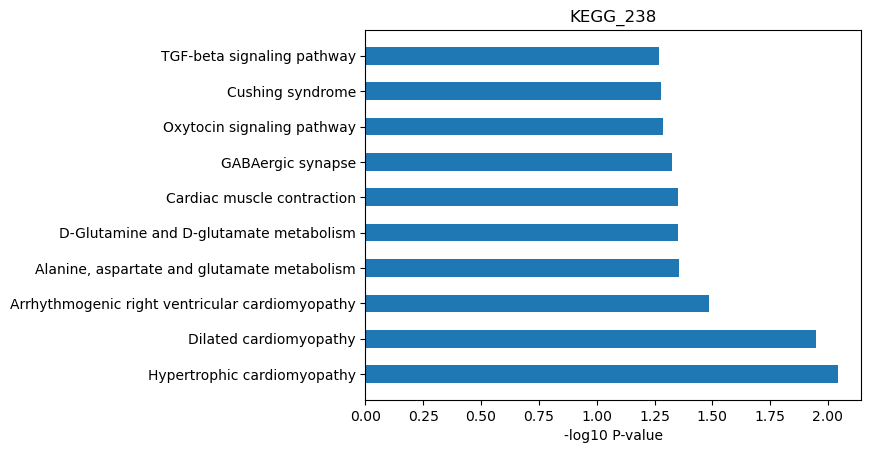

In [34]:
# Plot the top 10 enriched KEGG process
plt.barh(df_KEGG[:10]['Term'], [-math.log10(i) for i in df_KEGG[:10]['P-value']], height=0.5,
                )
plt.xlabel('-log10 P-value')
plt.title("KEGG_238")

# Get the single nucleotide mutation pattern

<ipython-input-35-cea3b9a8aa1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SNPtype']=df.Tumor_Seq_Allele1+'>'+df.Tumor_Seq_Allele2


Text(0.5, 1.0, '238')

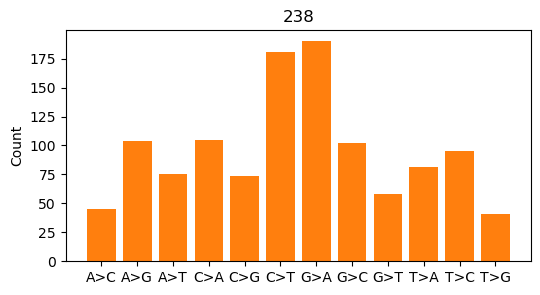

In [35]:
df=Sampledic['238'][Sampledic['238'].Variant_Type=='SNP']
df['SNPtype']=df.Tumor_Seq_Allele1+'>'+df.Tumor_Seq_Allele2
plt.style.use('default')
plt.figure(figsize=(6,3))
plt.bar(df.groupby('SNPtype').count()['Hugo_Symbol'].index,list(df.groupby('SNPtype').count()['Hugo_Symbol'])
,color='tab:orange')
plt.ylabel('Count')
plt.title('238')

# Signature infering

In [40]:
from SigProfilerExtractor import sigpro as sig

In [ ]:
# Install the required genome resource, skip this step if the file has been installed
from SigProfilerMatrixGenerator import install as genInstall
genInstall.install('GRCh38')

In [49]:
# Generate the clean vcf for the signature extractor
!mkdir ./Example/SigExtrator
!mkdir ./Example/SigExtrator/vcf
VCFdic={}
for samplename in ['238','268','269','271','298']:
    df=Sampledic[samplename]#[Sampledic[samplename].Variant_Type=='SNP']
    VCFdic['#CHROM']=[i.split('chr')[-1] for i in df.Chromosome]
    VCFdic['POS']=df['Start_Position']
    VCFdic['FILTER']=['PASS']*len(df)
    VCFdic['REF']=df['Tumor_Seq_Allele1']
    VCFdic['ALT']=df['Tumor_Seq_Allele2']
    pd.DataFrame(VCFdic).to_csv('./Example/SigExtrator/vcf/'+samplename+'.vcf',sep='\t',index=False)


************** Reported Current Memory Use: 1.53 GB *****************

Starting matrix generation for SNVs and DINUCs...Completed! Elapsed time: 11.72 seconds.
Matrices generated for 5 samples with 0 errors. Total of 9834 SNVs, 1 DINUCs, and 0 INDELs were successfully analyzed.
Extracting signature 1 for mutation type 96
The matrix normalizing cutoff is 9600


Time taken to collect 100 iterations for 1 signatures is 67.2 seconds
Optimization time is 2.3836183547973633 seconds
The reconstruction error is 0.1818, average process stability is 1.0 and 
the minimum process stability is 1.0 for 1 signatures


Extracting signature 2 for mutation type 96
The matrix normalizing cutoff is 9600


Time taken to collect 100 iterations for 2 signatures is 70.46 seconds
Optimization time is 2.344348907470703 seconds
The reconstruction error is 0.1087, average process stability is 0.95 and 
the minimum process stability is 0.92 for 2 signatures


Extracting signature 3 for mutation type 96
The matrix

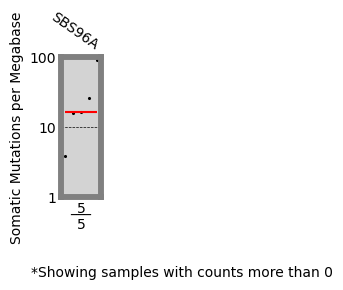

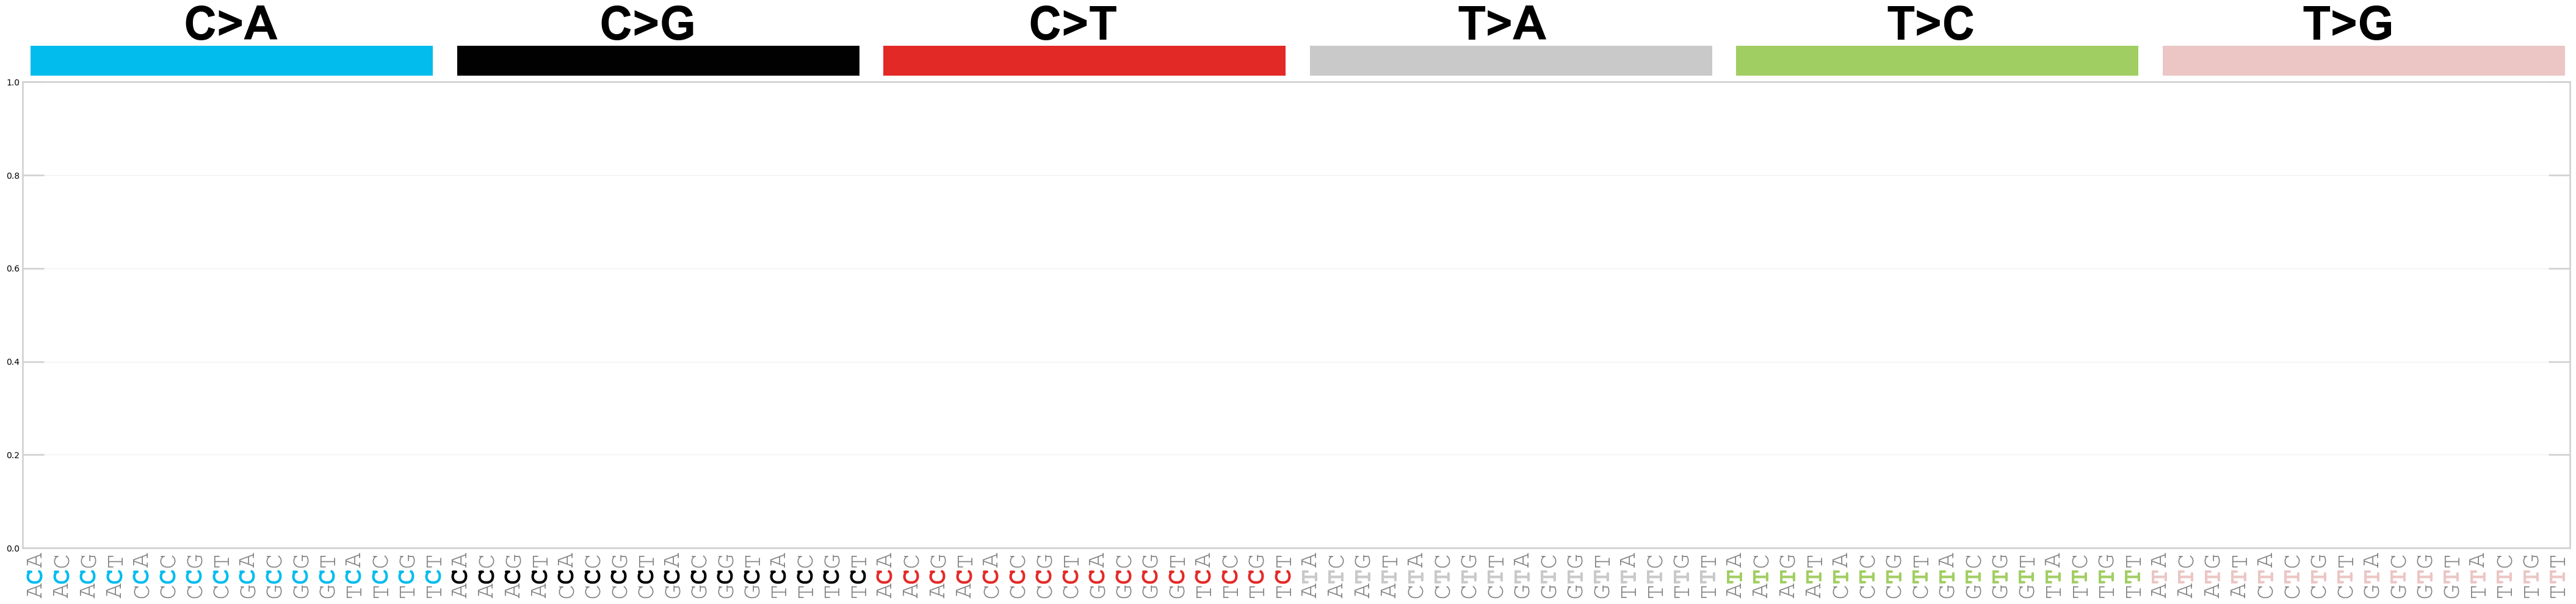

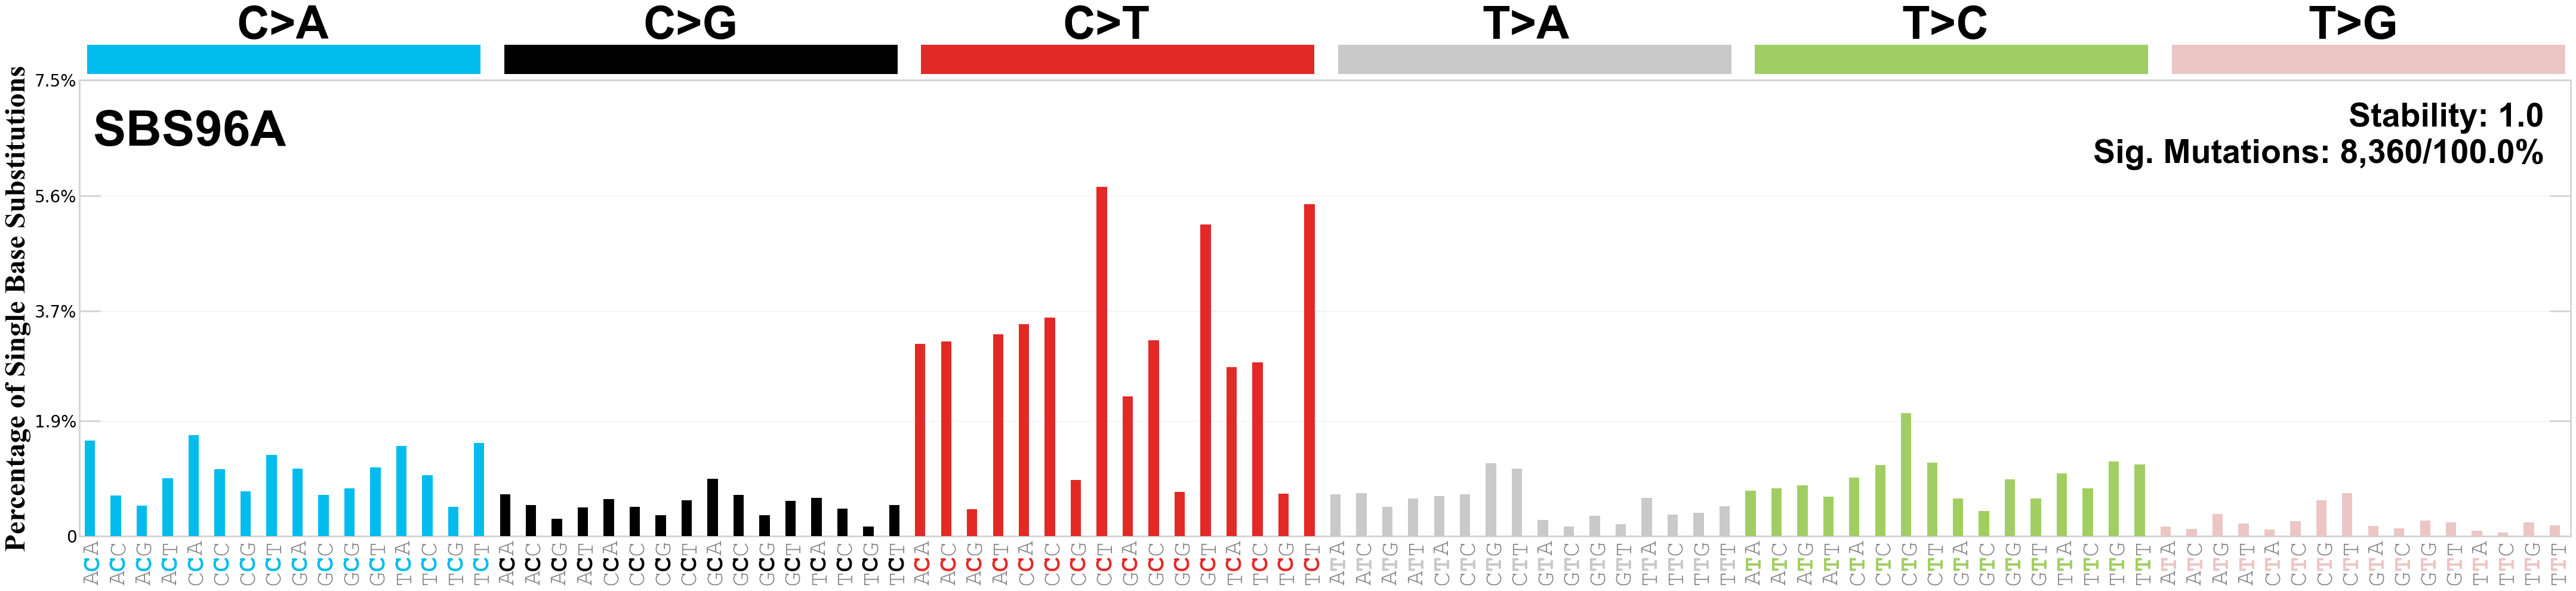

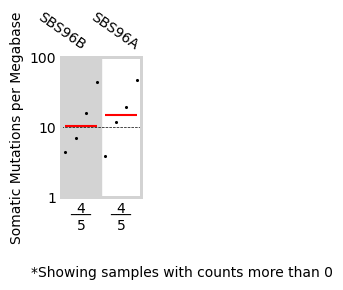

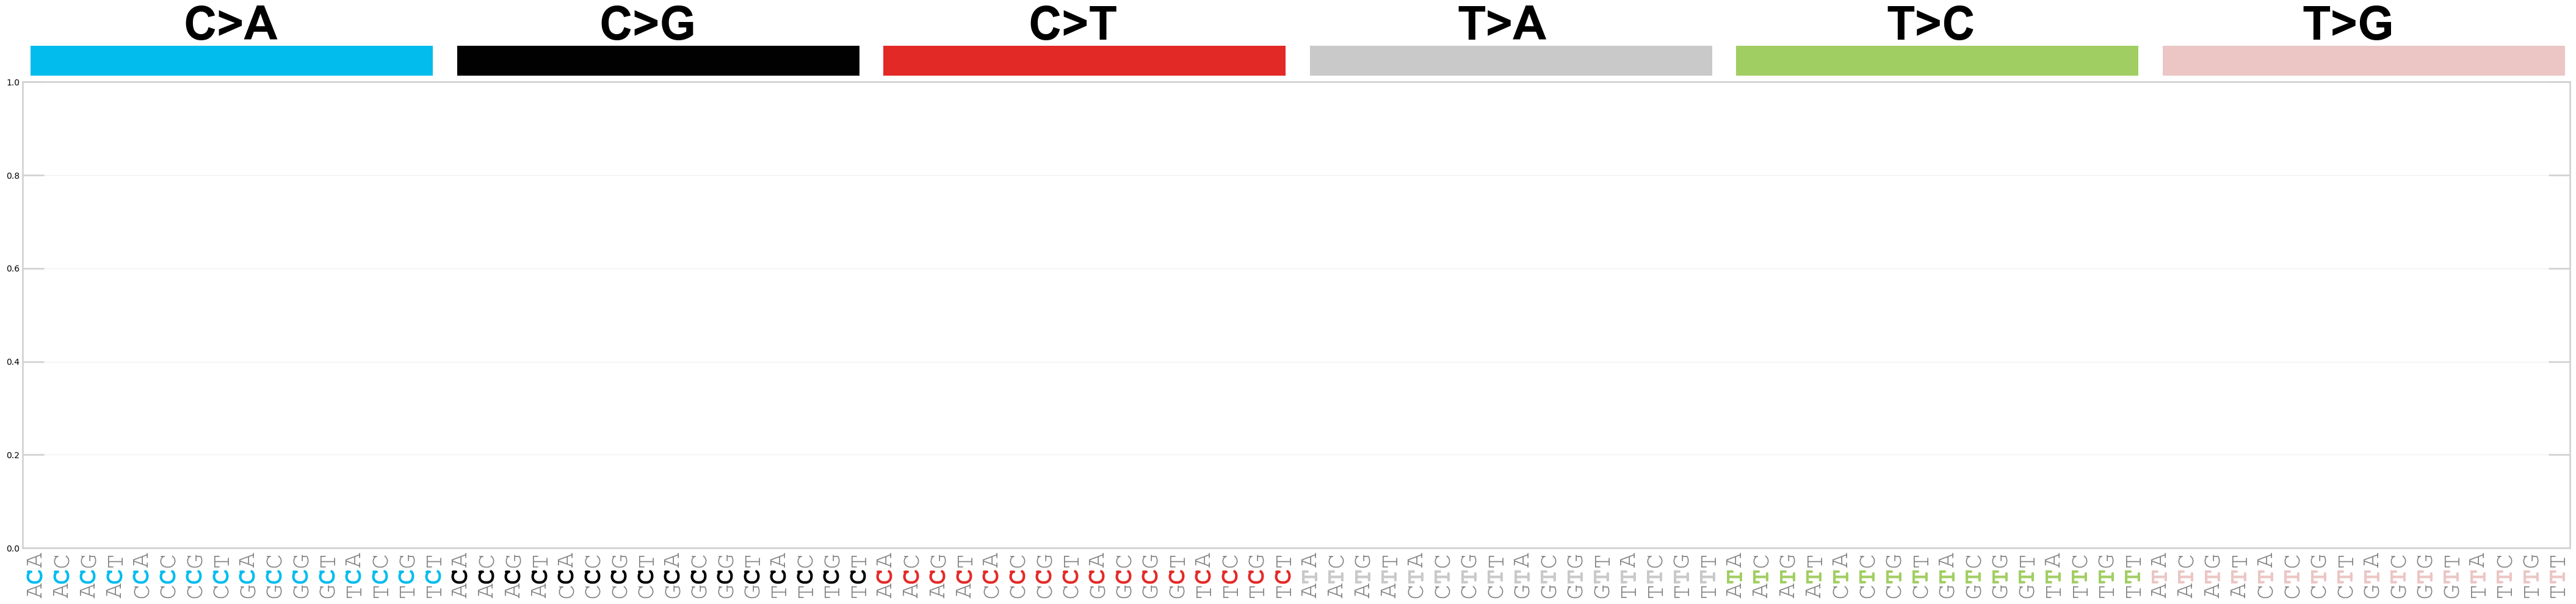

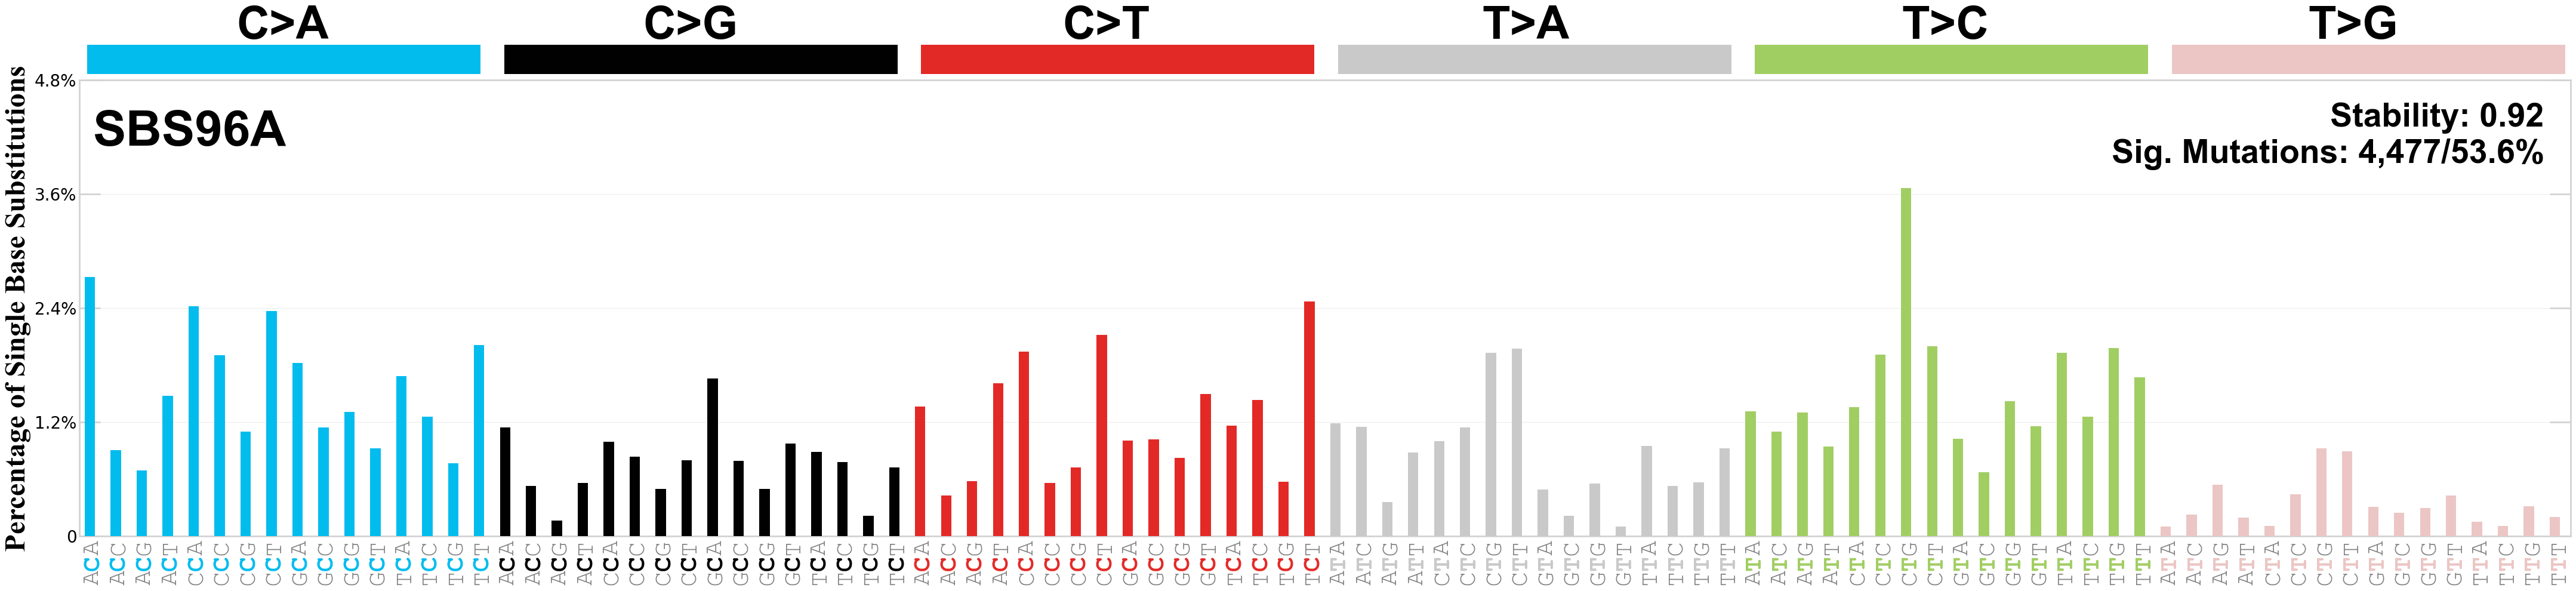

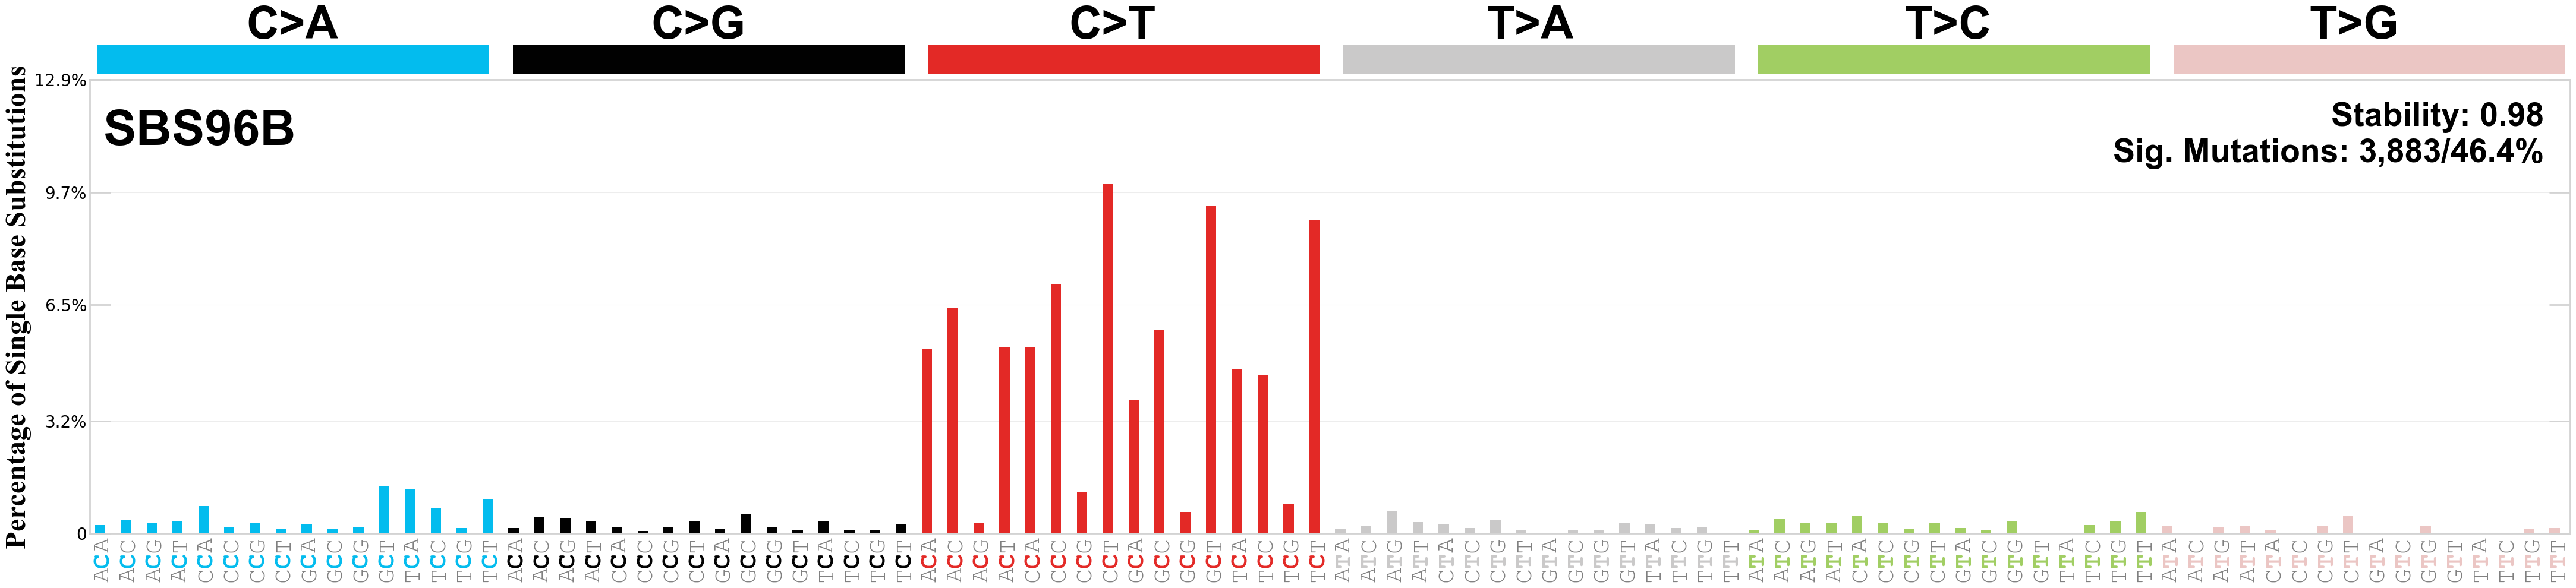

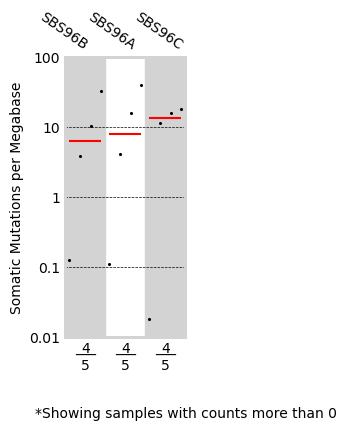

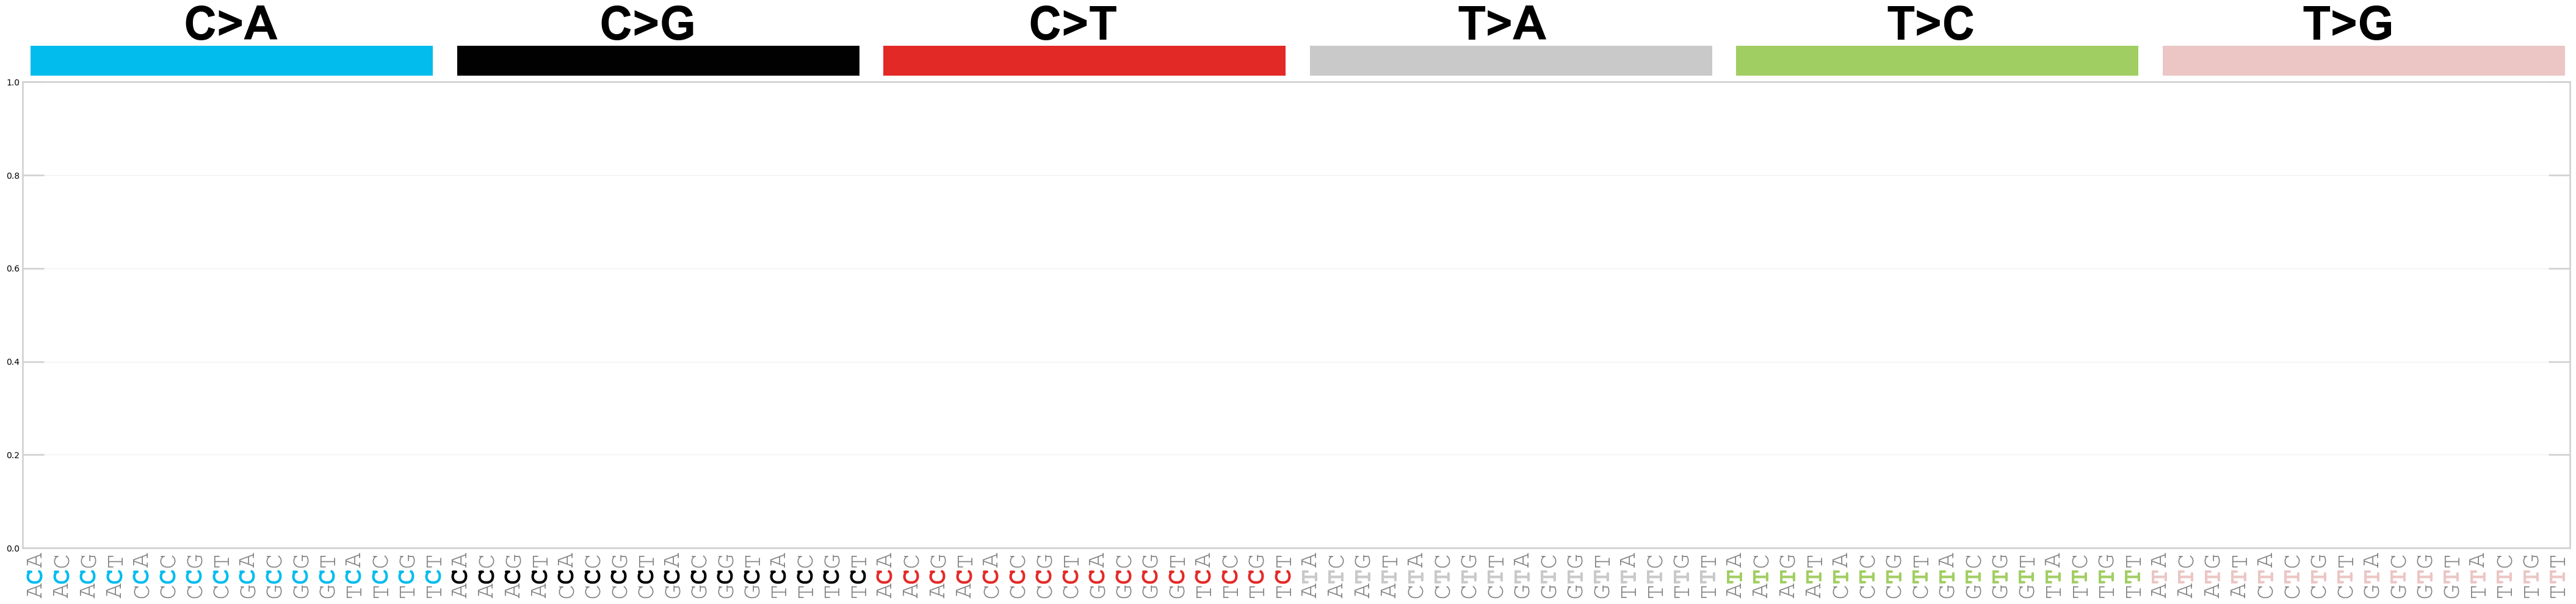

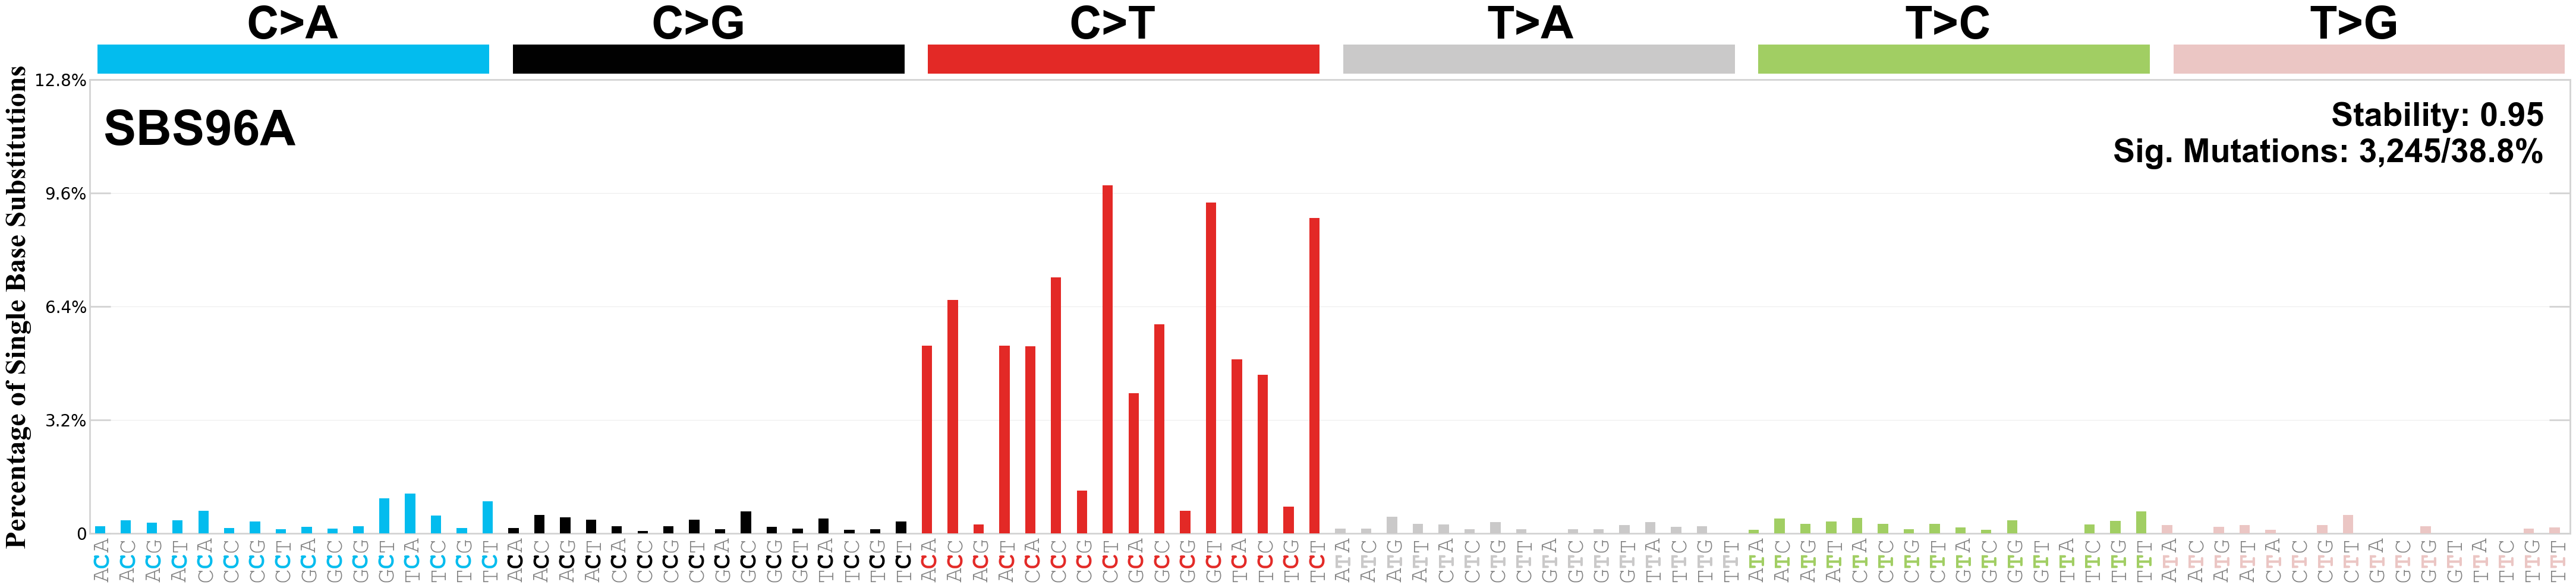

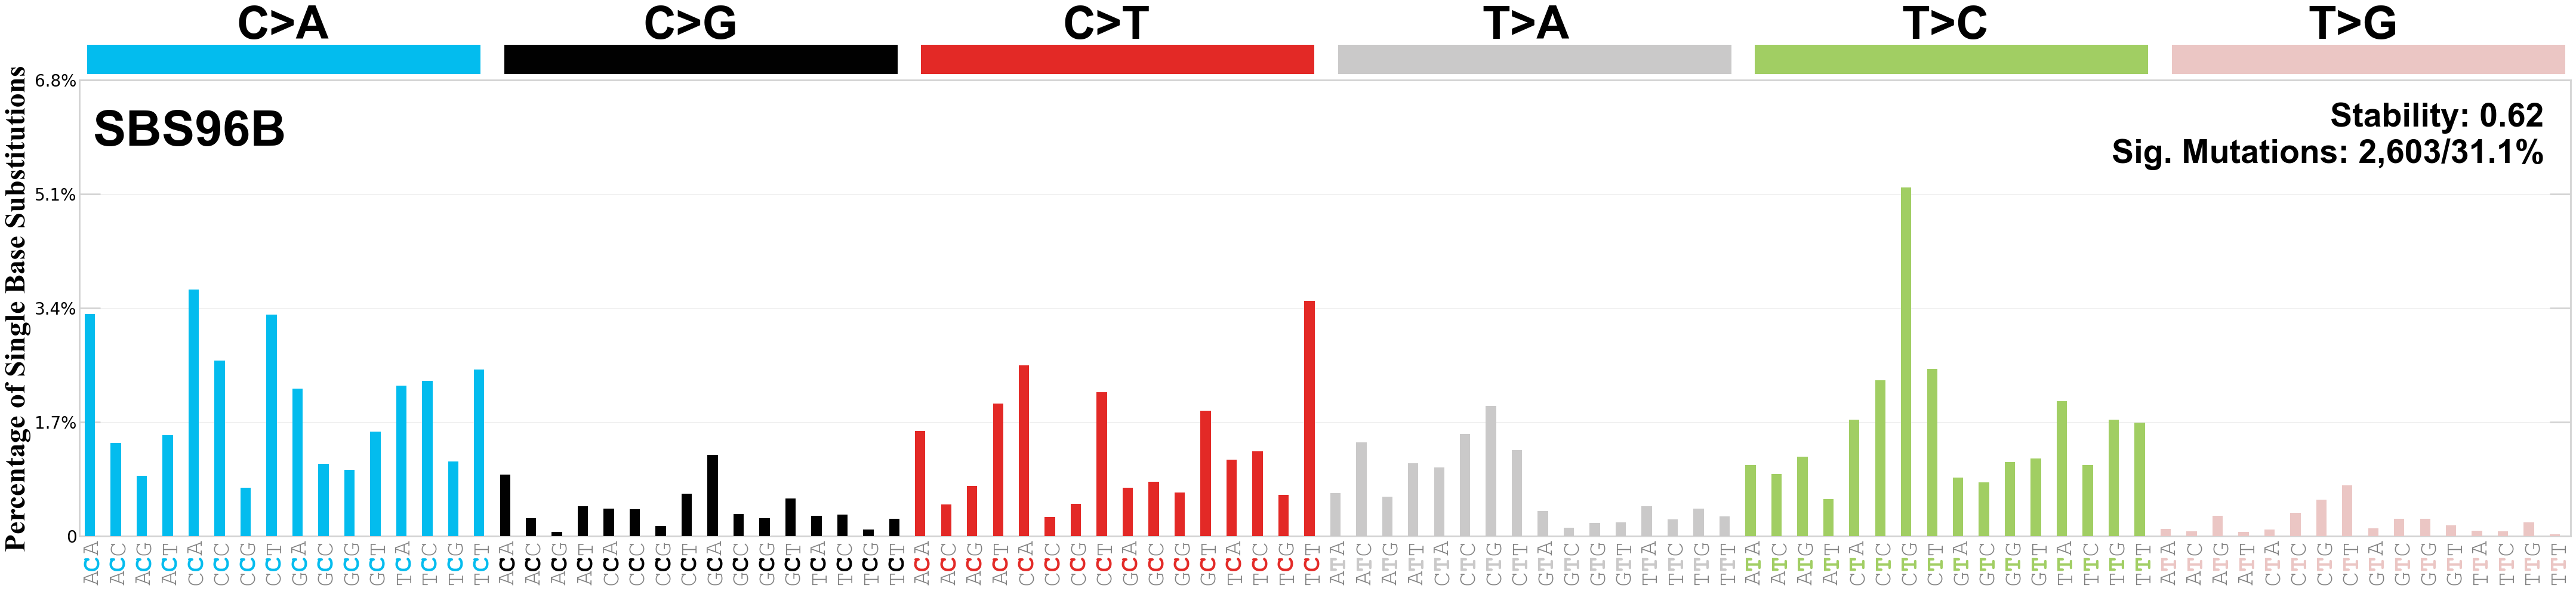

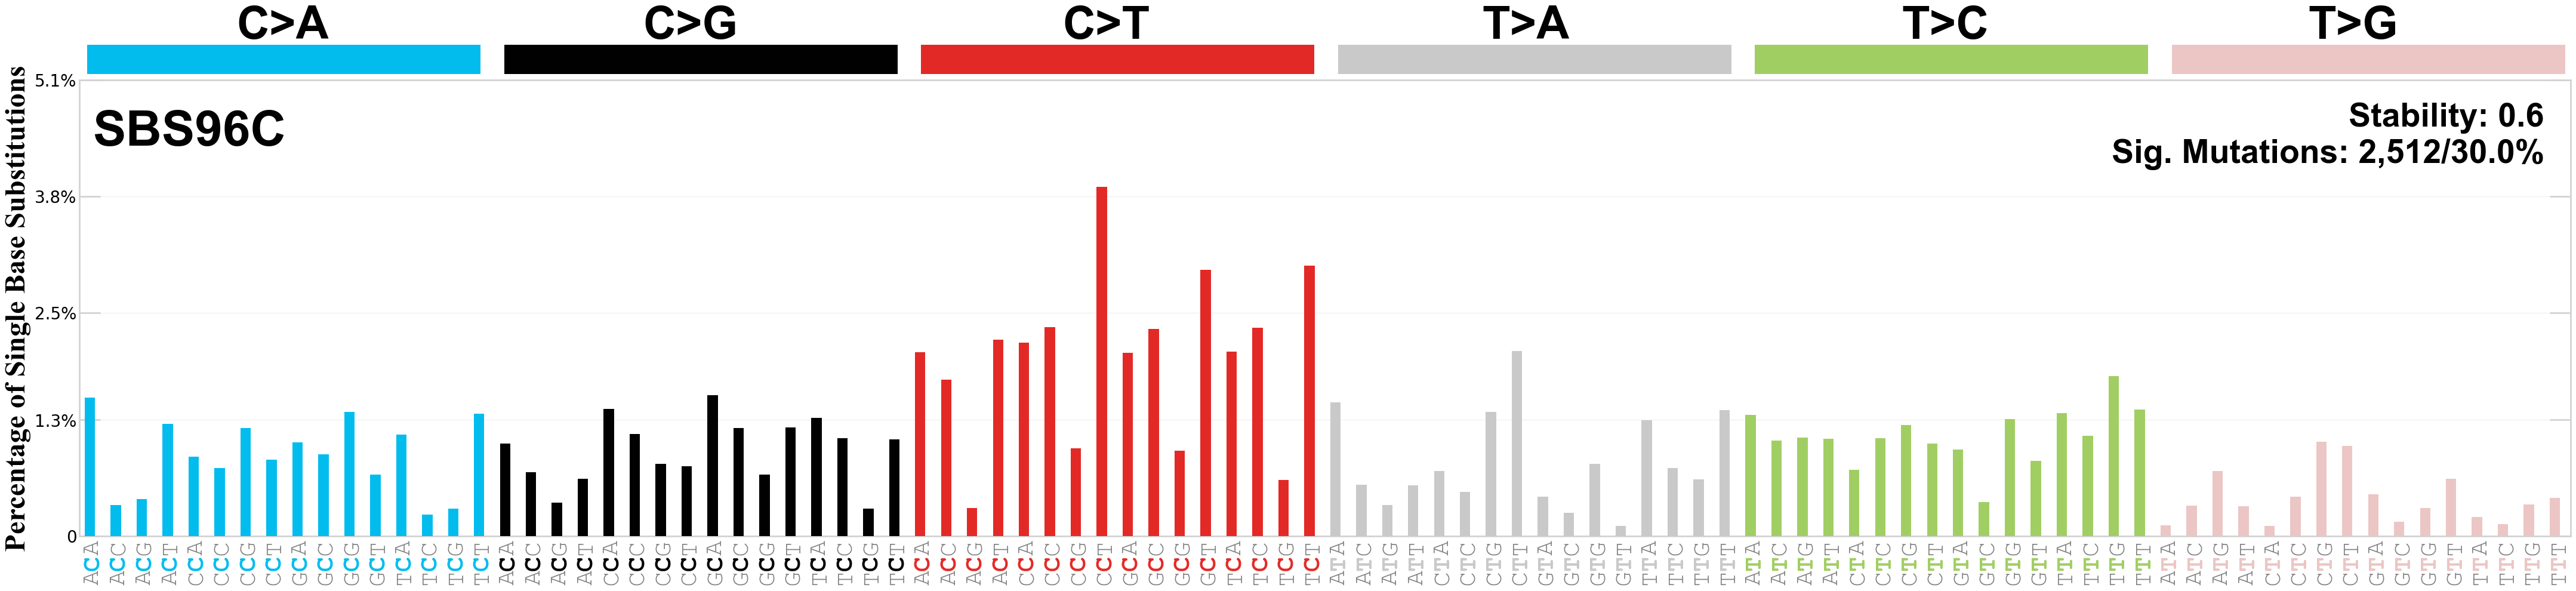

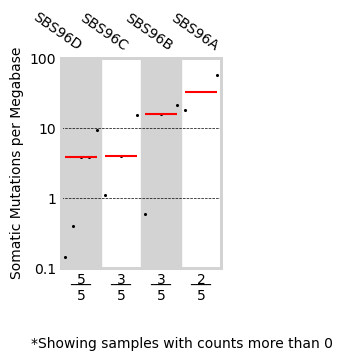

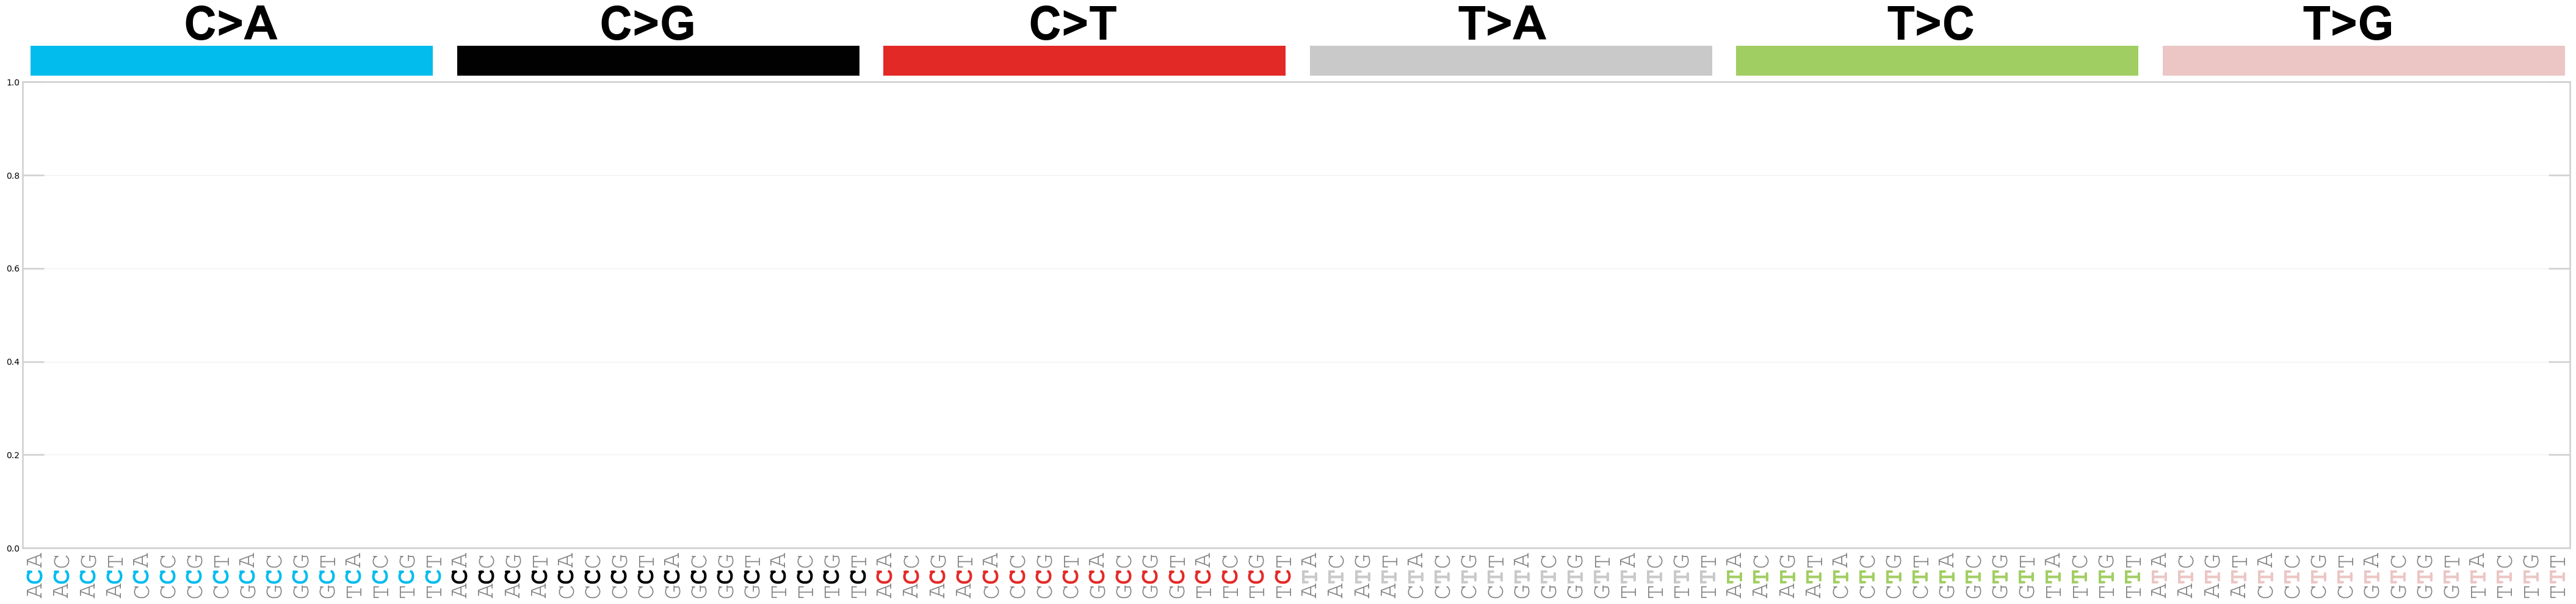

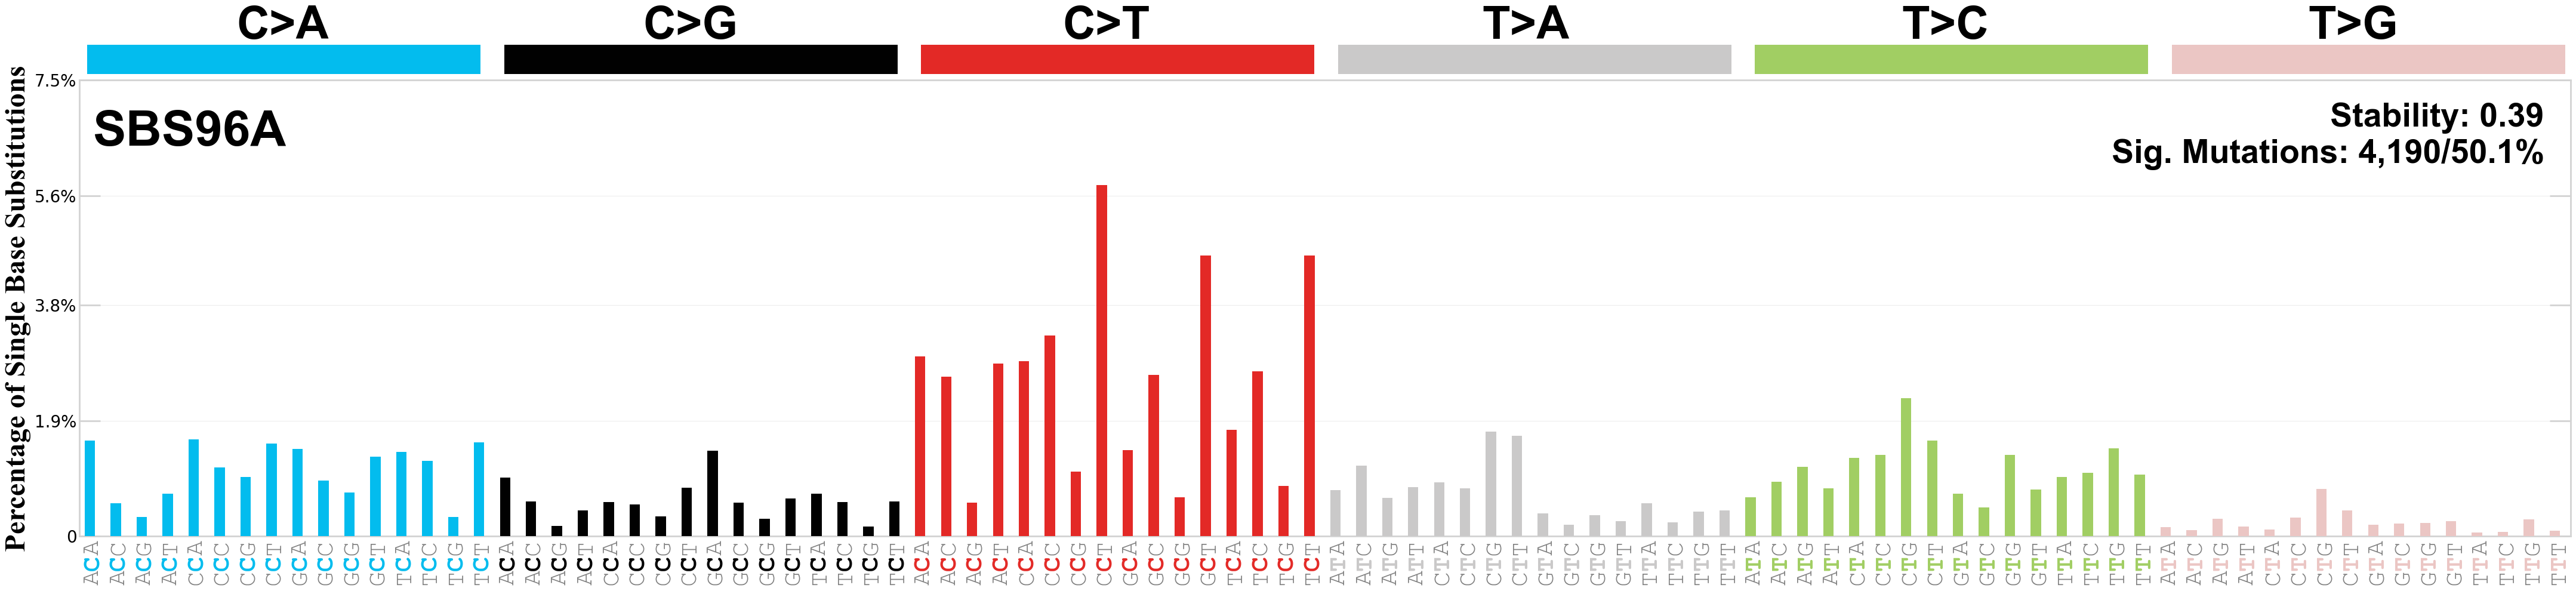

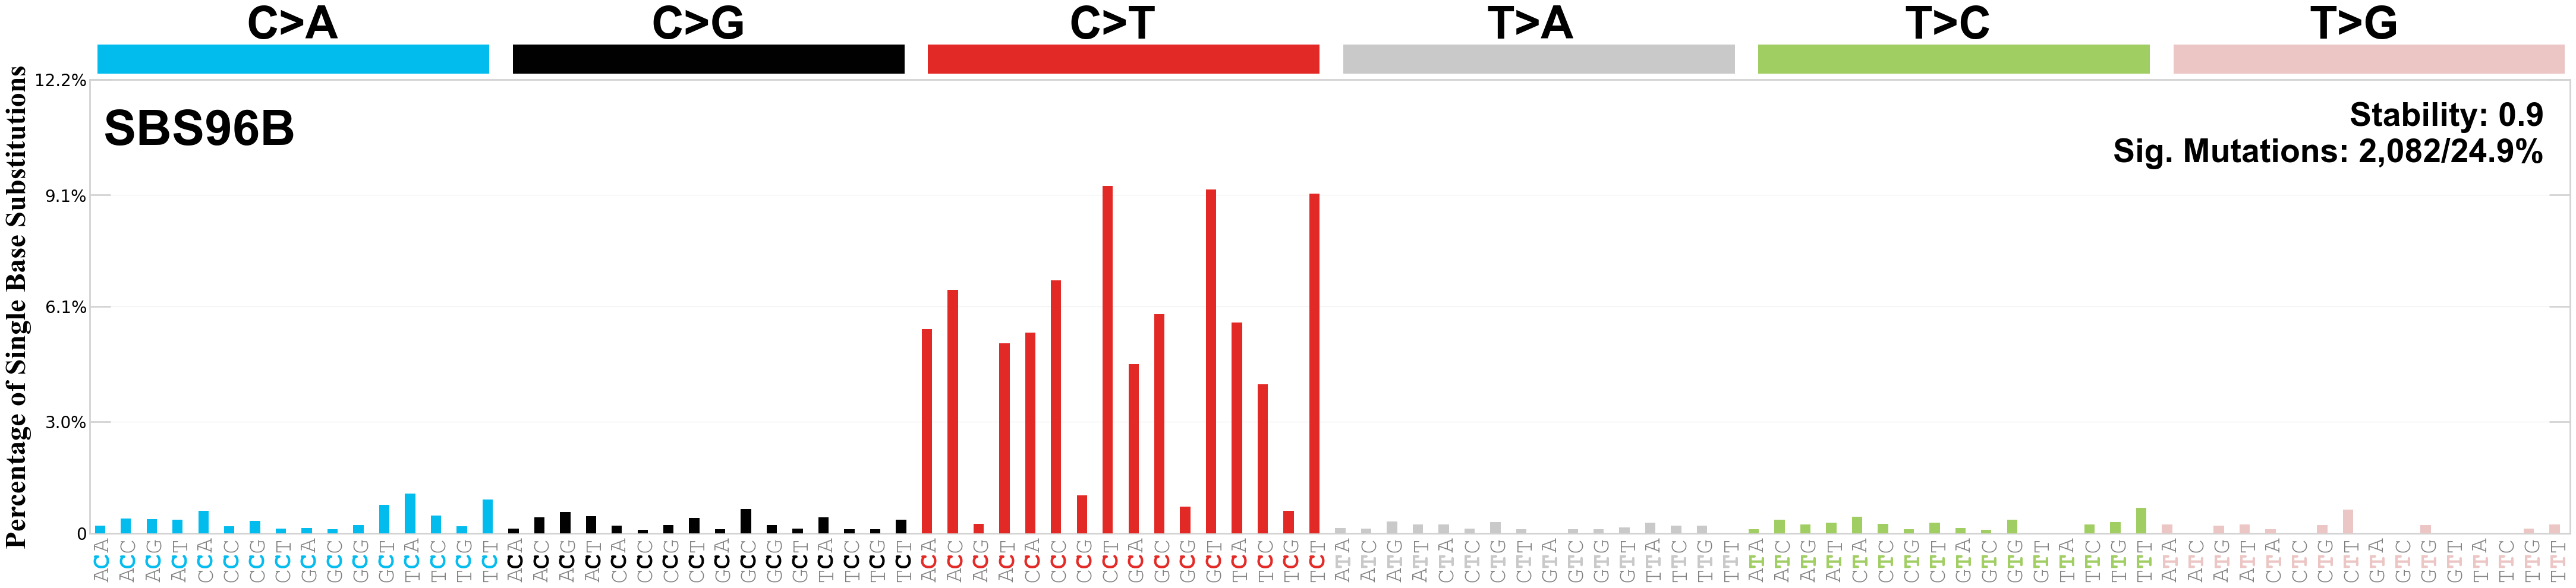

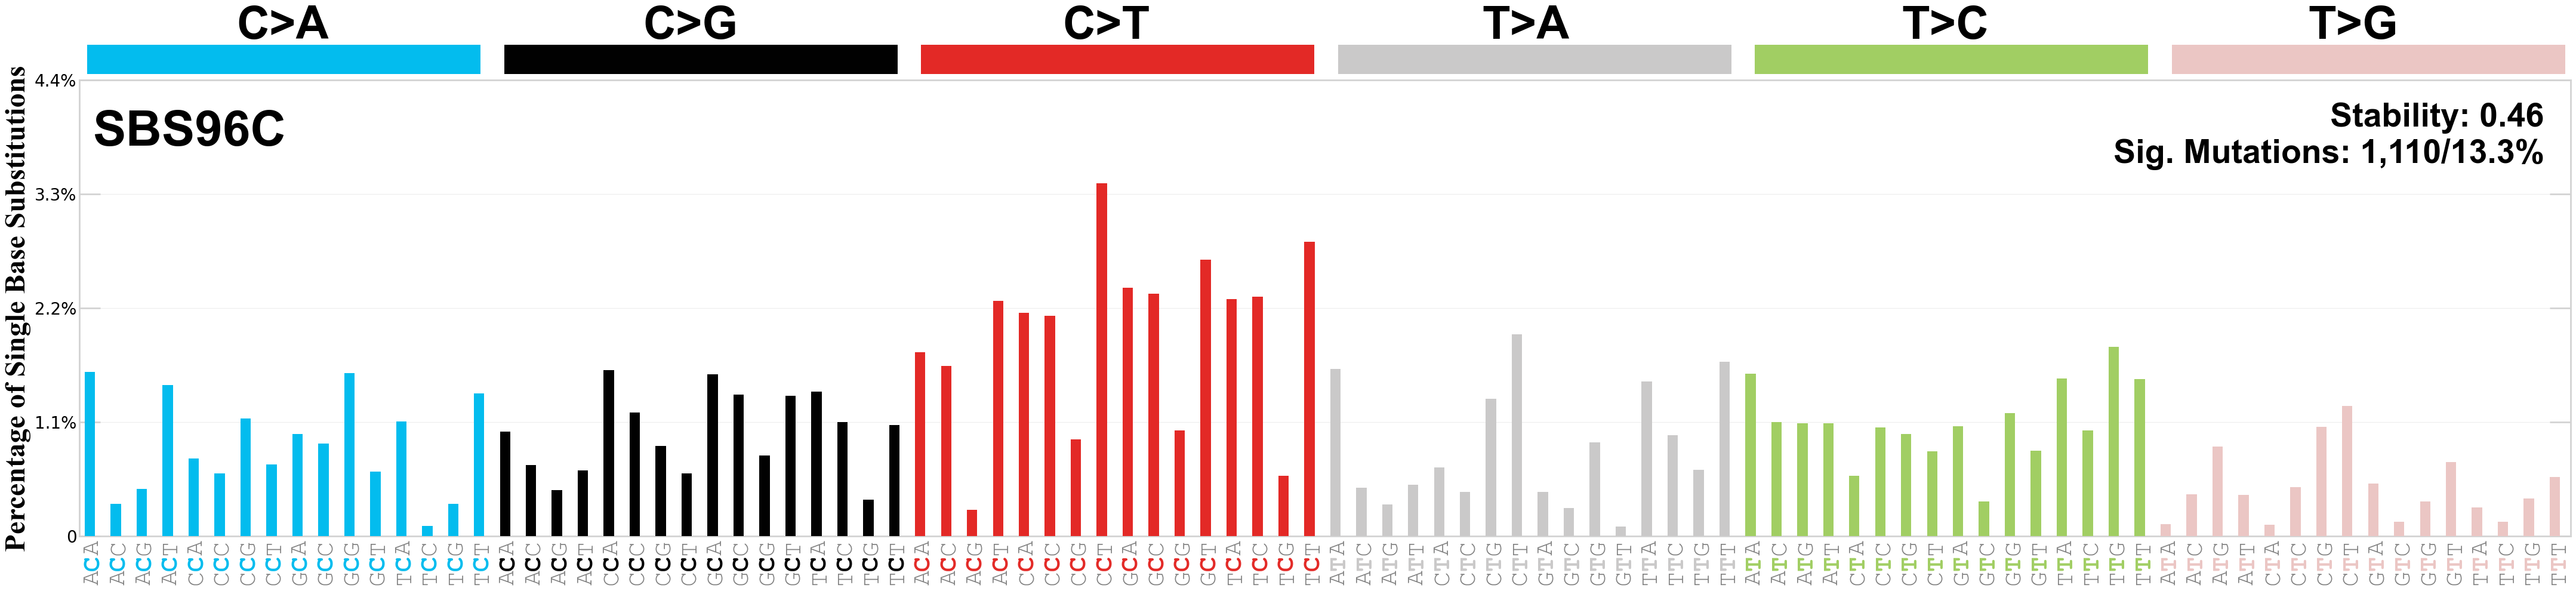

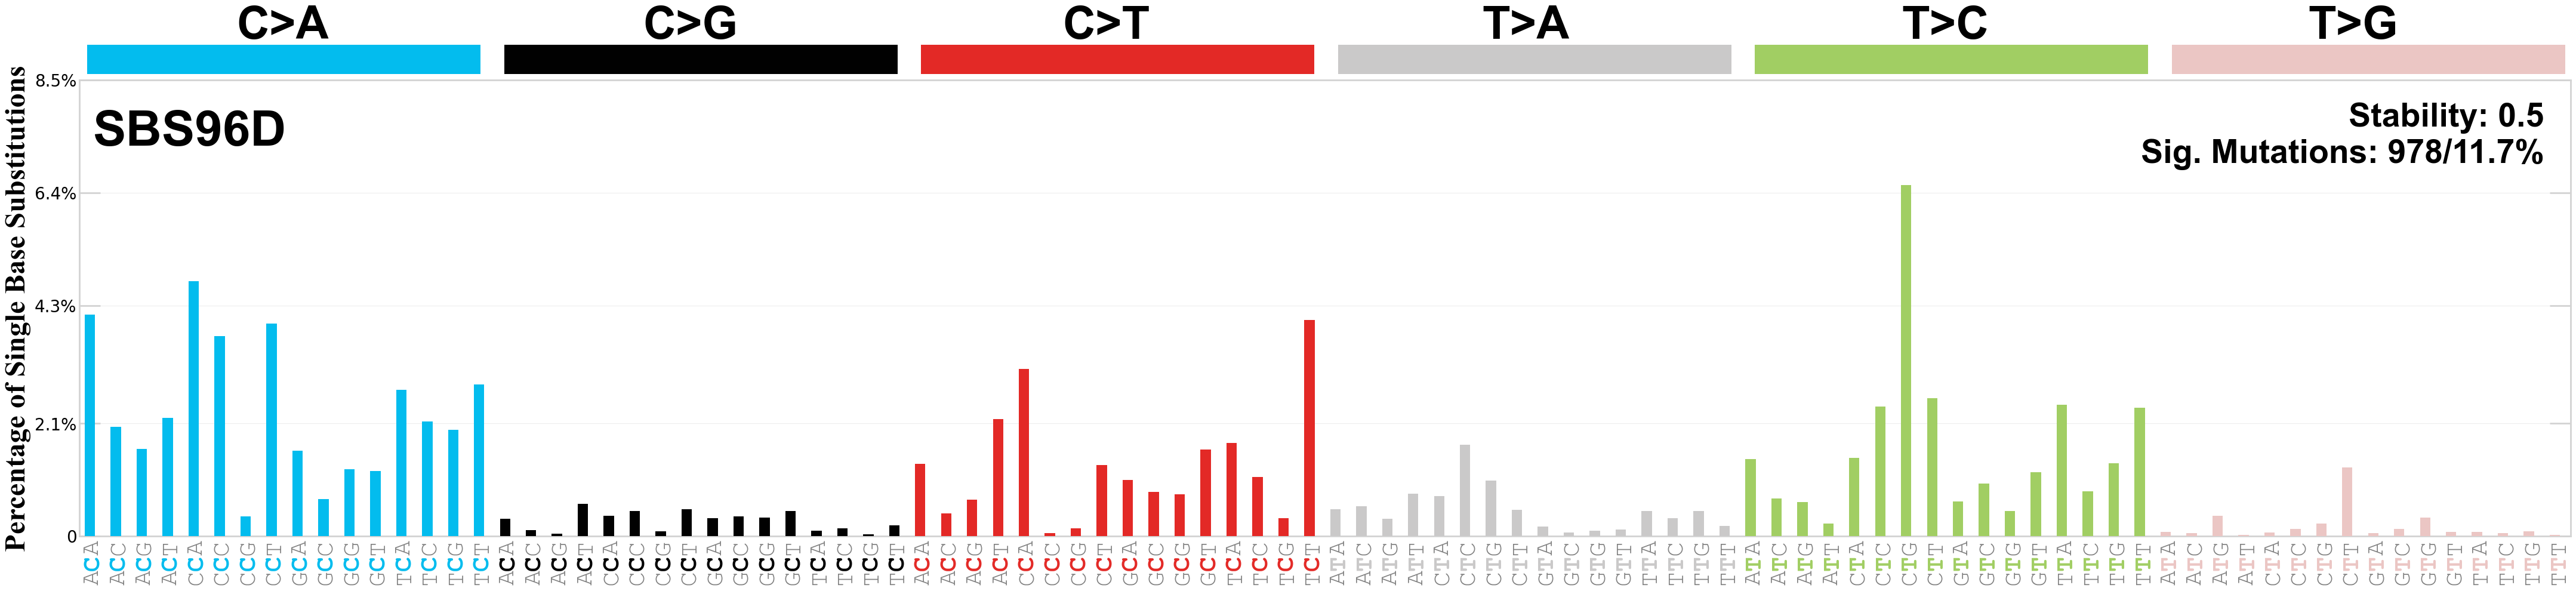

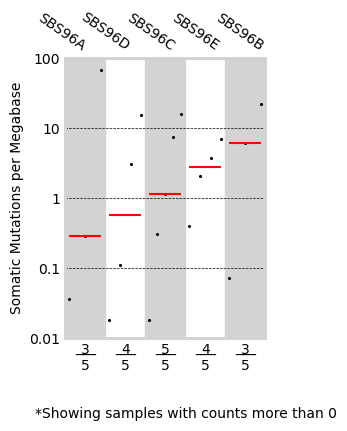

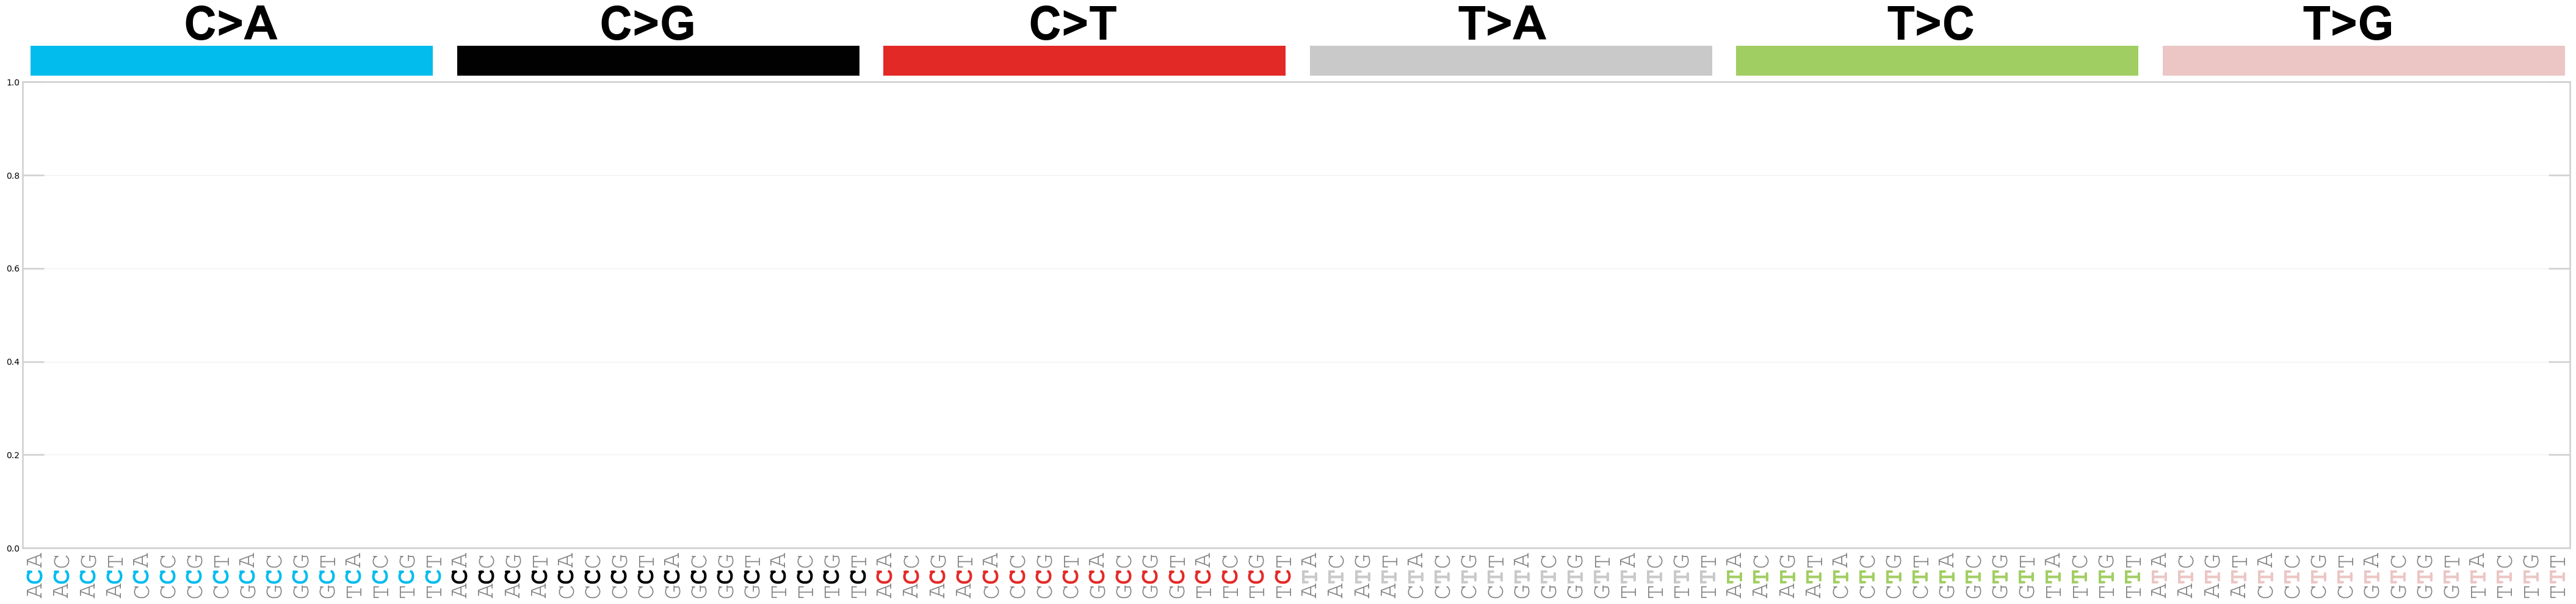

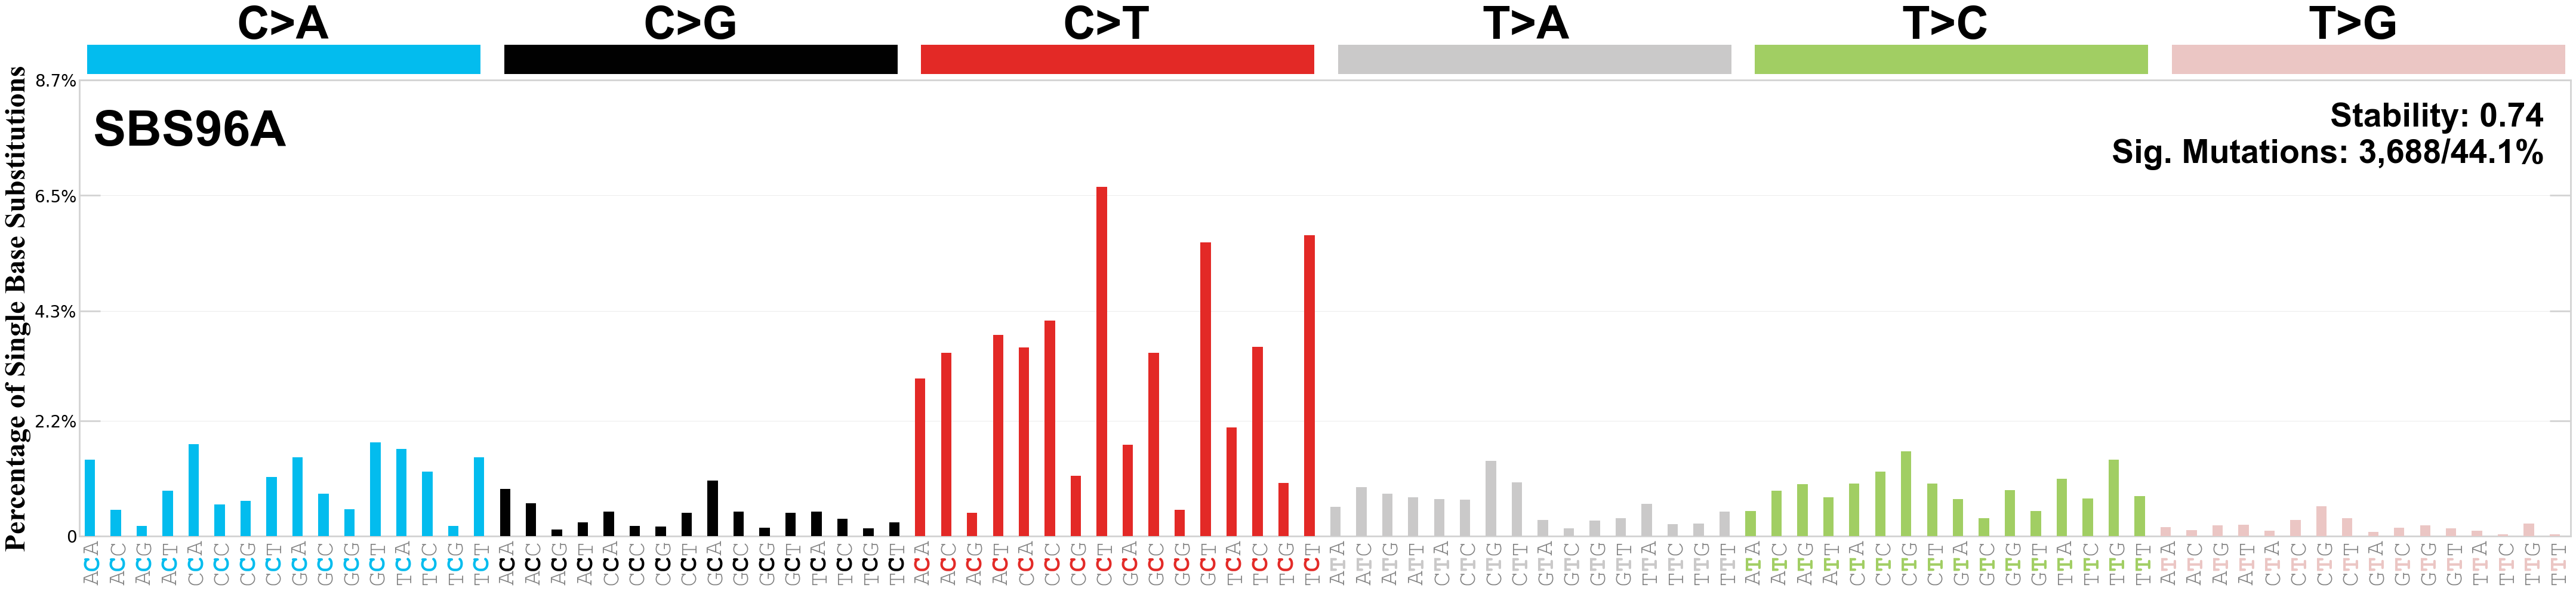

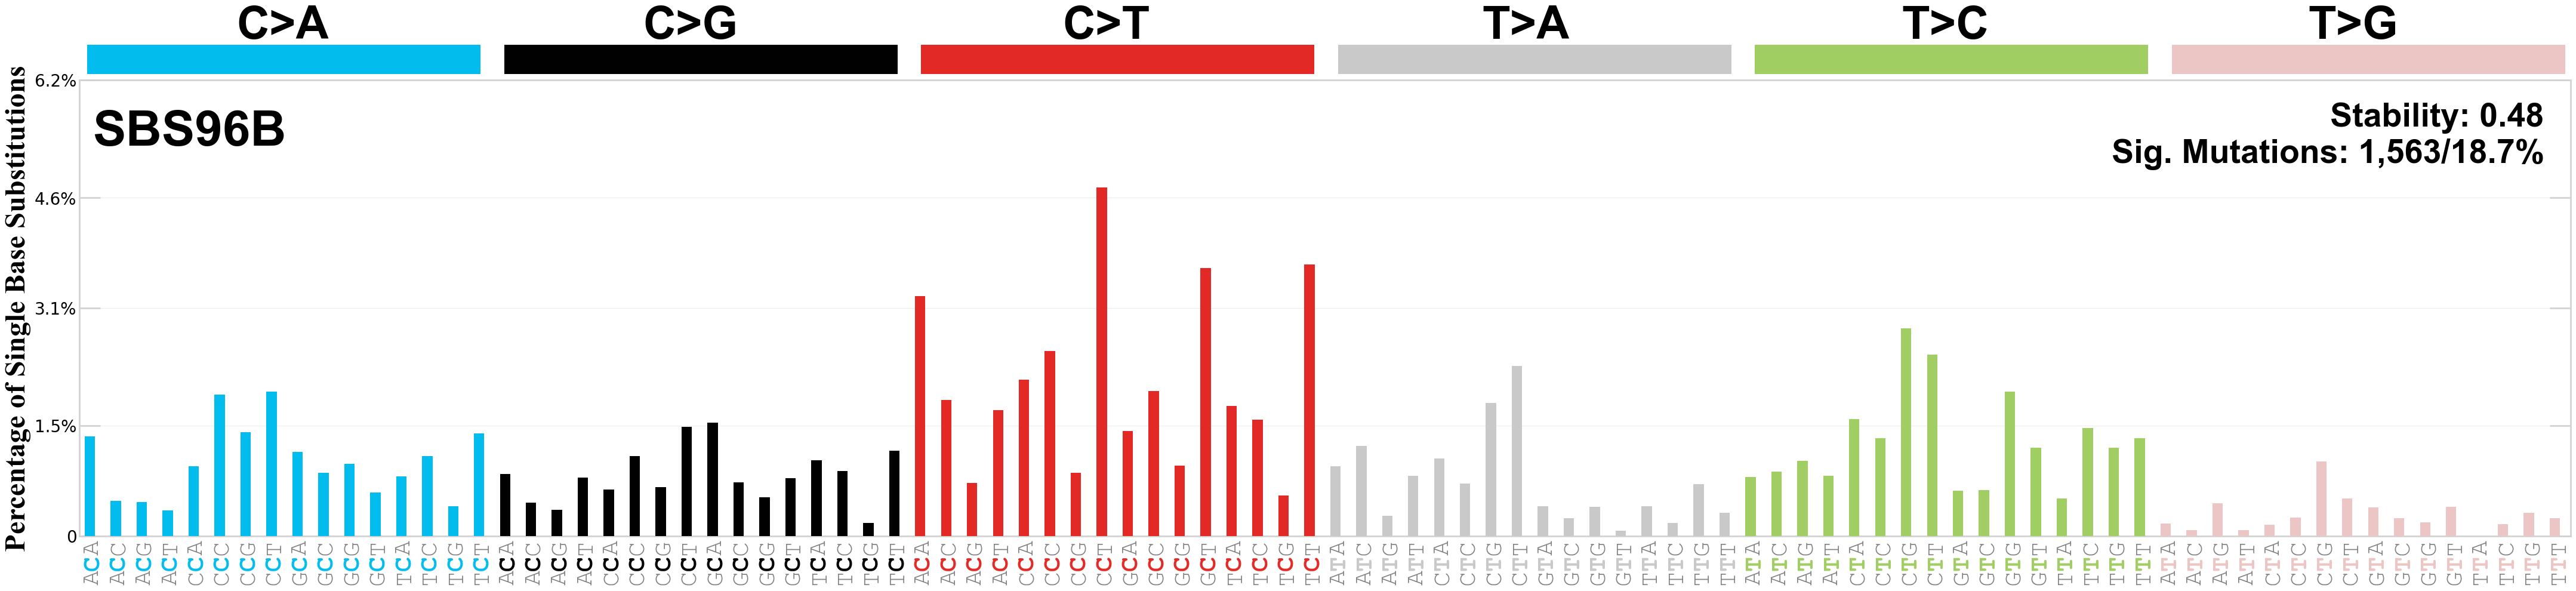

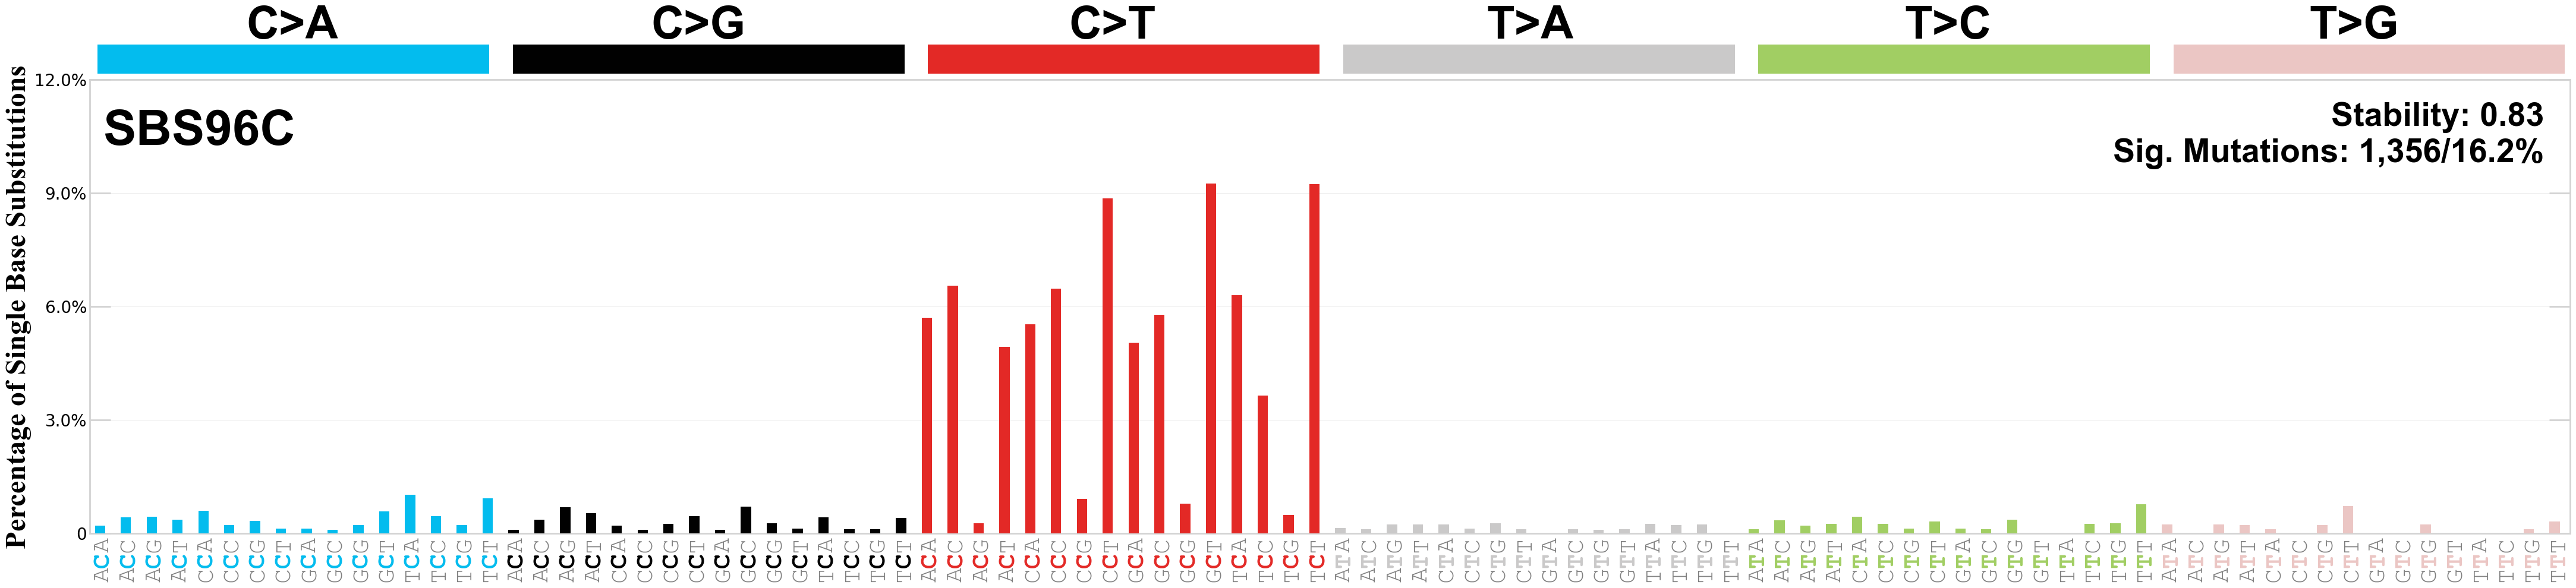

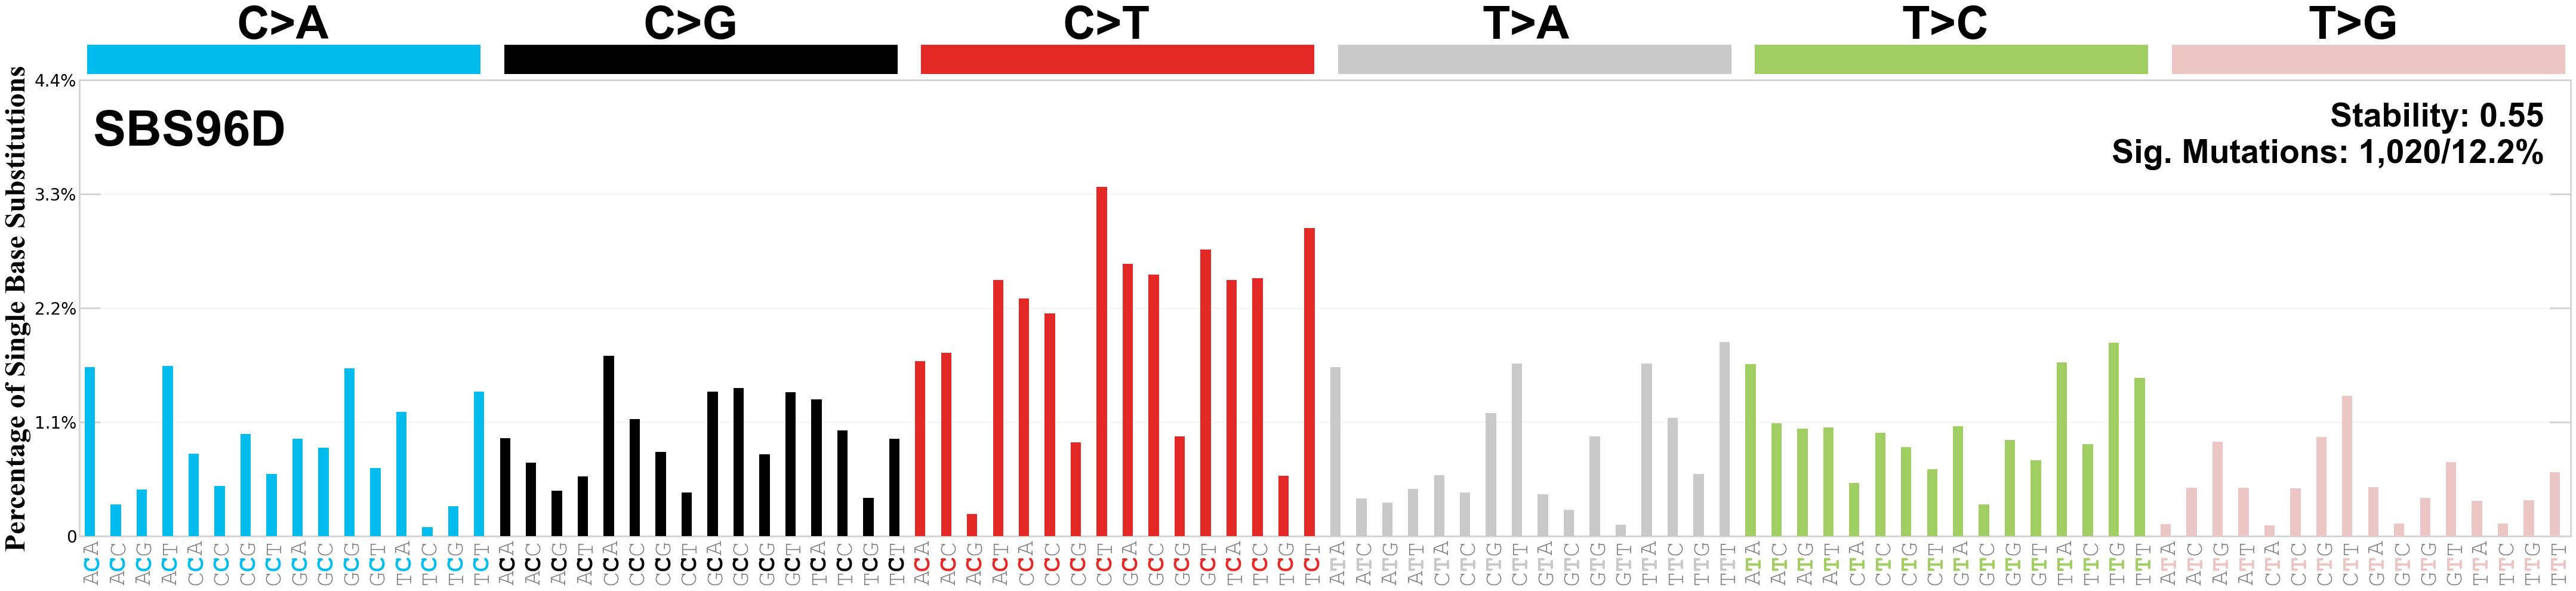

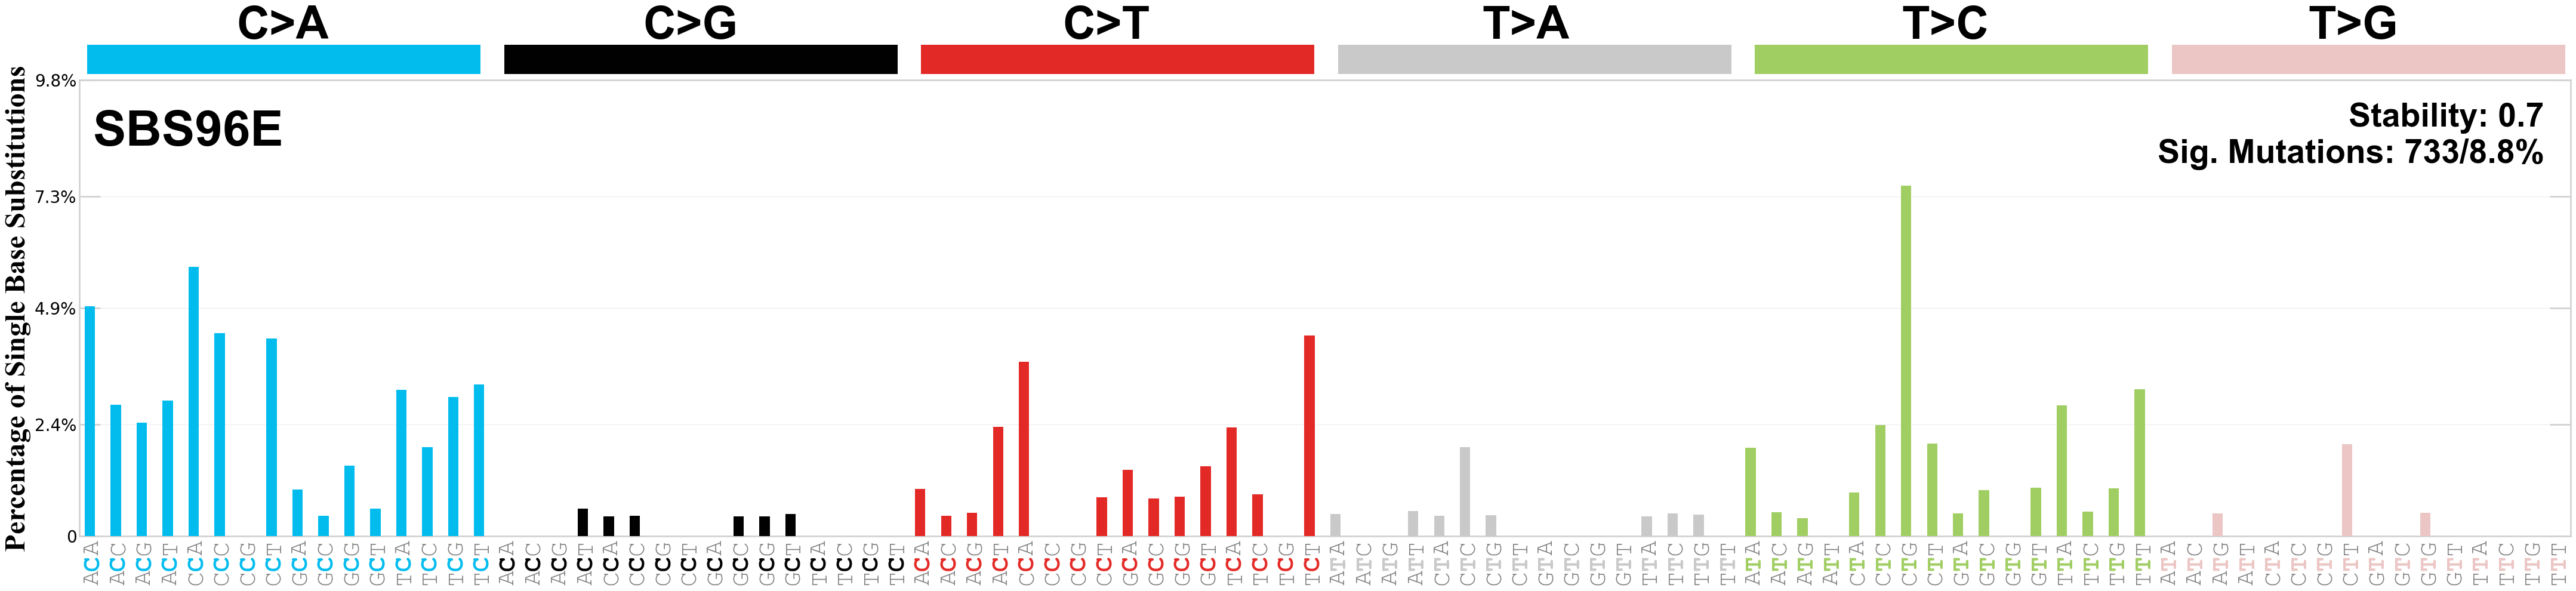

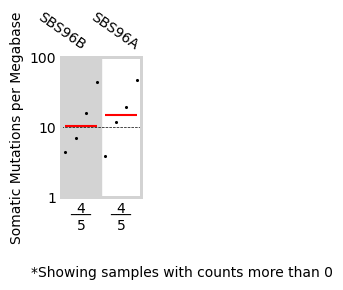

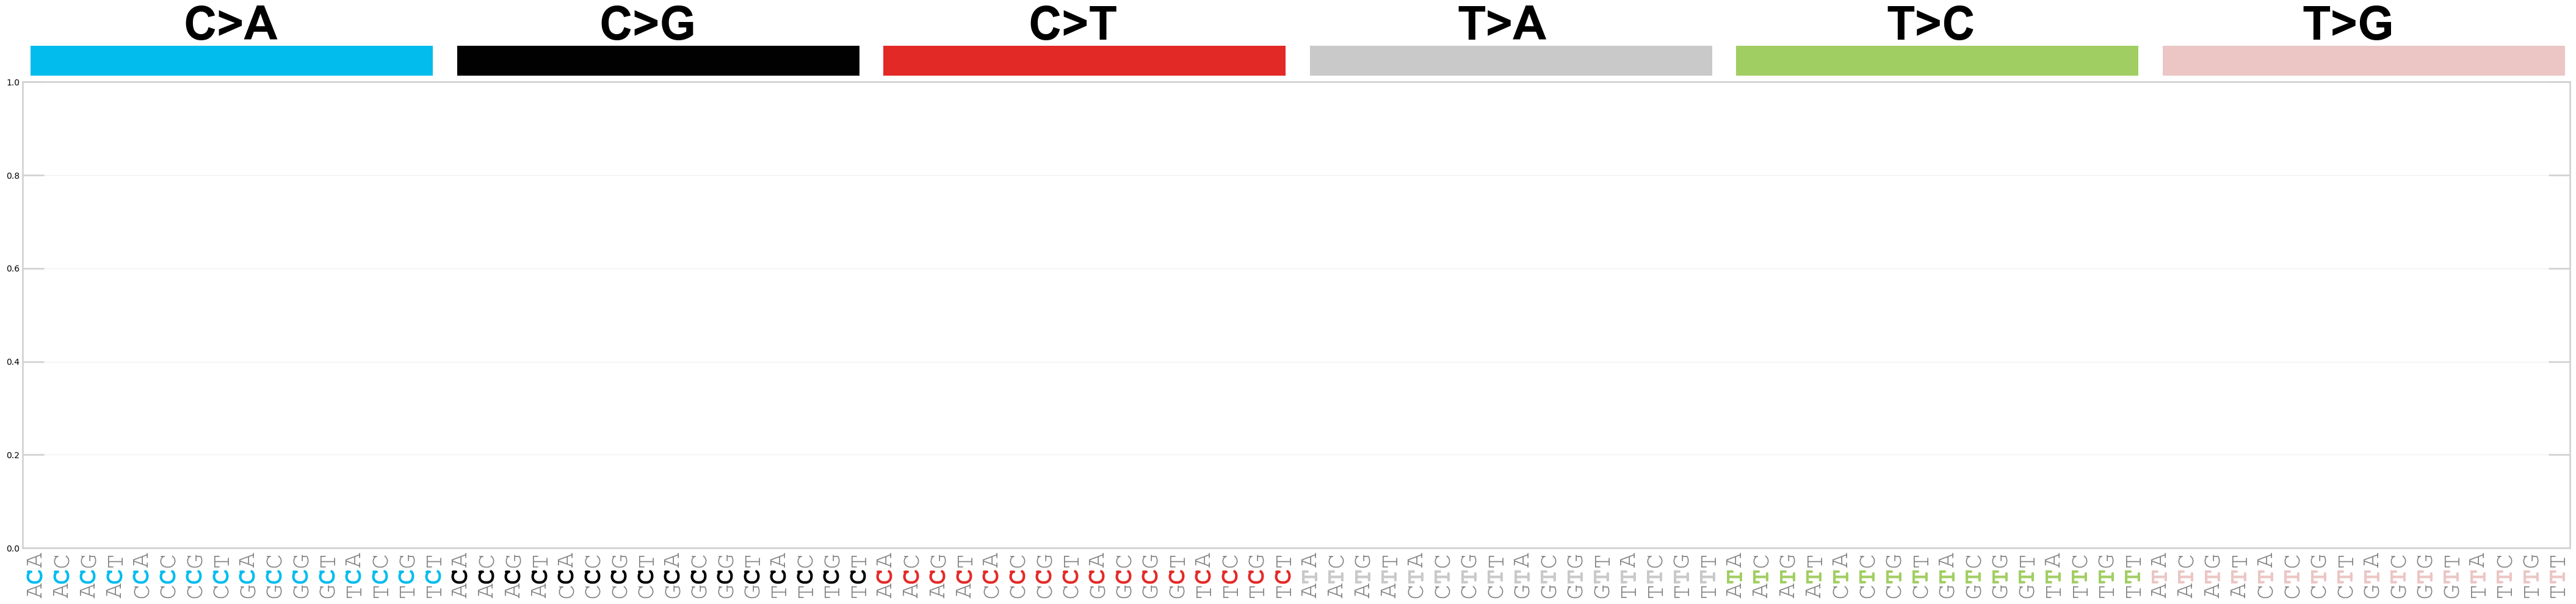

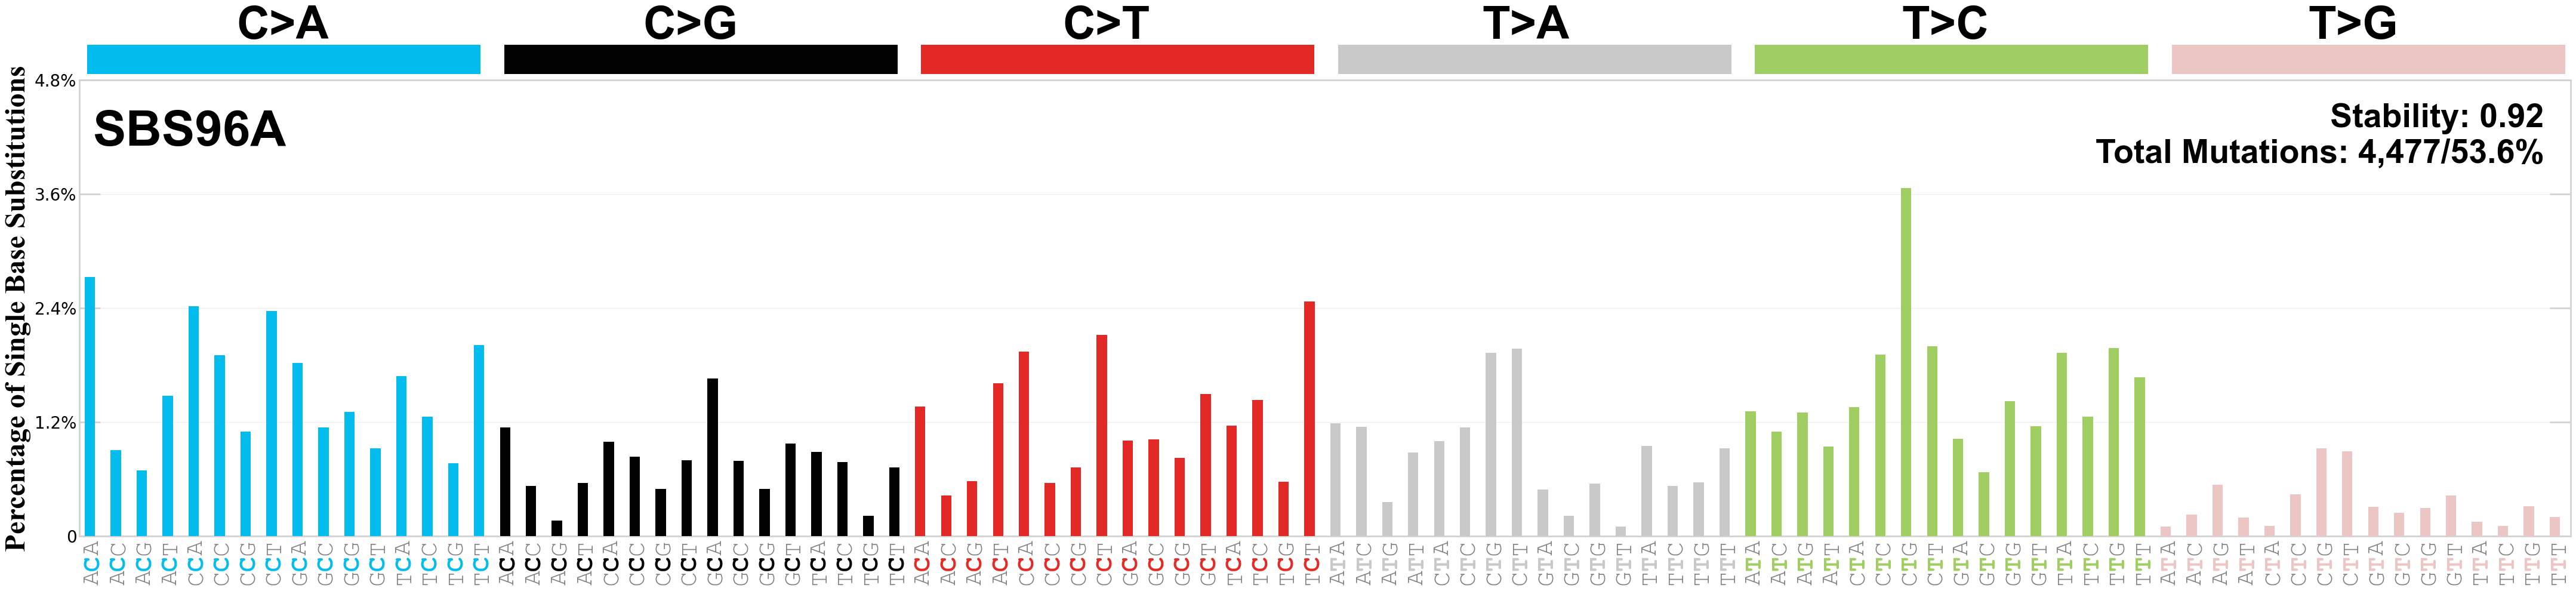

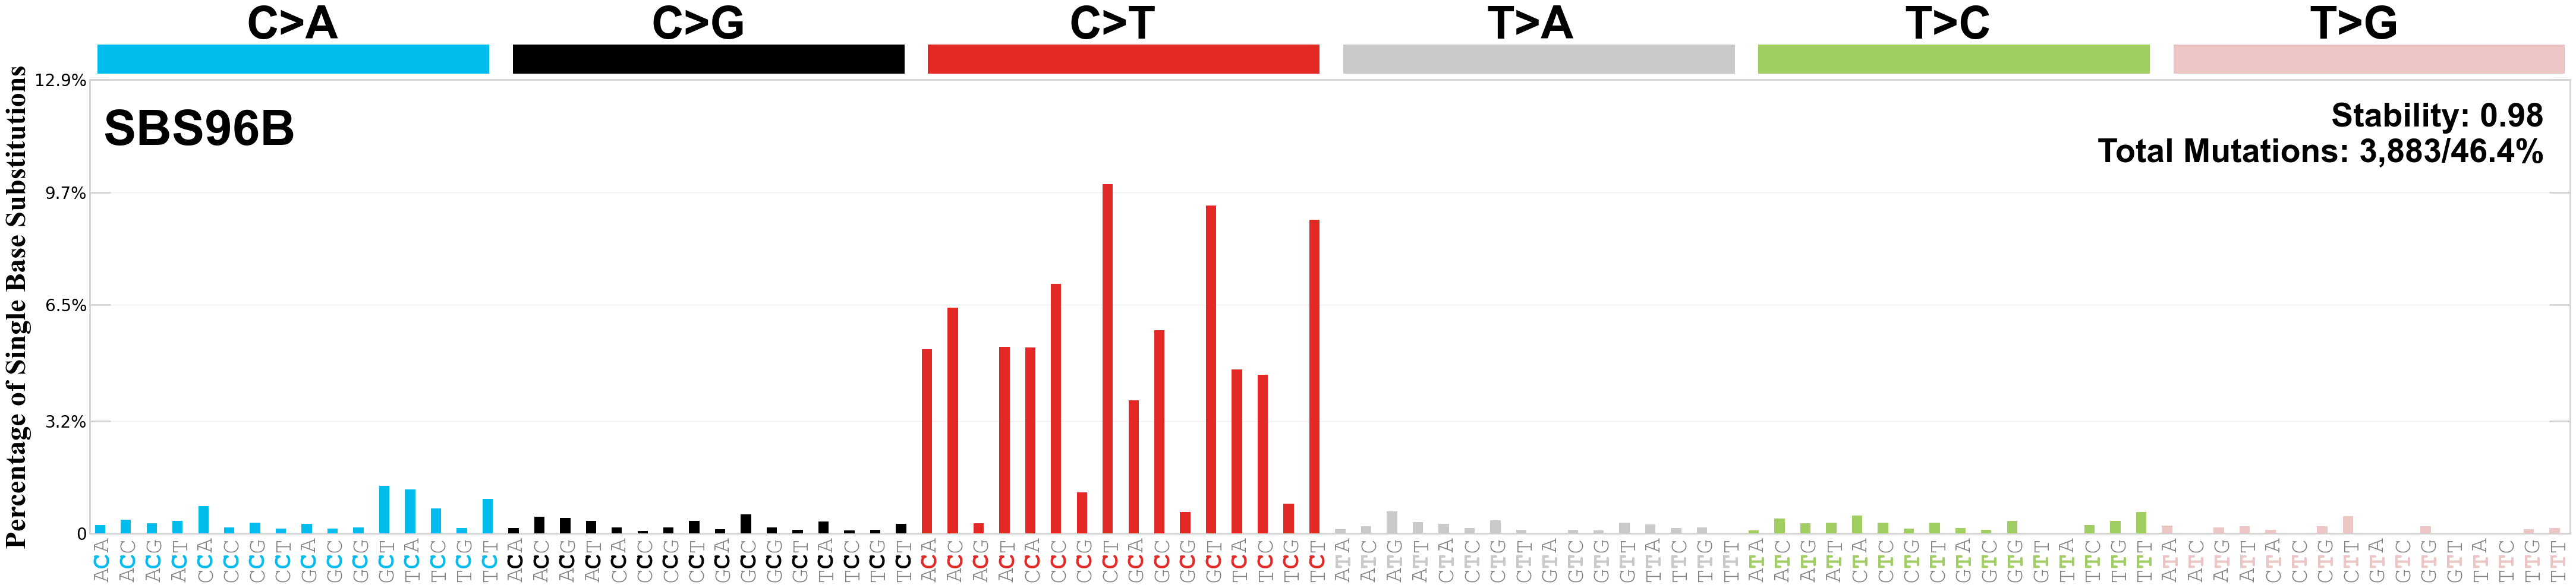

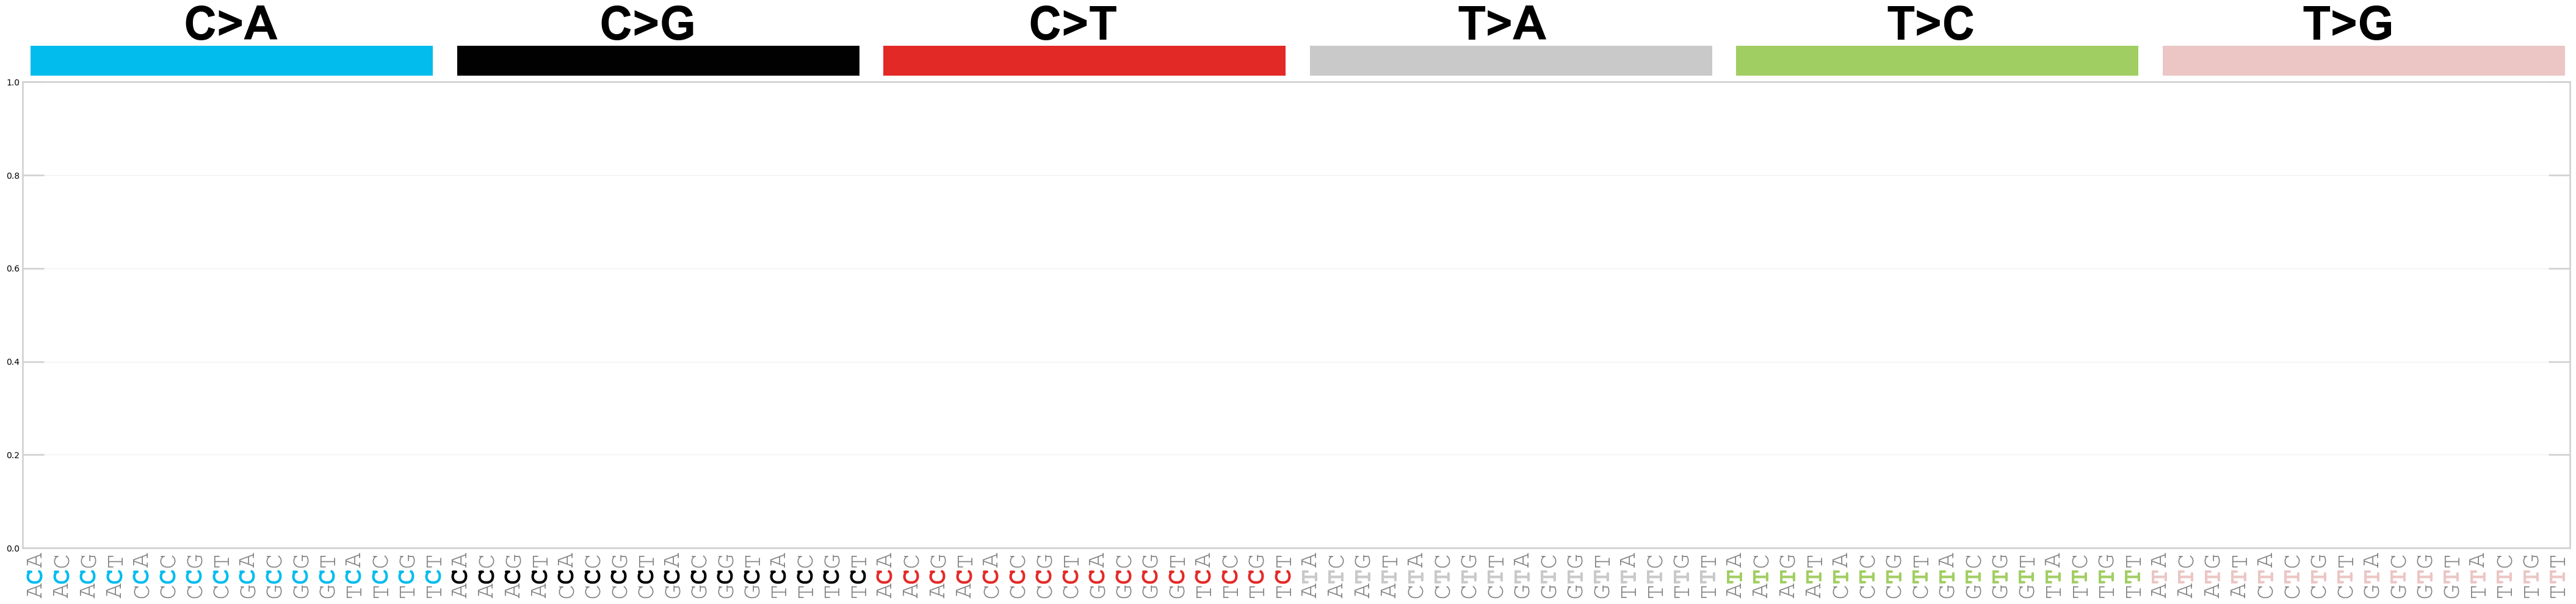

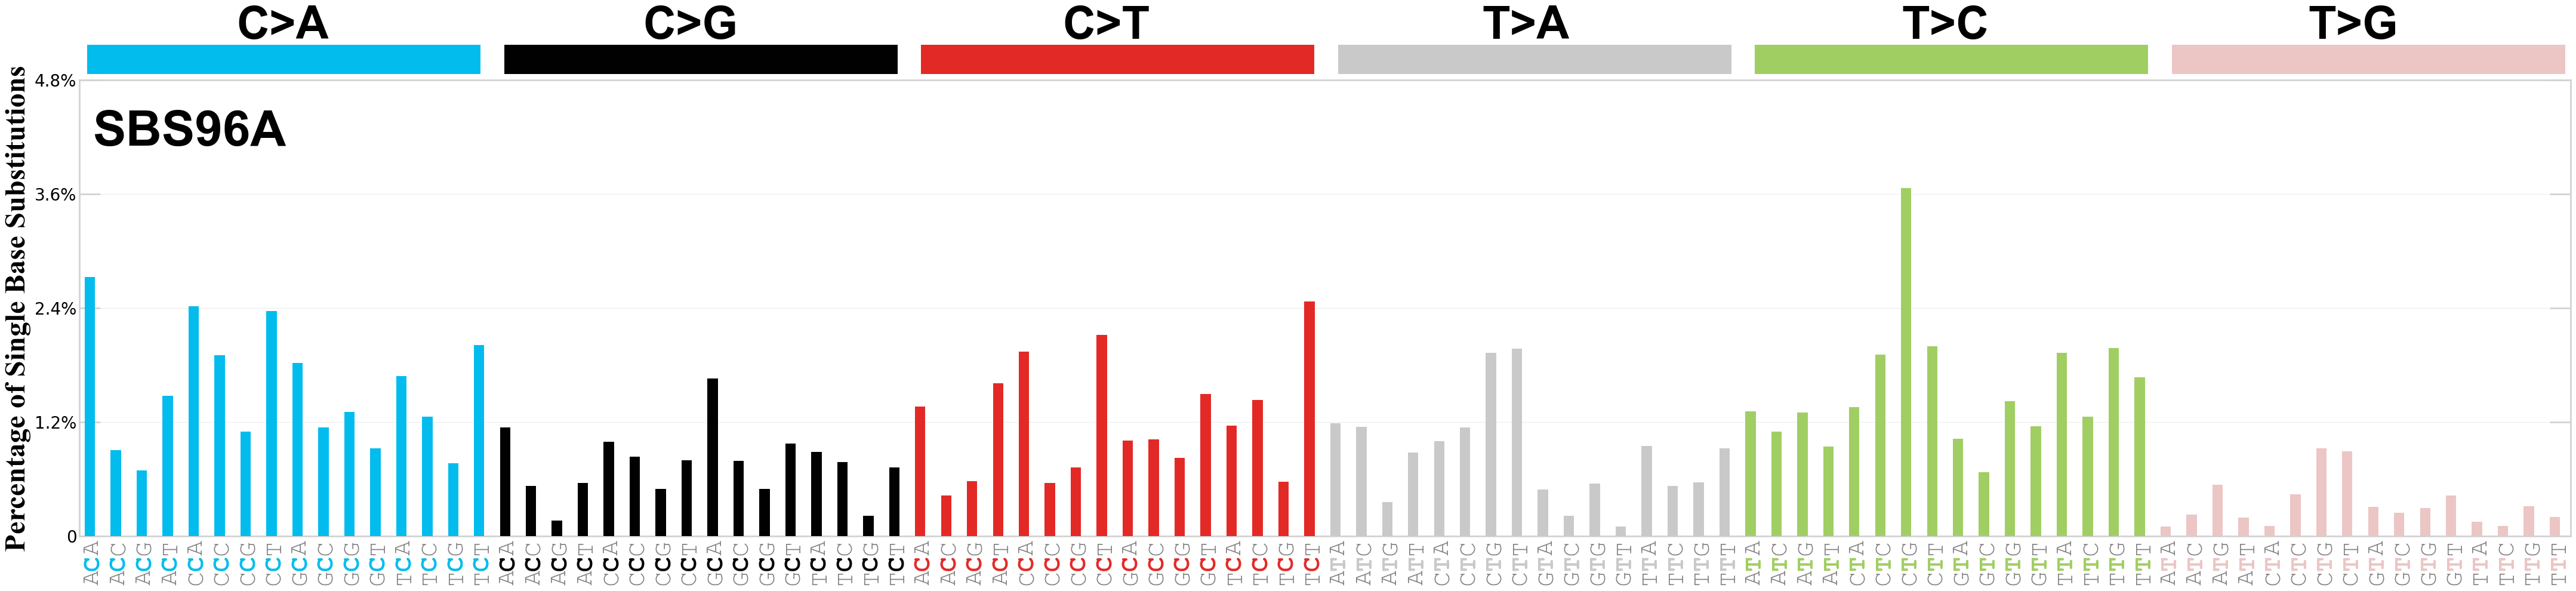

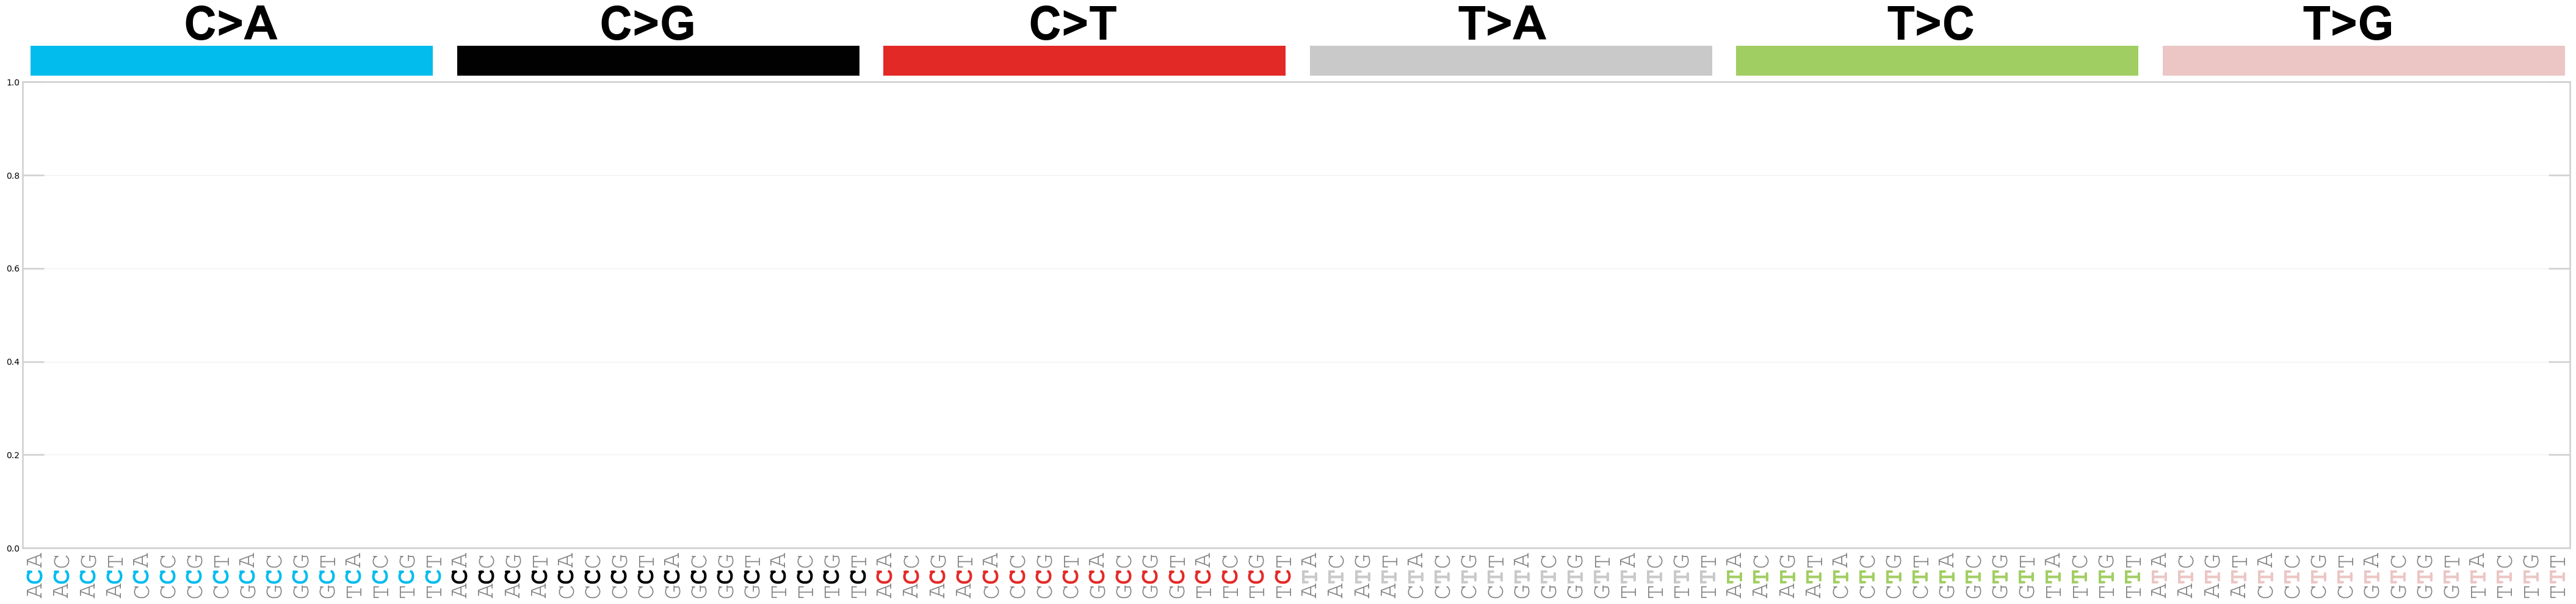

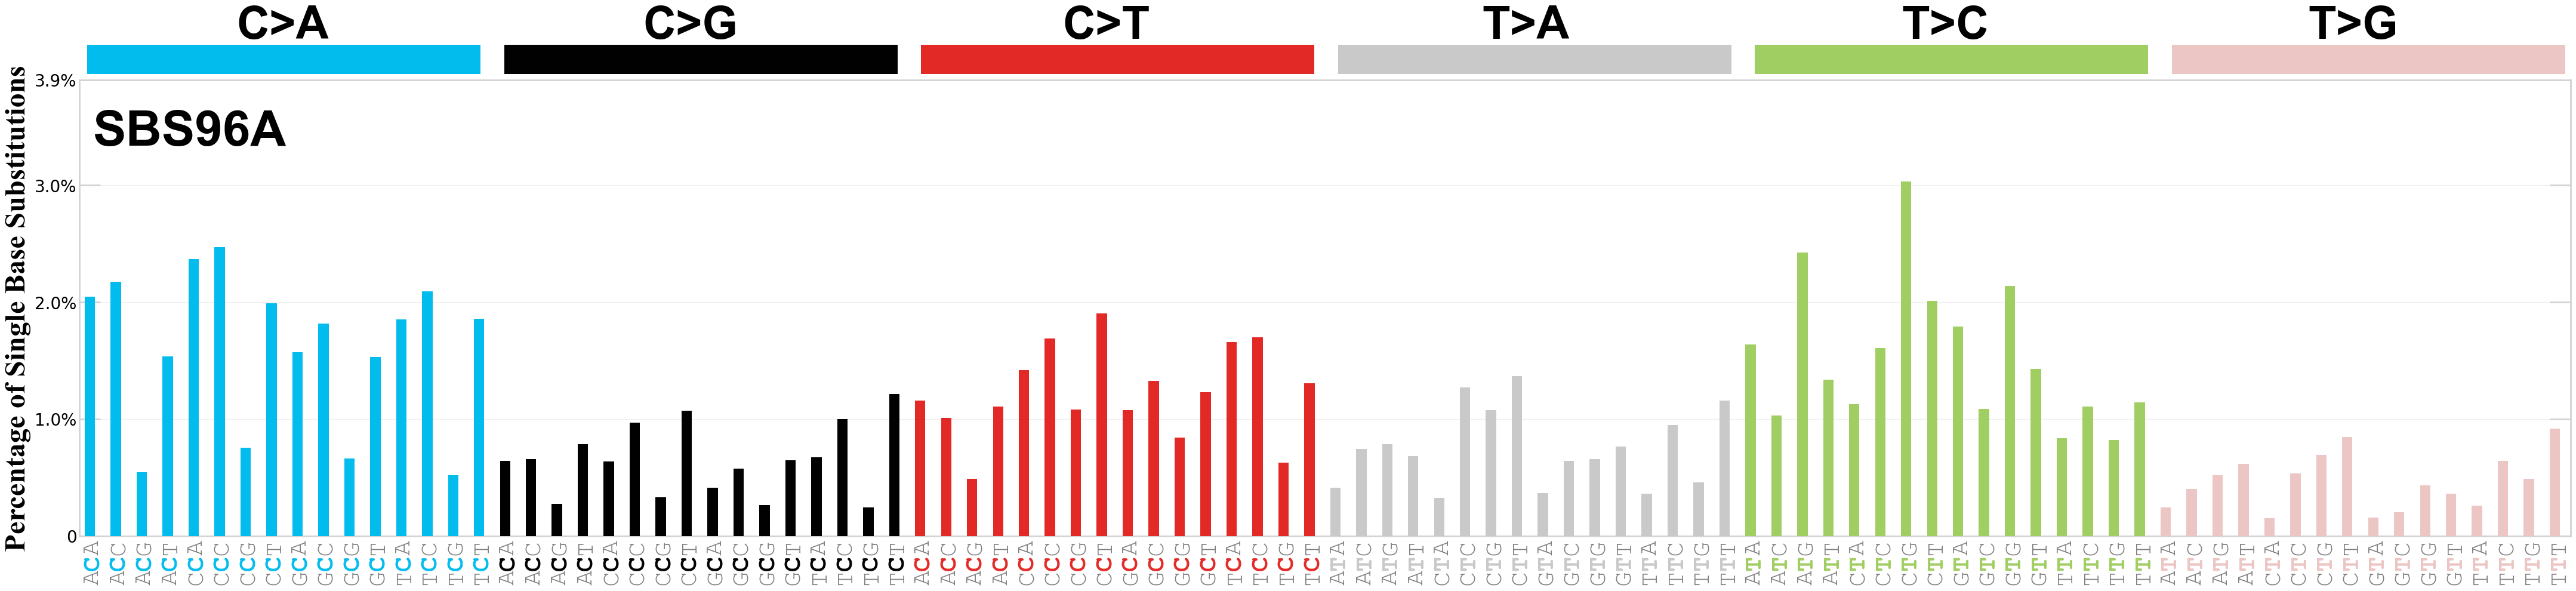

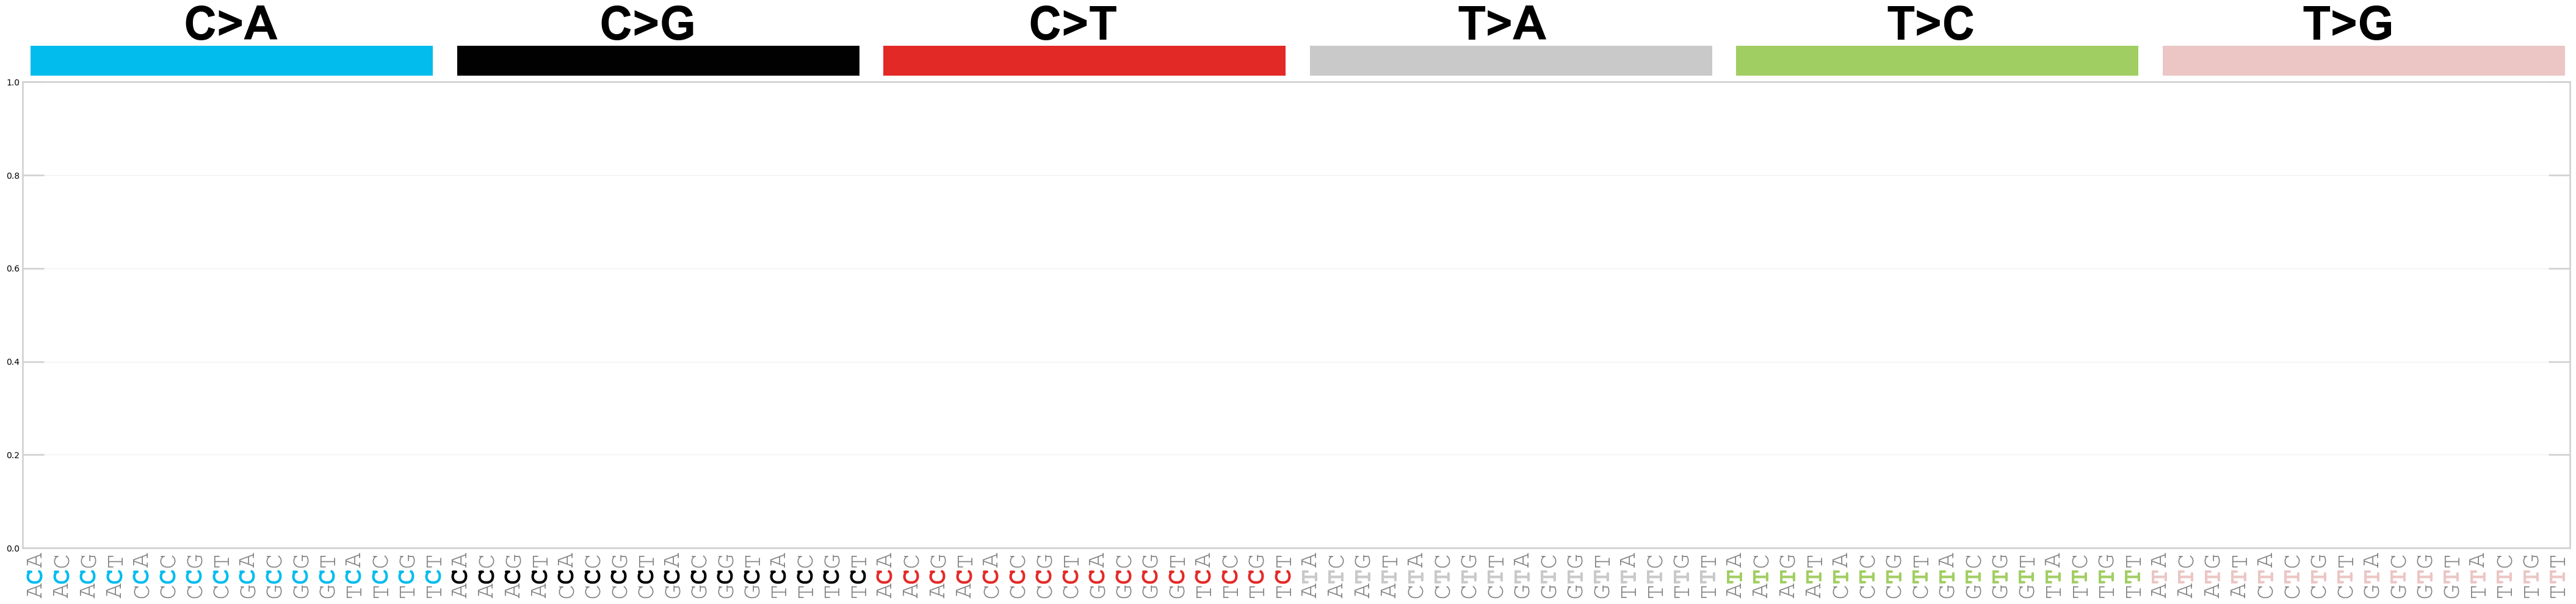

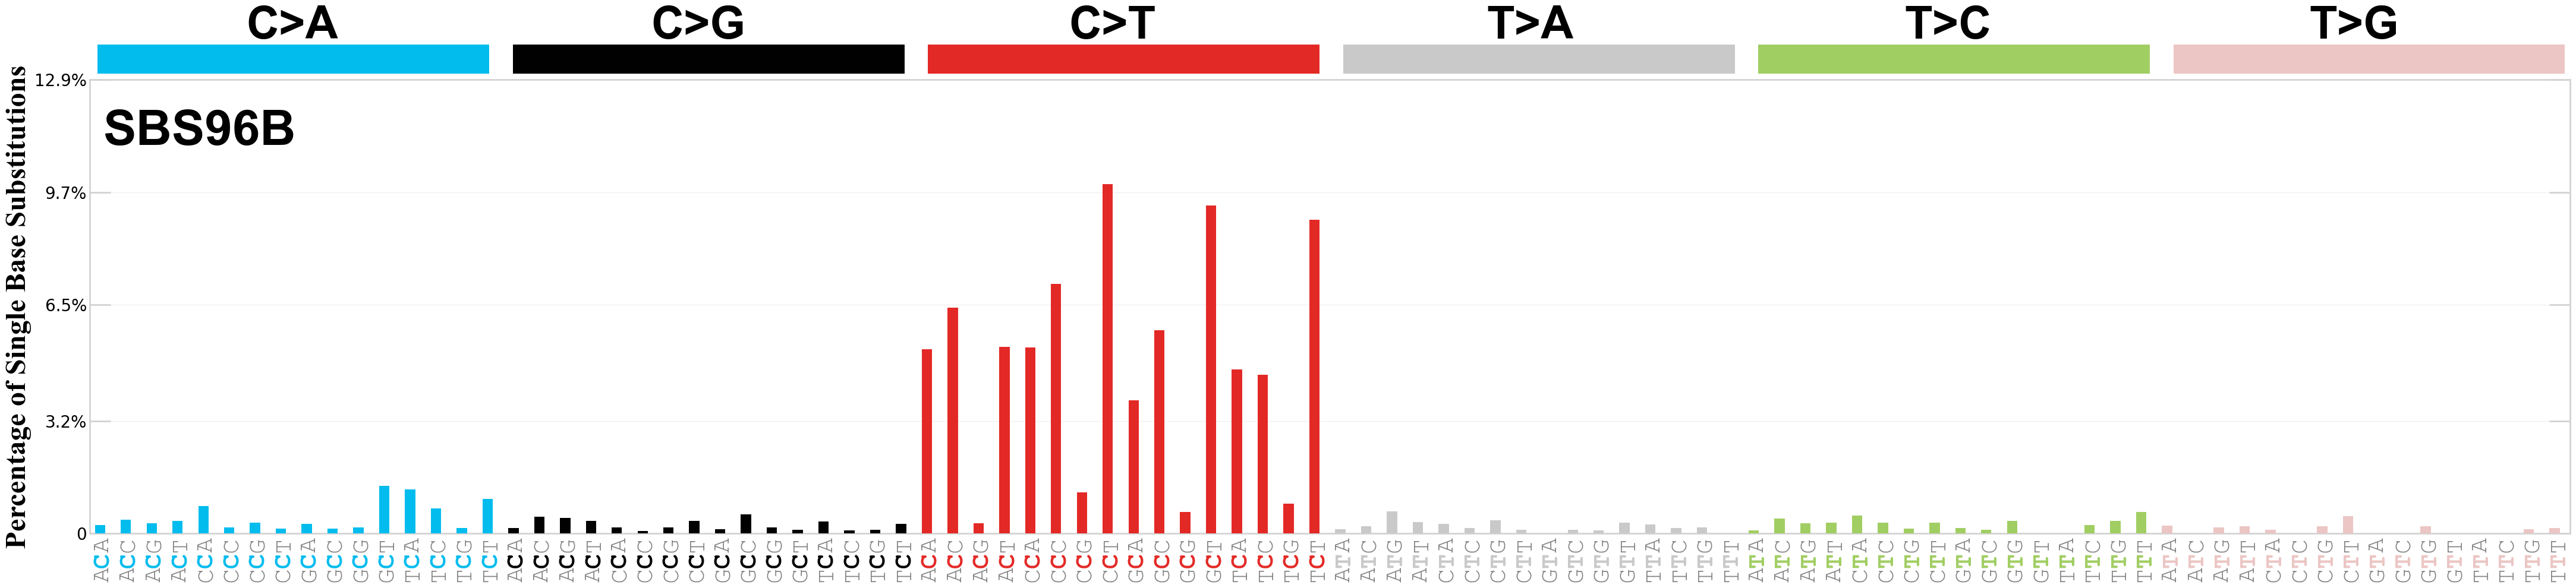

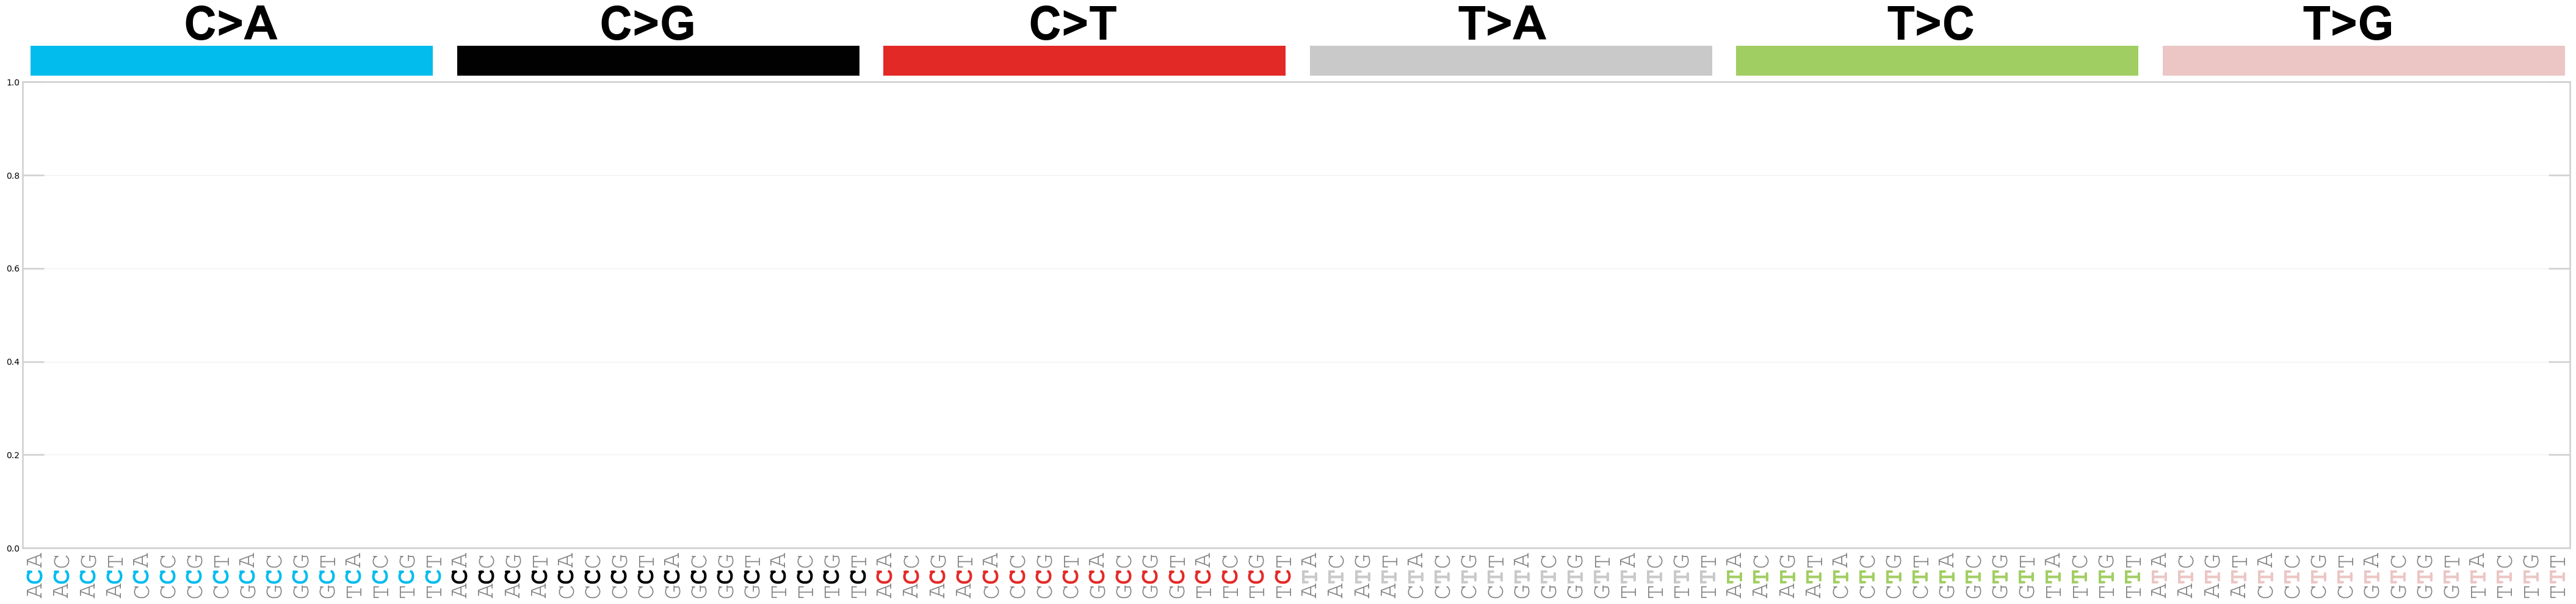

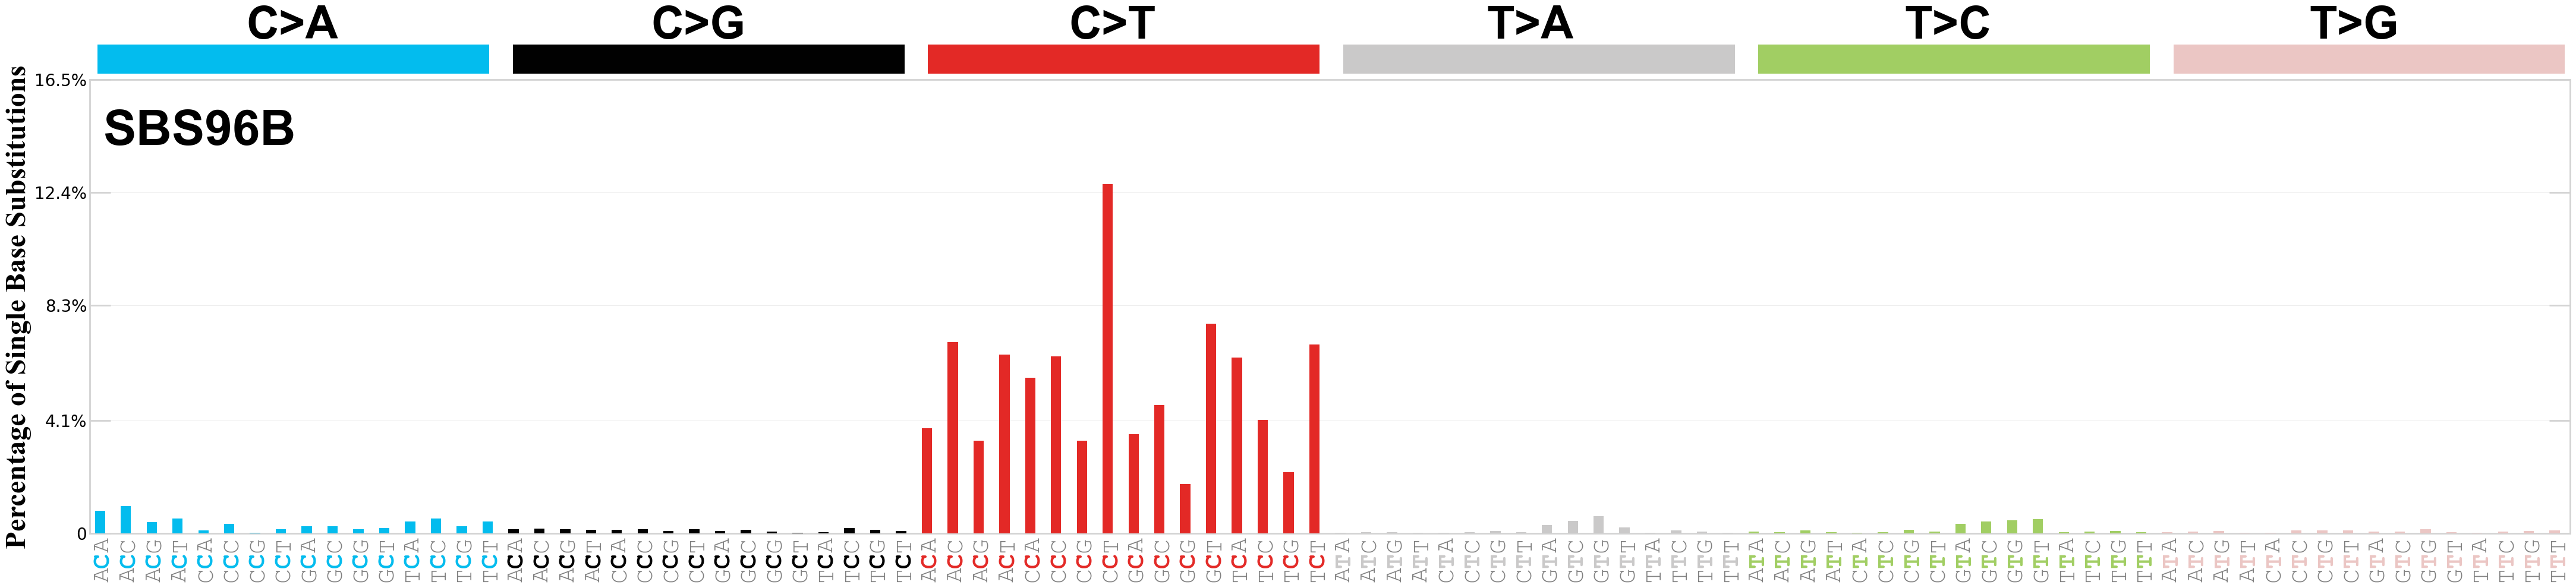

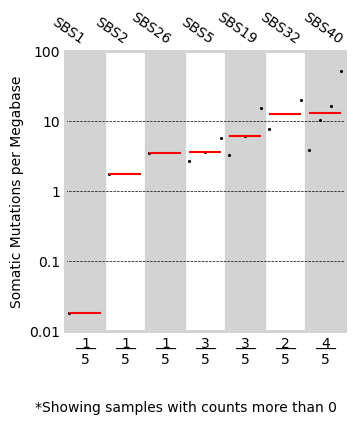

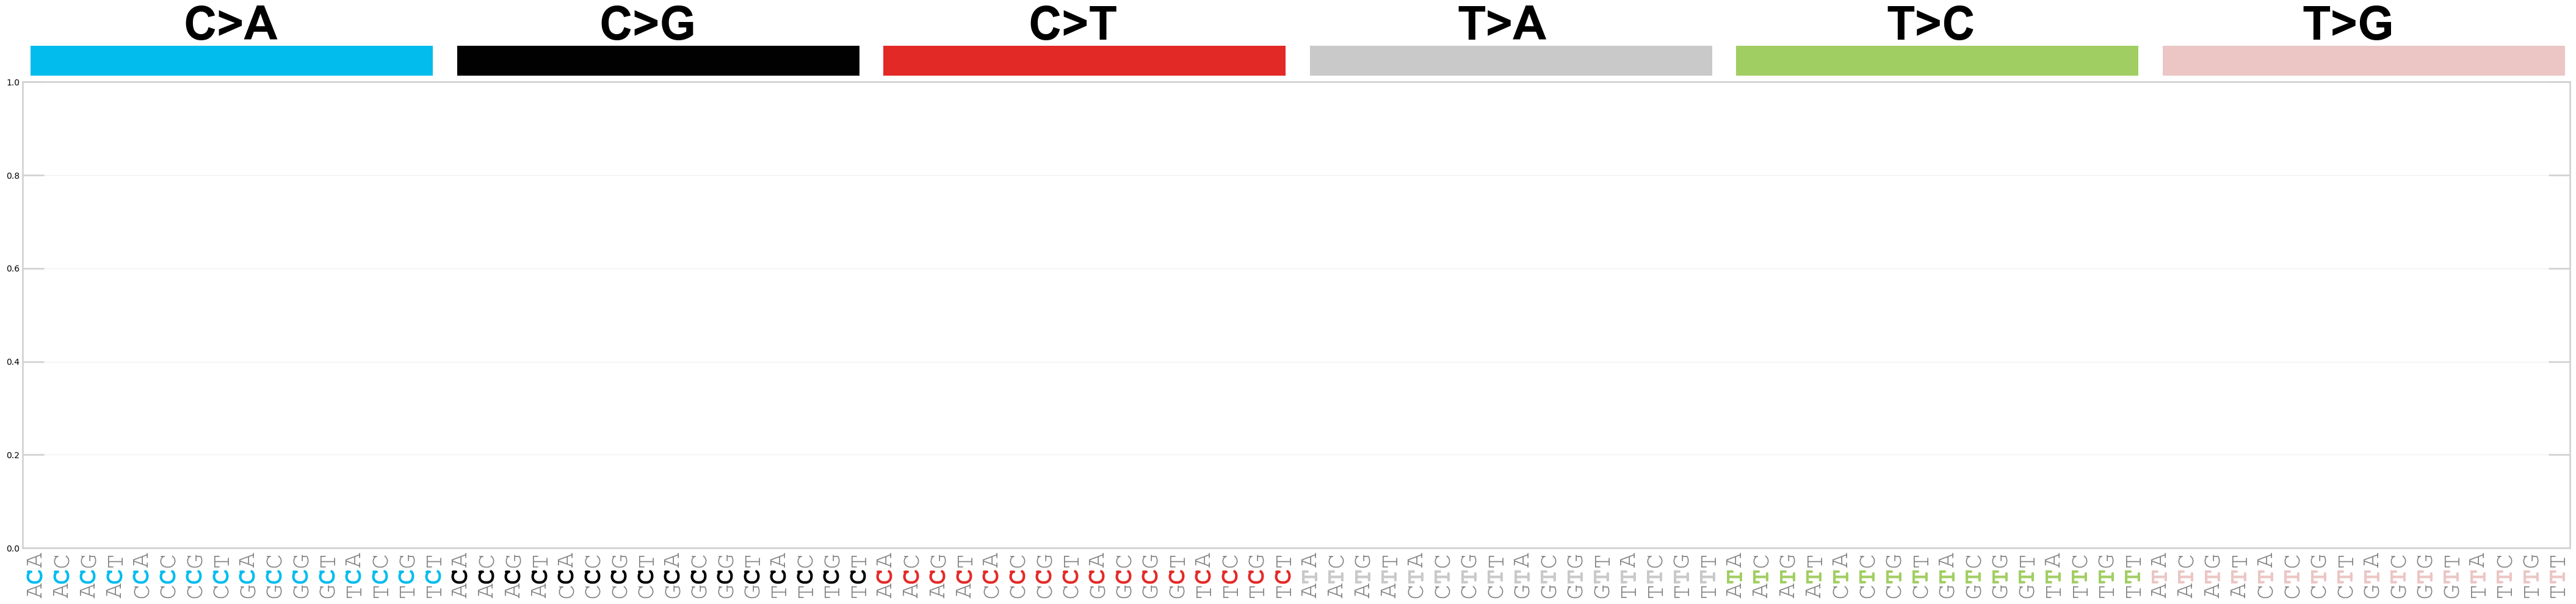

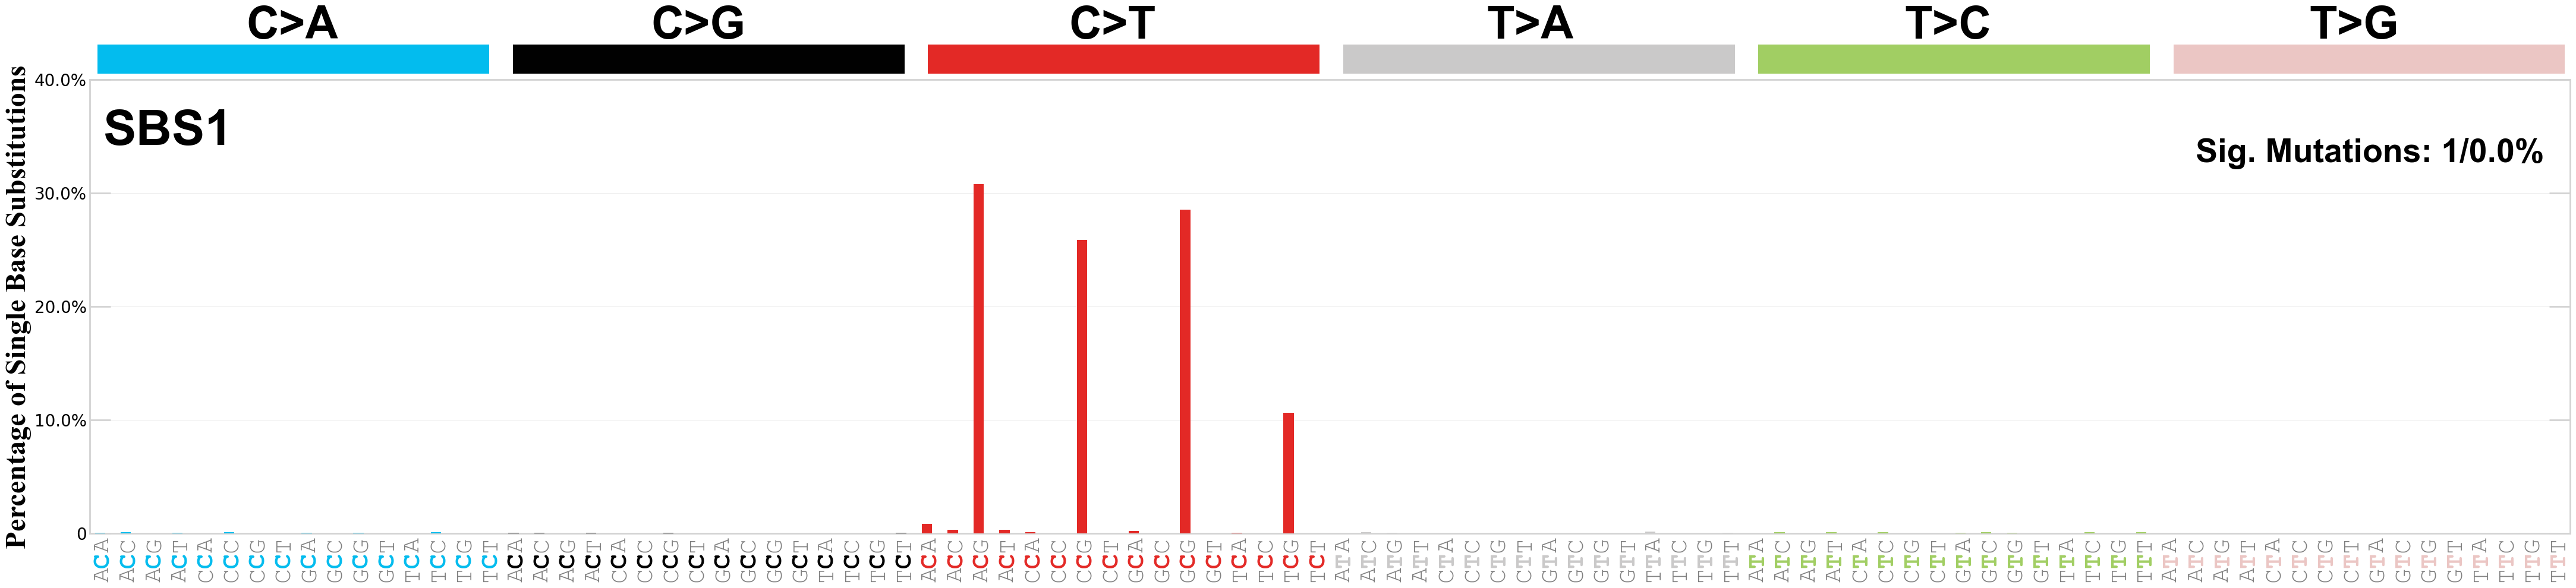

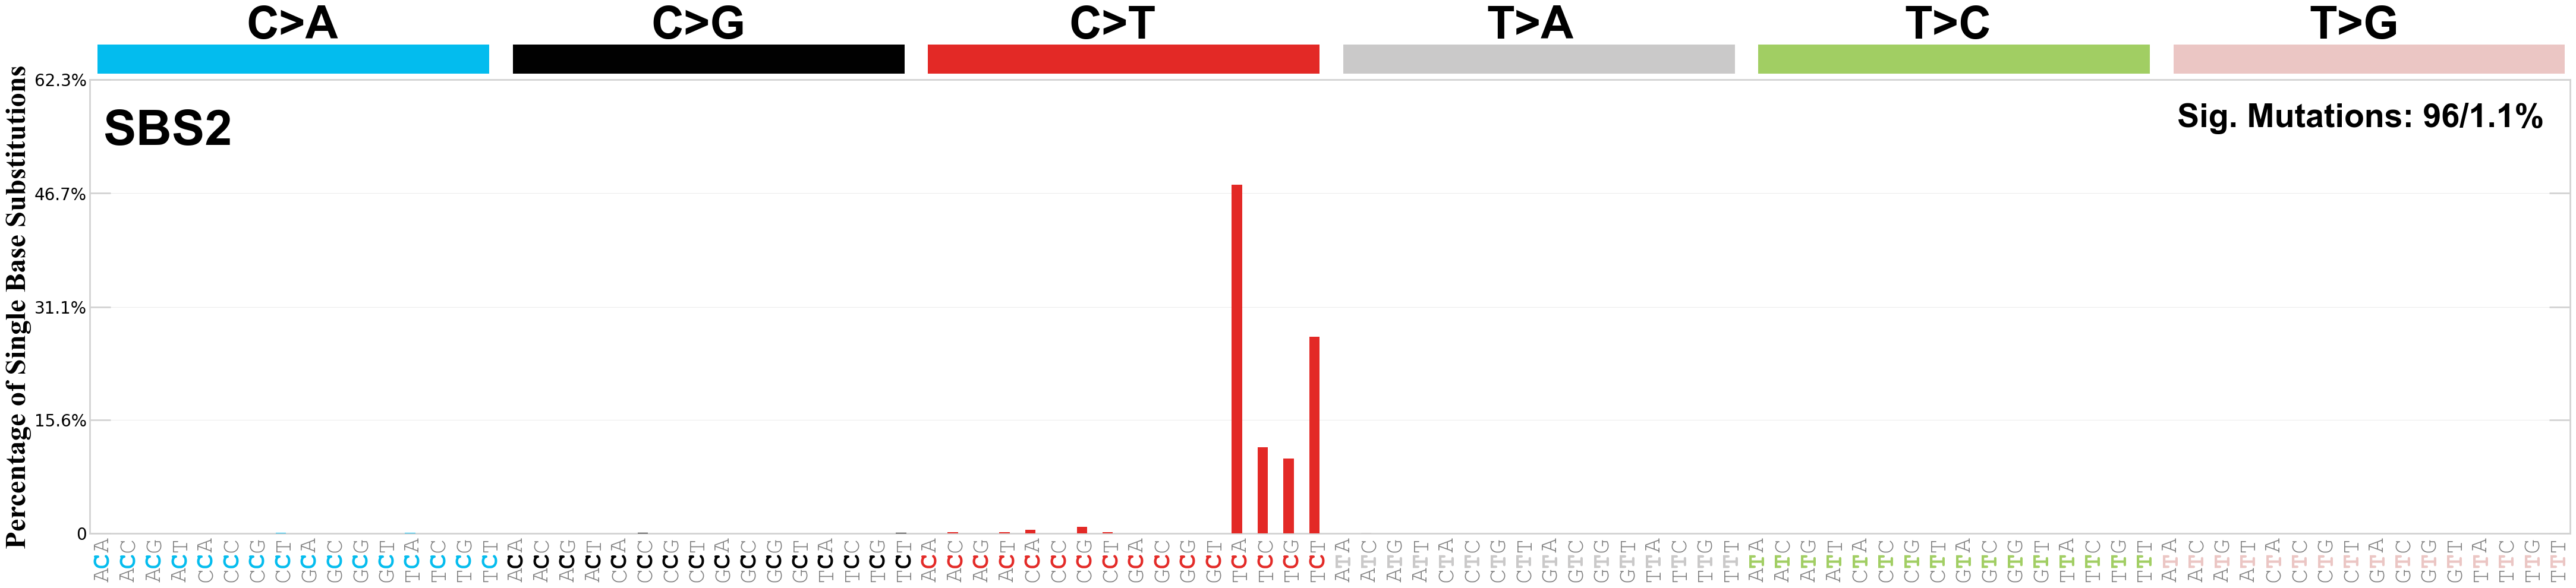

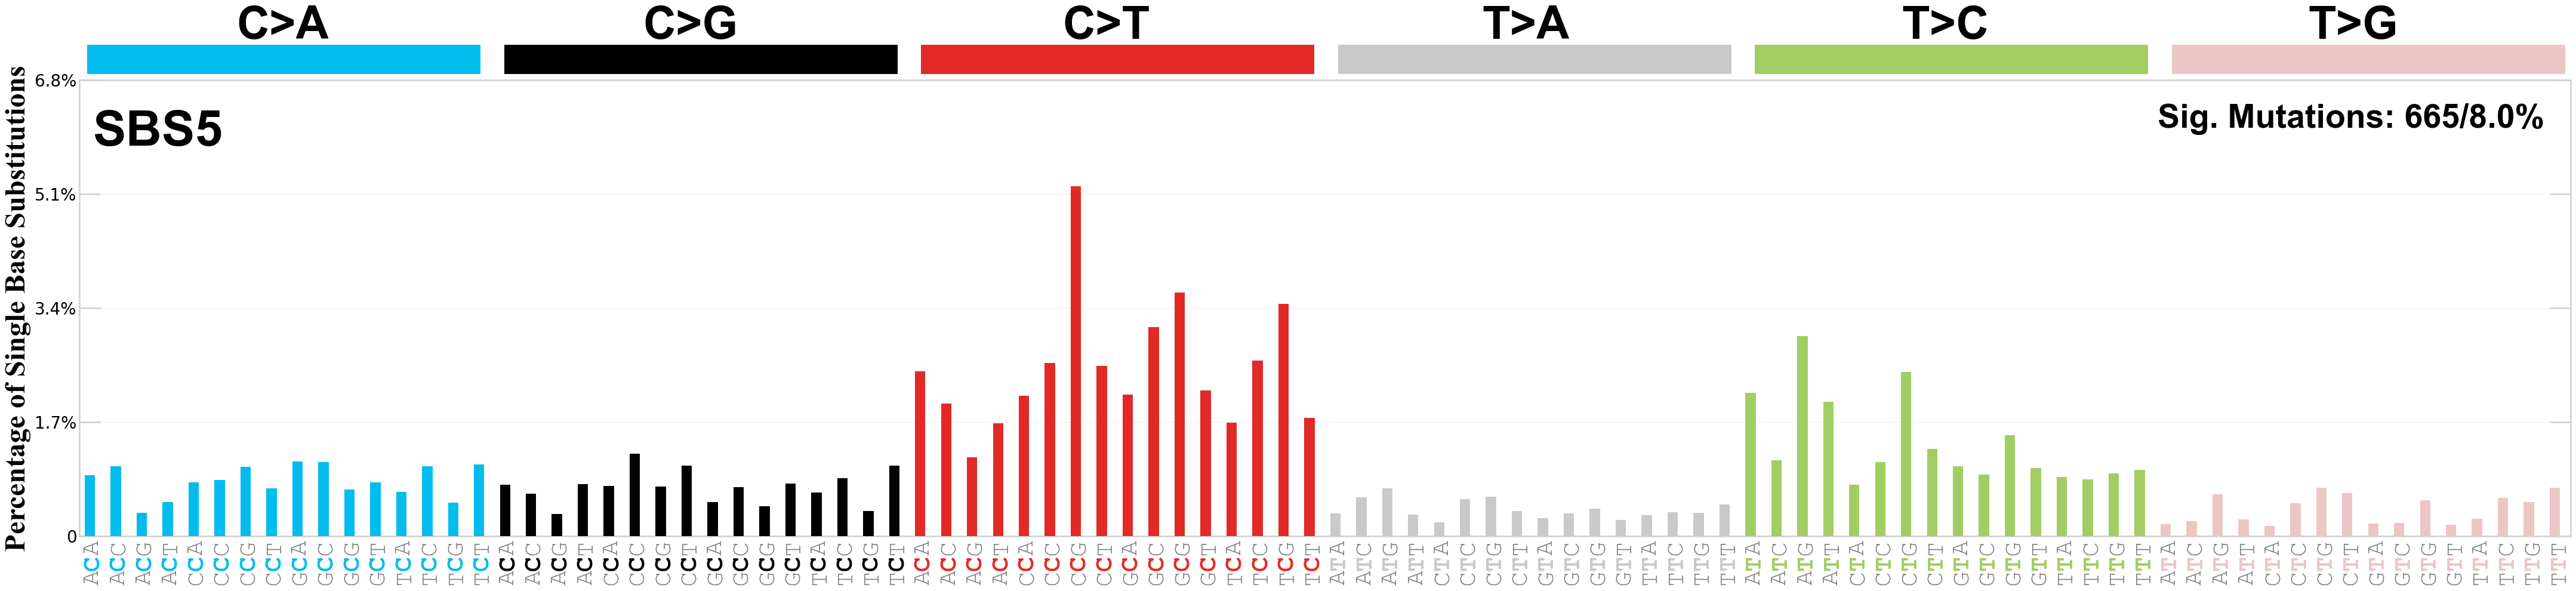

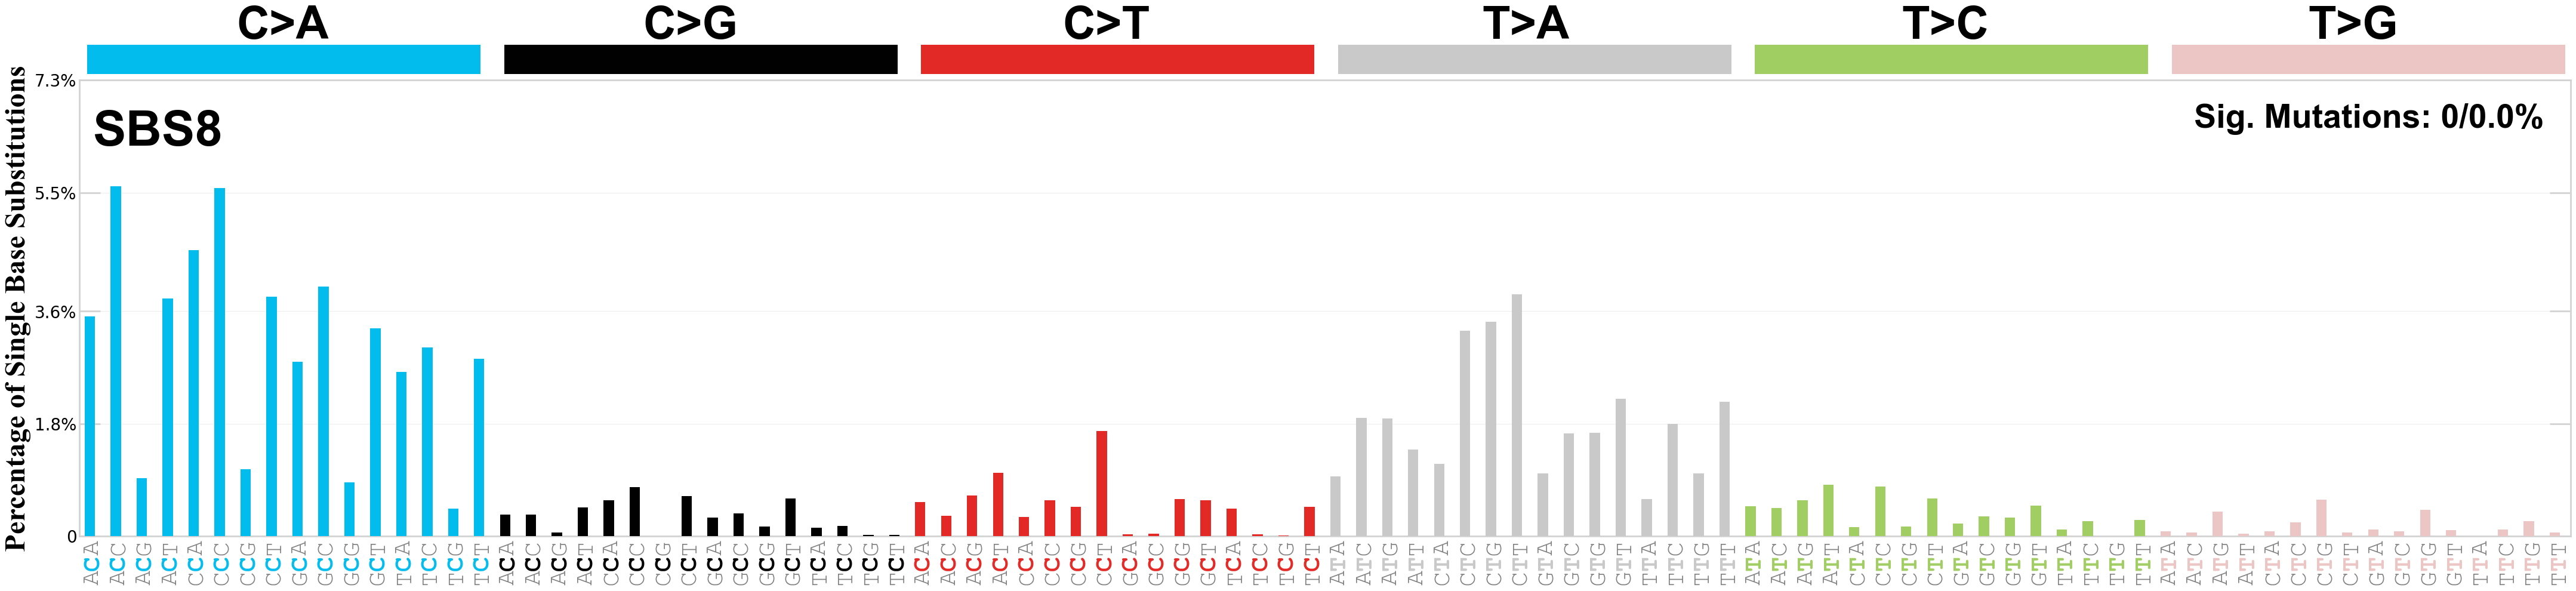

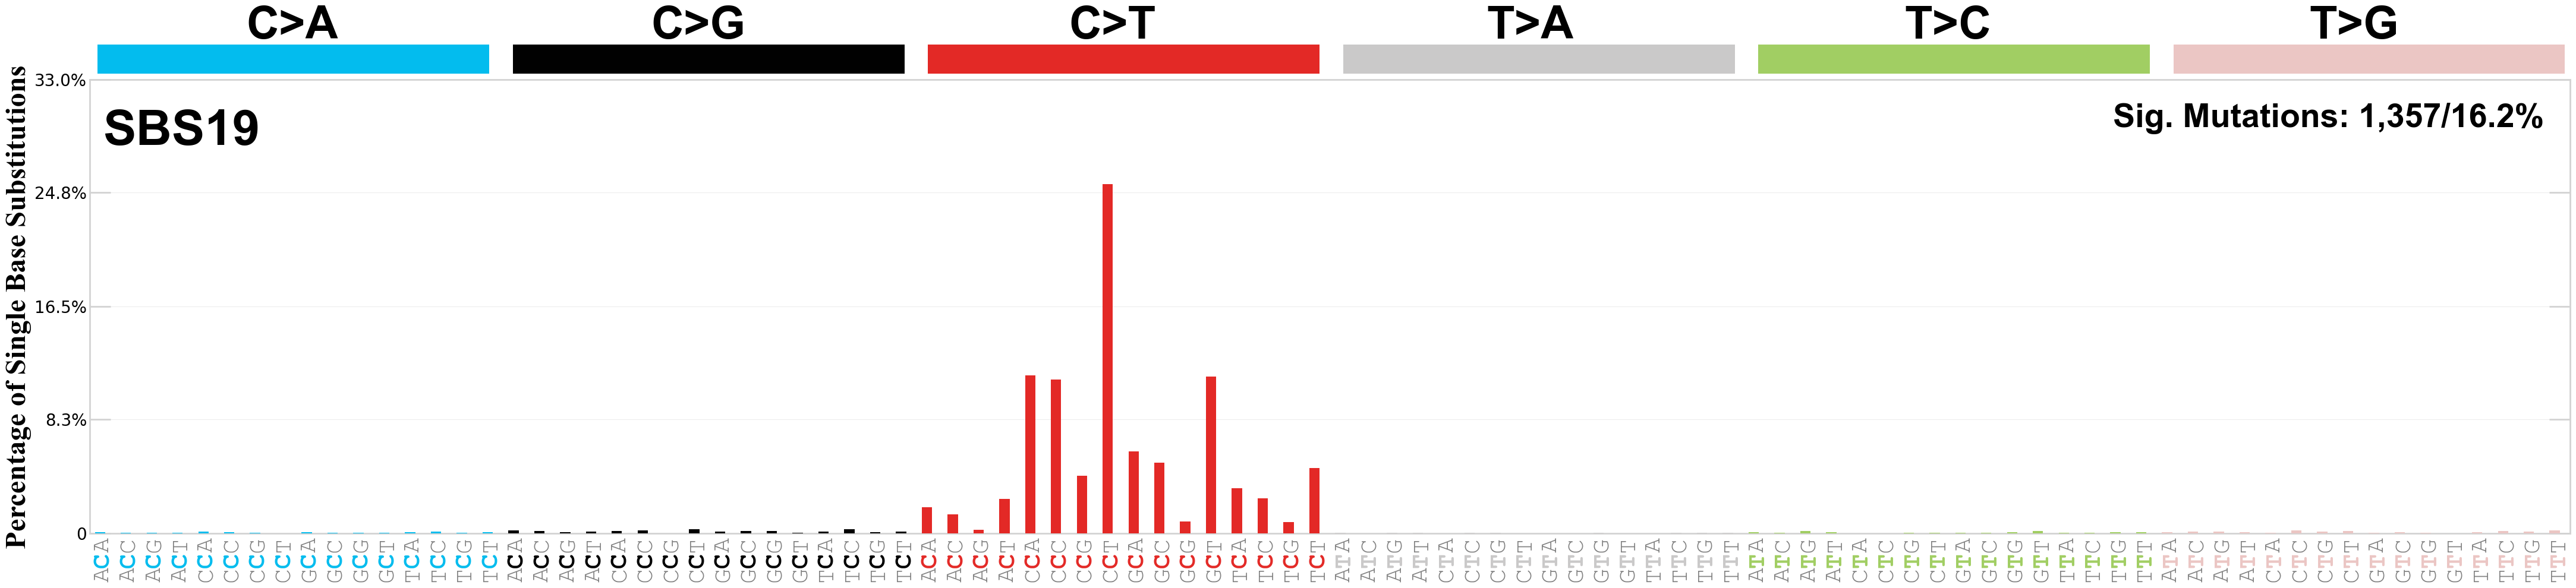

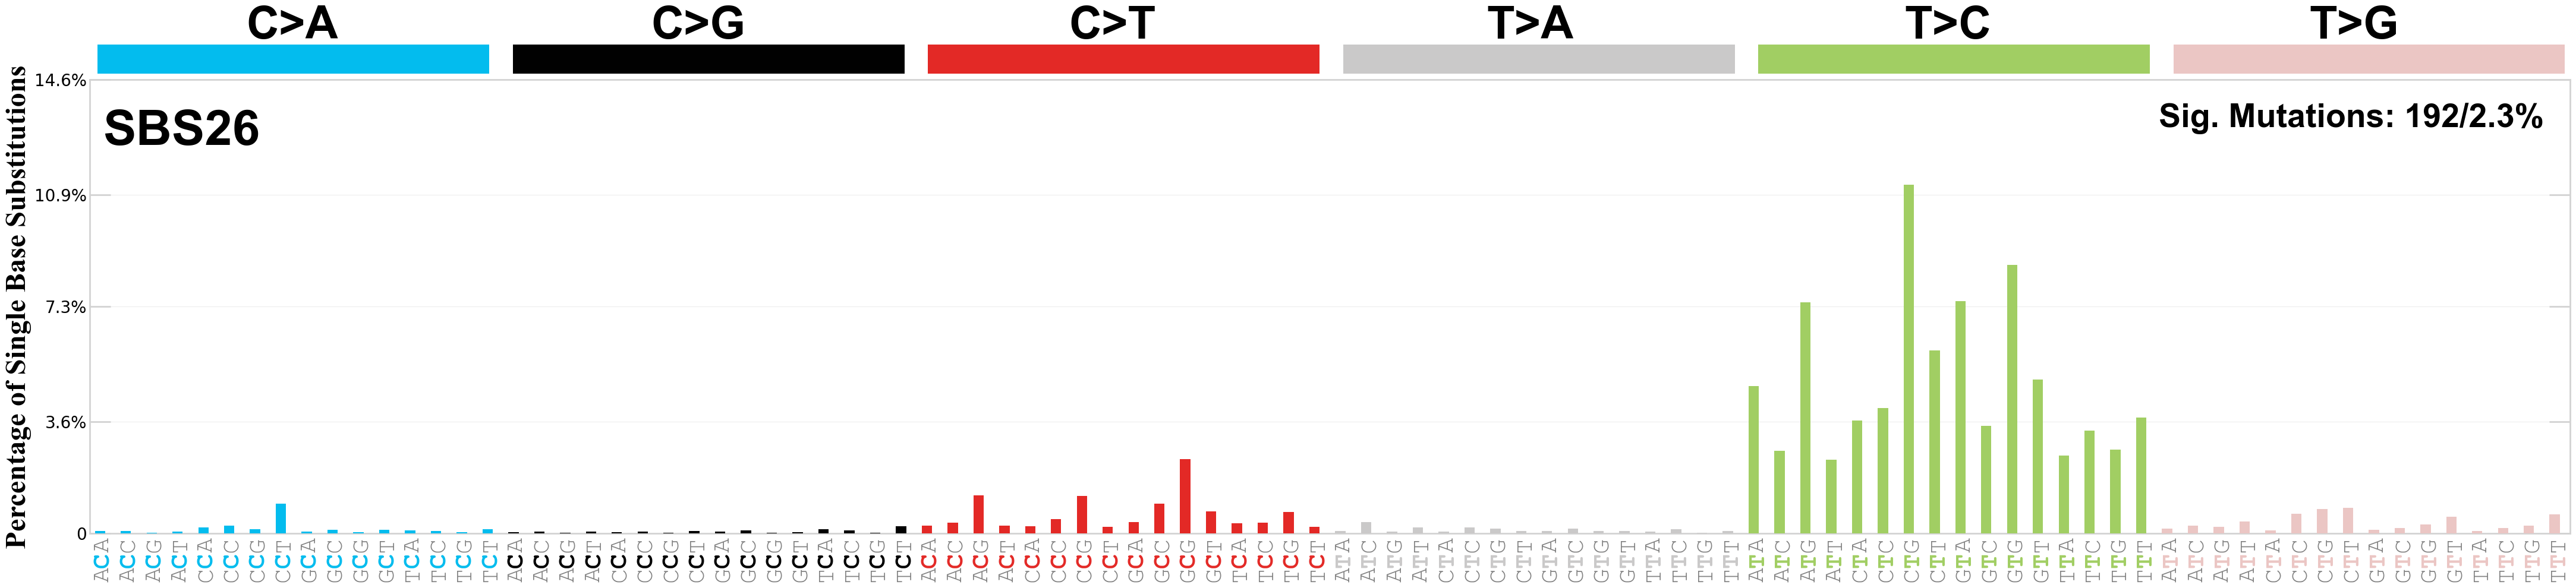

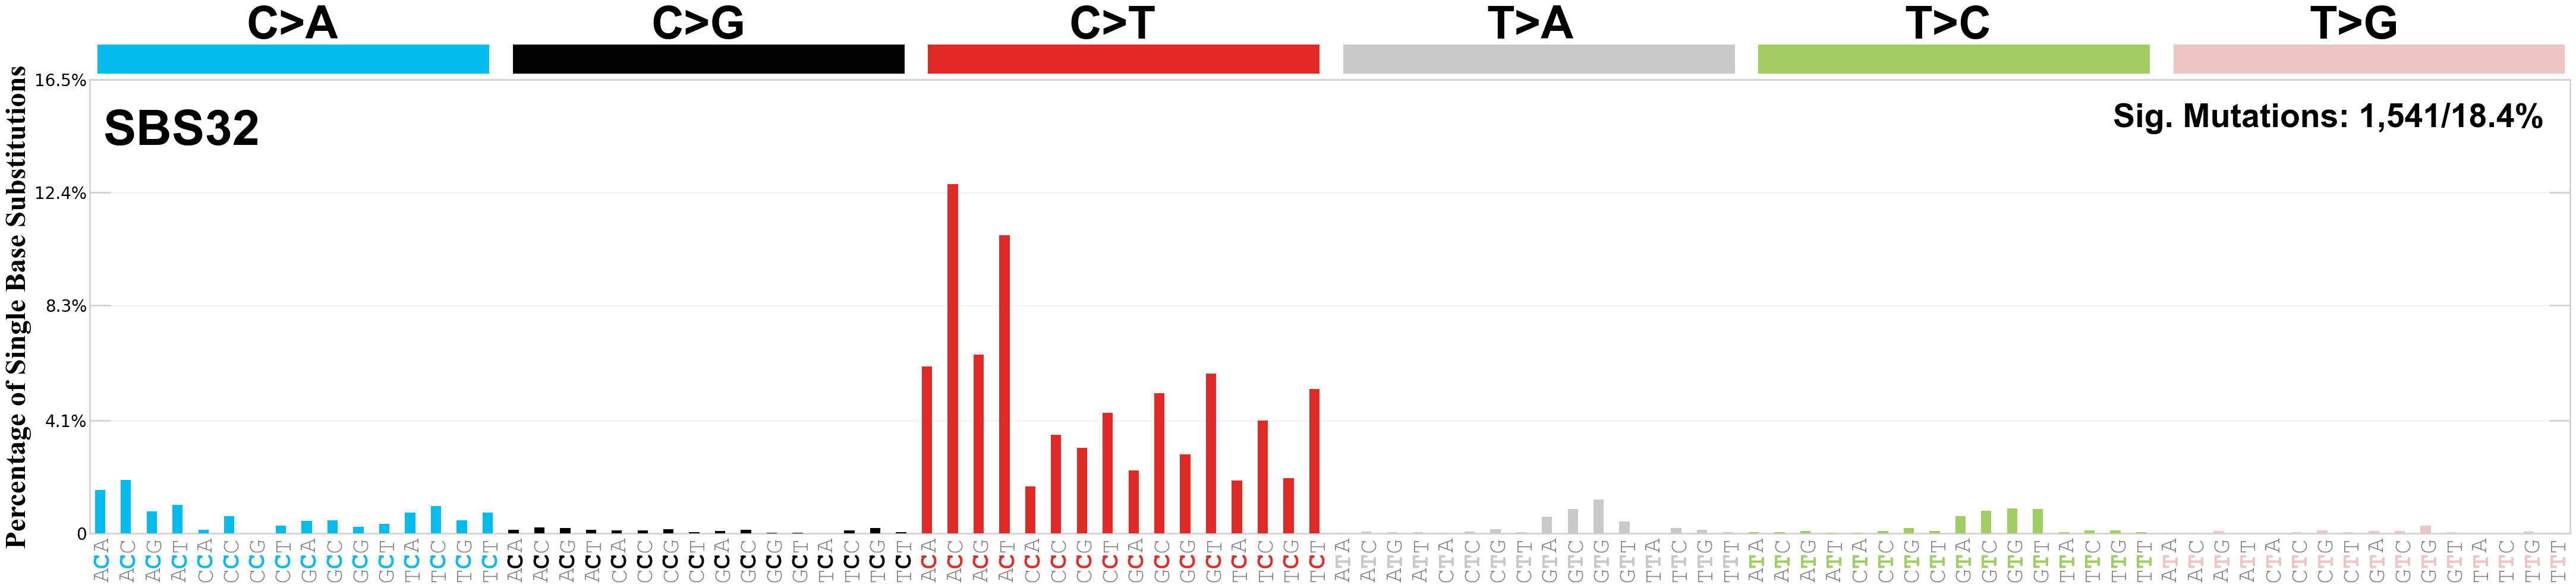

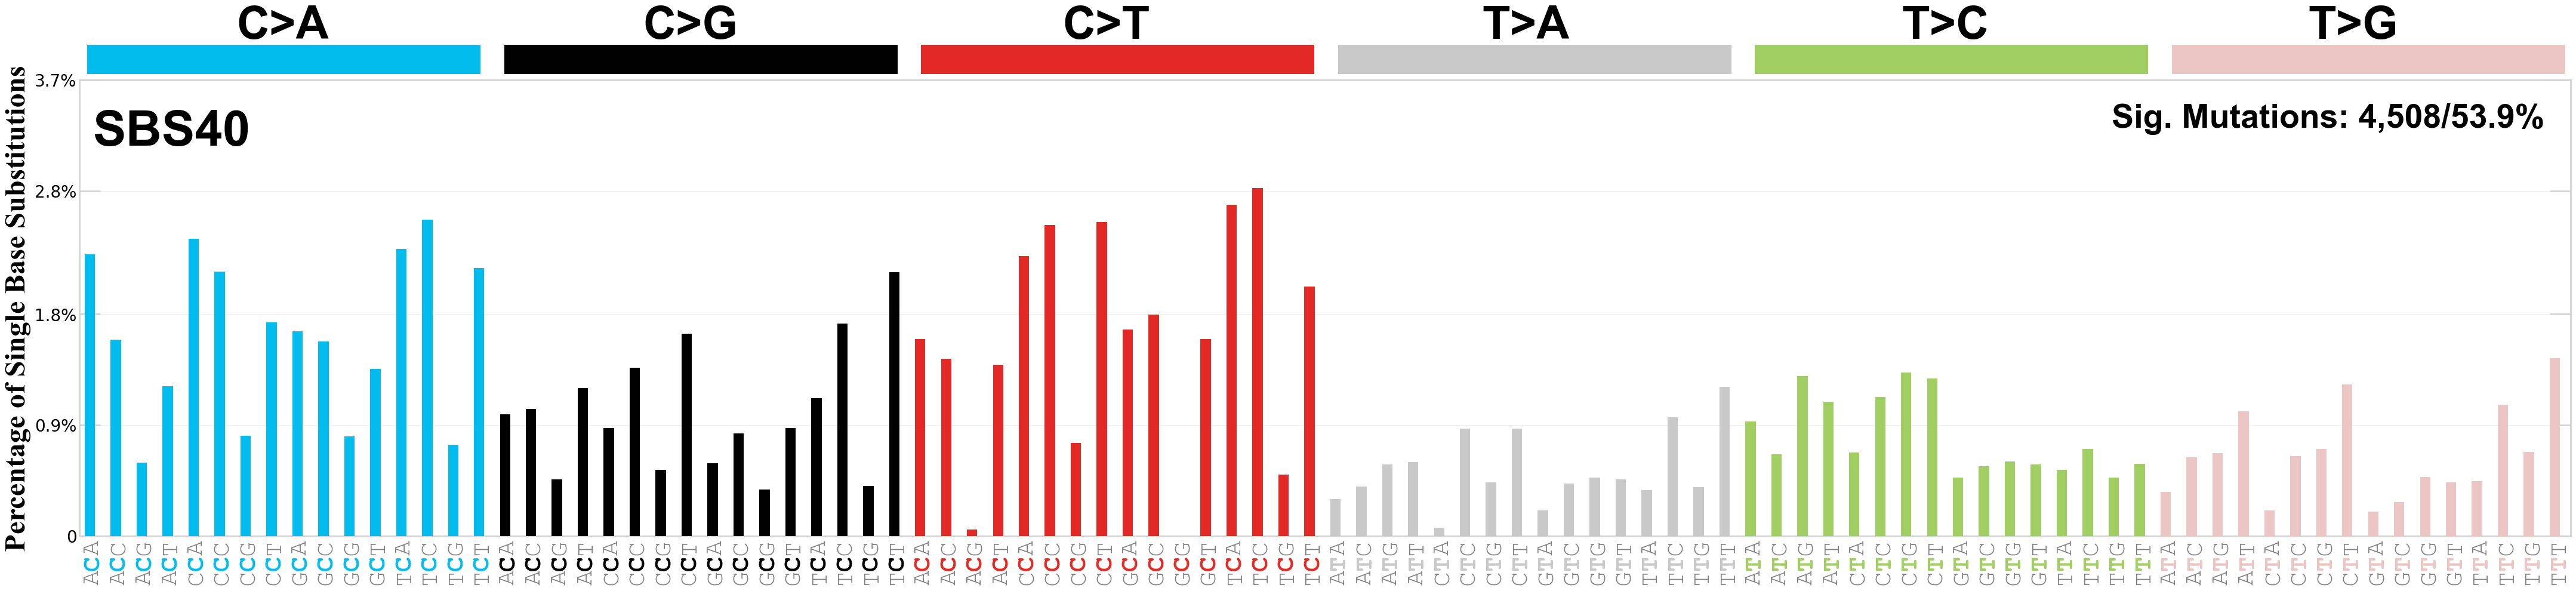

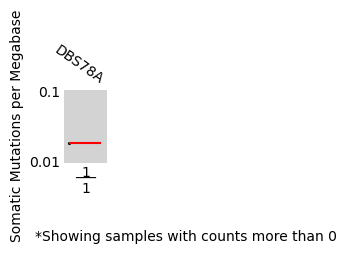

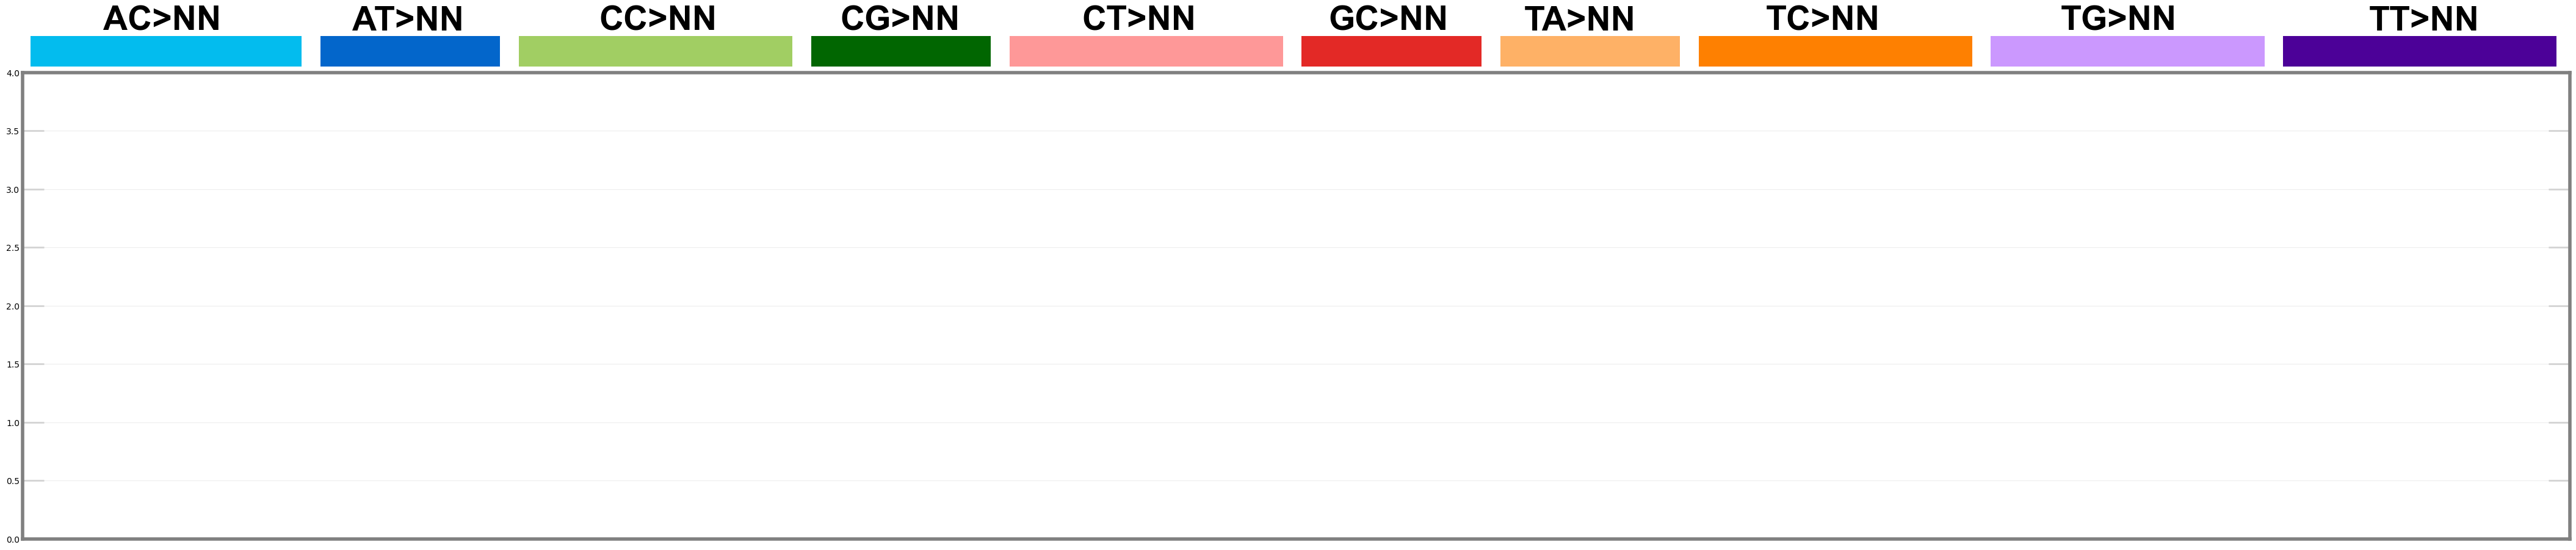

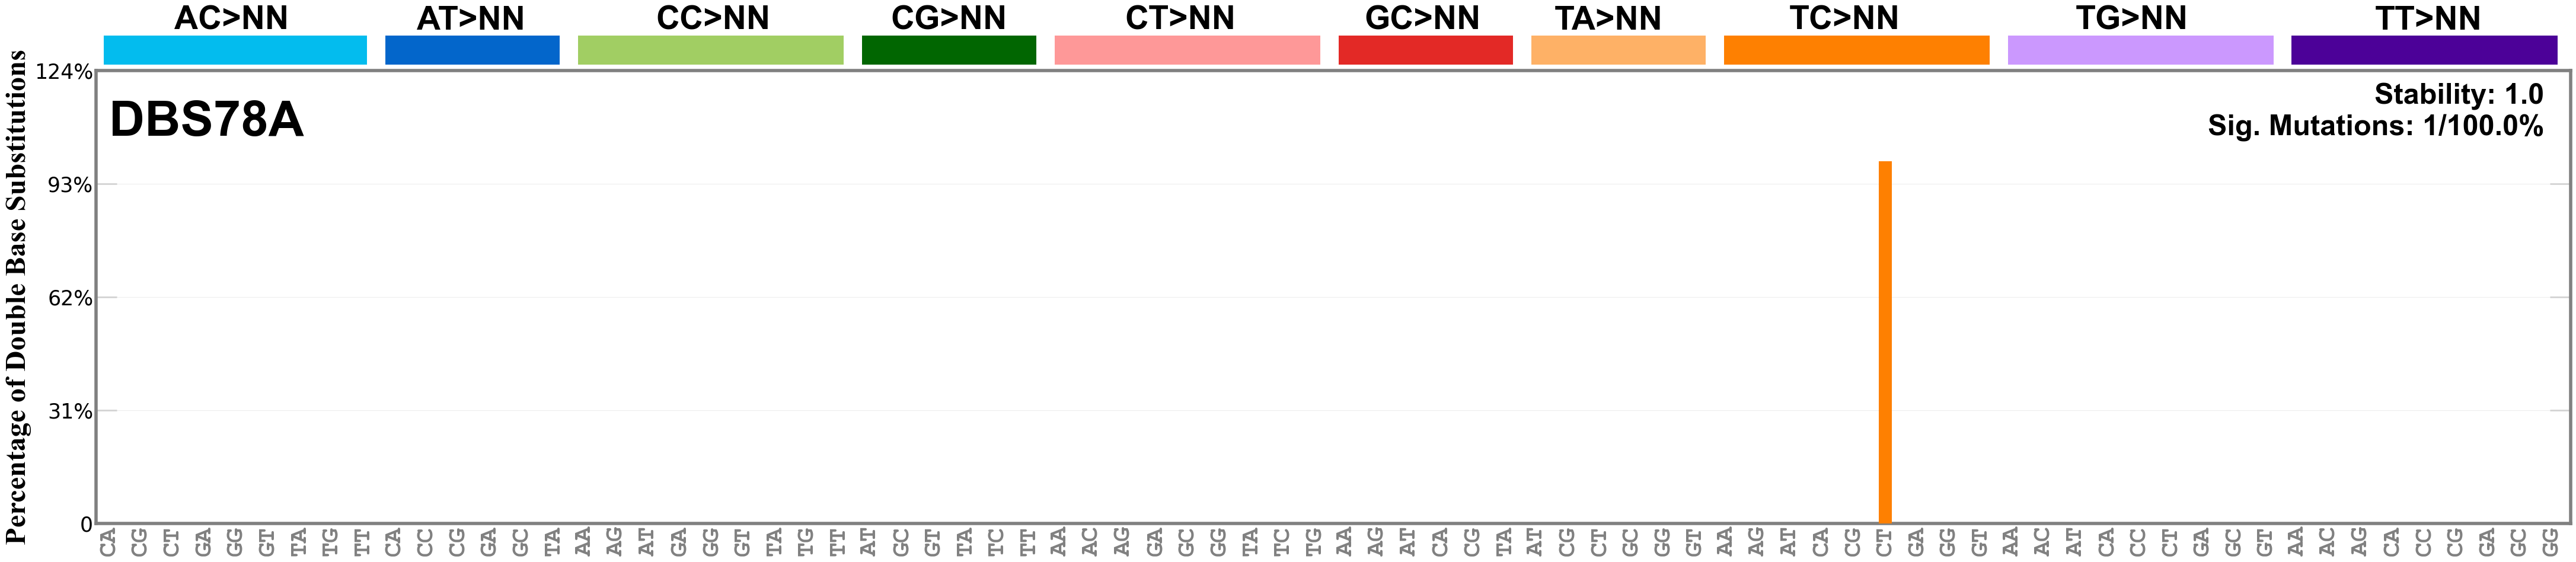

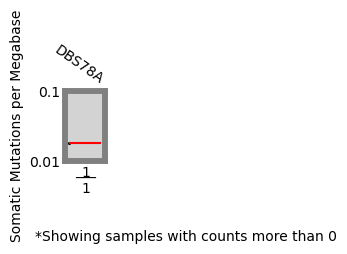

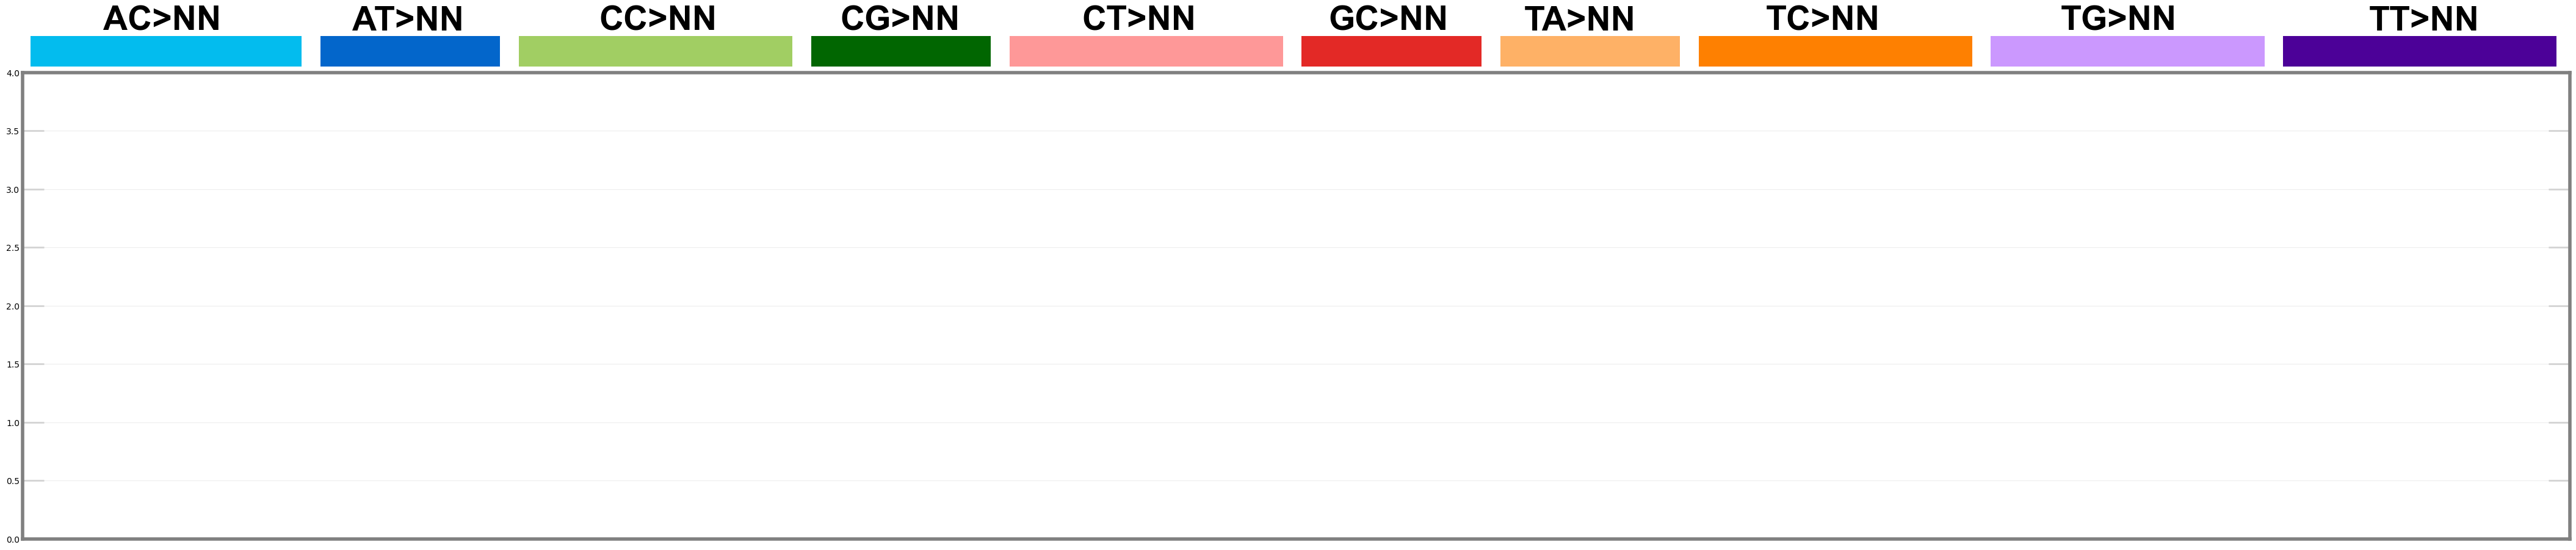

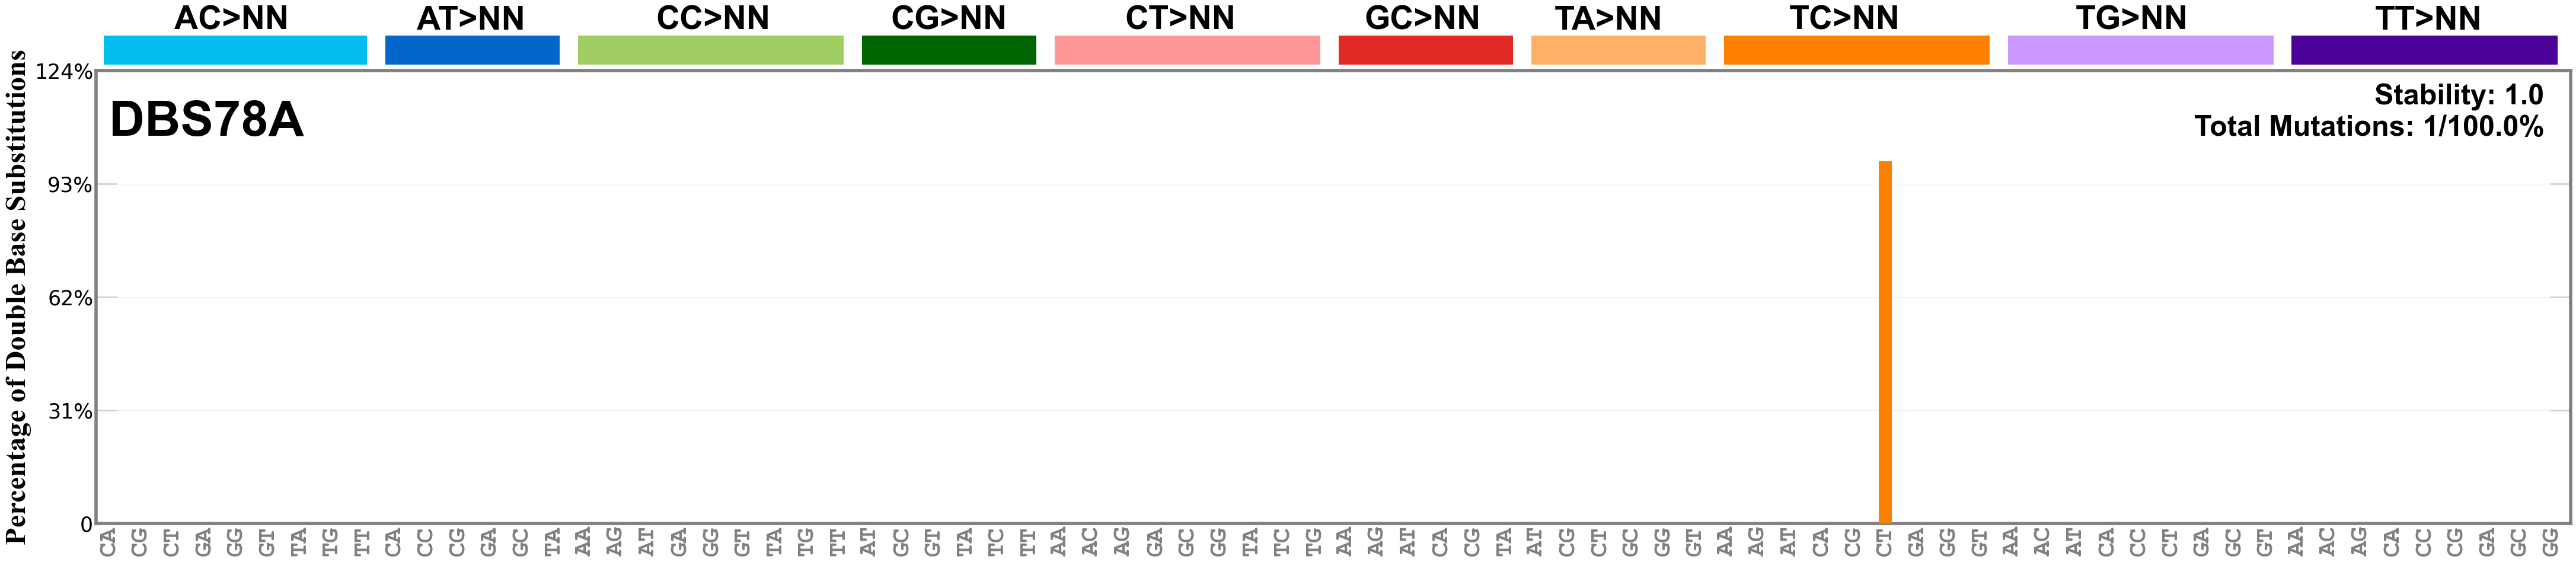

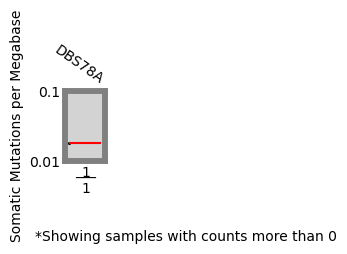

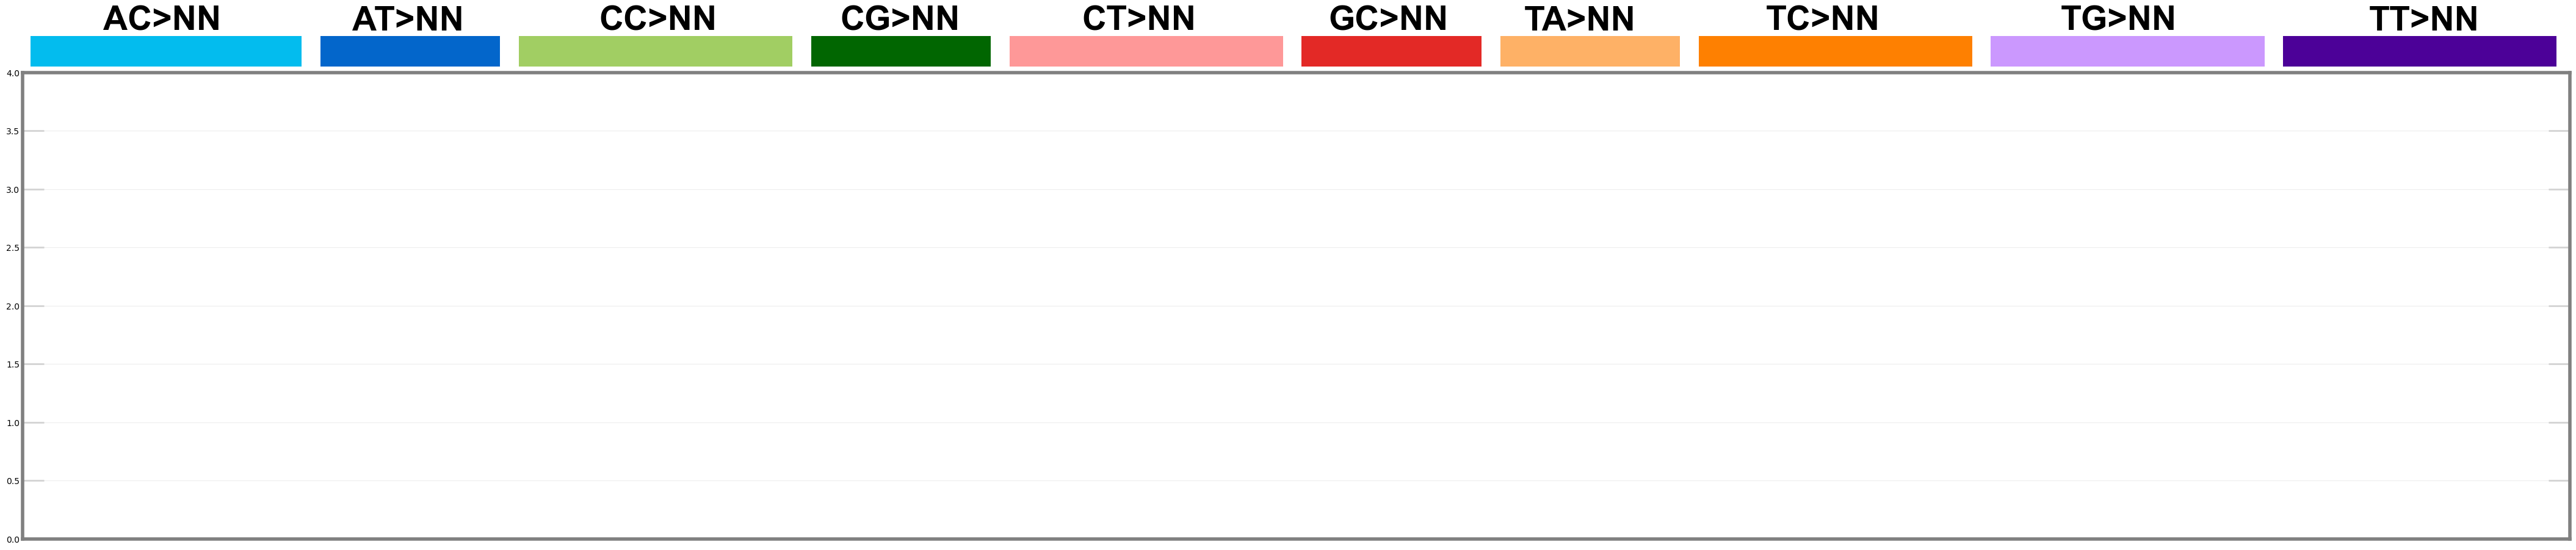

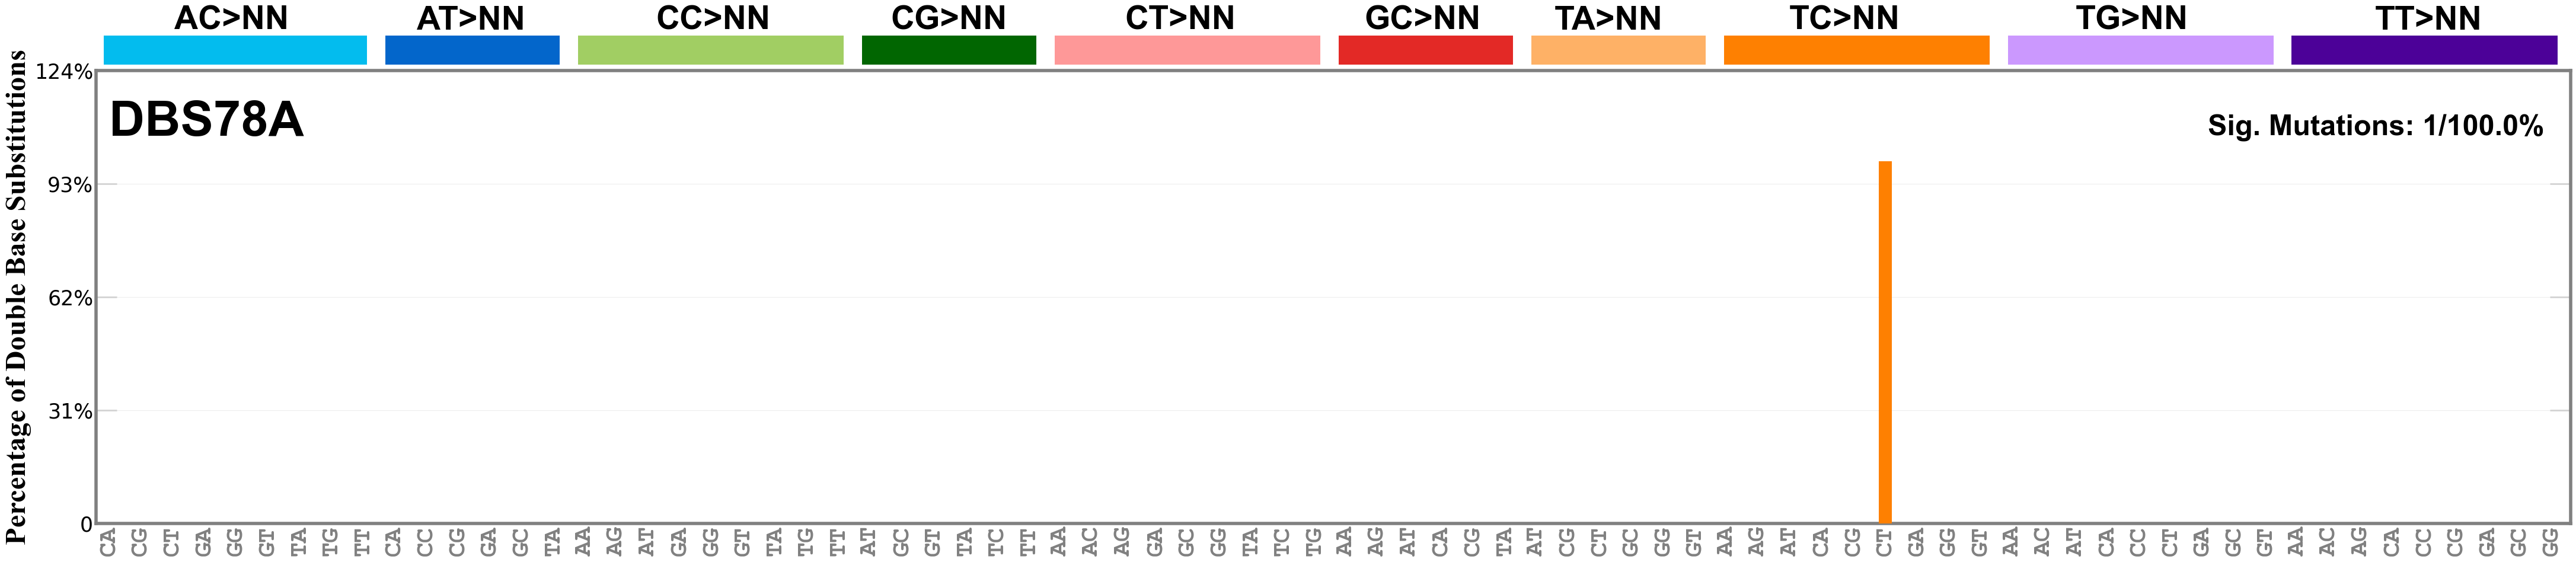

In [50]:
# Run SigProfilerExtractor
sig.sigProfilerExtractor("vcf", "./Example/SigExtrator/results", 
                         "./Example/SigExtrator/vcf", reference_genome="GRCh38", minimum_signatures=1,
                         maximum_signatures=10, nmf_replicates=100,
                        exome=True)
# See the output results at "./Example/SigExtrator/results"

# Driver mutation analysis

In [54]:
# Generate the dndscv format mutation file
# !mkdir ./Example/dndscv
for samplename in ['238','268','269','271','298']:
    DF=pd.read_csv('./Example/SigExtrator/vcf/'+samplename+'.vcf',
               sep='\t')[['#CHROM','POS','REF','ALT']]
    DF['sampleID']=[samplename]*len(DF)
    DF=DF[['sampleID','#CHROM','POS','REF','ALT']]
    DF.columns=['sampleID','chr','pos','ref','mut']
    DF.to_csv('./Example/dndscv/'+samplename+'.csv',
              index=False)

In [55]:
df=pd.DataFrame()
for samplename in ['238','268','269','271','298']:
    df=pd.concat([df,pd.read_csv('./Example/dndscv/'+samplename+'.csv')])

In [56]:
df.to_csv('./Example/dndscv/merge.csv',index=False)

In [57]:
"""
Run dndscv on the R notebook dndscv.ipynb
"""

'\nRun dndscv on R notebook dndscv.ipynb\n'